# Dependencies

In [1]:
import subprocess
import sys

def install_if_missing(package, import_name=None):
    try:
        if import_name:
            __import__(import_name)
        else:
            __import__(package)
    except ImportError:
        print(f"Installing: {package}")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Libraries and their pip package names if different
packages = {
    'pandas': 'pandas',
    'numpy': 'numpy',
    'scikit-learn': 'sklearn',
    'xgboost': 'xgboost',
    'lightgbm': 'lightgbm',
    'catboost': 'catboost',
    'joblib': 'joblib',
    'matplotlib': 'matplotlib',
    'seaborn': 'seaborn',
    'scipy': 'scipy',
    'imbalanced-learn': 'imblearn'
}

# Install missing packages
for package_name, import_name in packages.items():
    install_if_missing(package_name, import_name)

# ✅ Now import all required modules



# Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.utils.class_weight import compute_class_weight
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint, uniform
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# DATA PREPROCESSING

In [3]:
data= pd.read_csv("pdc_dataset_with_target.csv")
data

feature_1  feature_2 feature_3  feature_4 feature_5  feature_6  \
0          27.75       55.0         B     875.98        No          8   
1          31.33       39.0         C     839.91        No          4   
2          23.87       10.0         A    1364.70       Yes          4   
3          35.64       34.0         C    1462.07        No          4   
4            NaN        NaN         C     710.61        No          8   
...          ...        ...       ...        ...       ...        ...   
40995      31.37       52.0         A    1118.04       Yes          9   
40996      33.18       98.0         A    1001.55        No          3   
40997      24.77       91.0         B    1030.09       Yes          7   
40998        NaN       90.0         C    1335.11       Yes          8   
40999      23.16       48.0         B     916.39       Yes          2   

       feature_7  target  
0          44.16       0  
1          13.93       1  
2          15.16       0  
3          15.71       1  
4          13.77       1  
...          ...     ...  
40995      22.59       1  
40996      41.25       0  
40997        NaN       0  
40998       0.80       0  
40999       4.65       1  

[41000 rows x 8 columns]

In [4]:


# Step 1: Get sorted unique values
sorted_uniques = sorted(data['feature_3'].unique())

# Step 2: Create mapping: {'a': 0, 'b': 1, 'c': 2}
mapping = {val: idx for idx, val in enumerate(sorted_uniques)}

# Step 3: Apply mapping to create numeric column
data['feature_3'] = data['feature_3'].map(mapping)

# Step 1: Get sorted unique values
sorted_uniques = sorted(data['feature_5'].unique())

# Step 2: Create mapping: {'a': 0, 'b': 1, 'c': 2}
mapping = {val: idx for idx, val in enumerate(sorted_uniques)}

# Step 3: Apply mapping to create numeric column
data['feature_5'] = data['feature_5'].map(mapping)
data

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0          27.75       55.0          1     875.98          0          8   
1          31.33       39.0          2     839.91          0          4   
2          23.87       10.0          0    1364.70          1          4   
3          35.64       34.0          2    1462.07          0          4   
4            NaN        NaN          2     710.61          0          8   
...          ...        ...        ...        ...        ...        ...   
40995      31.37       52.0          0    1118.04          1          9   
40996      33.18       98.0          0    1001.55          0          3   
40997      24.77       91.0          1    1030.09          1          7   
40998        NaN       90.0          2    1335.11          1          8   
40999      23.16       48.0          1     916.39          1          2   

       feature_7  target  
0          44.16       0  
1          13.93       1  
2          15.16       0  
3          15.71       1  
4          13.77       1  
...          ...     ...  
40995      22.59       1  
40996      41.25       0  
40997        NaN       0  
40998       0.80       0  
40999       4.65       1  

[41000 rows x 8 columns]

In [5]:
missing = data.isnull().sum()

# Print columns with missing values
print("Missing values per column:")
print(missing)

Missing values per column:
feature_1    2054
feature_2    2050
feature_3       0
feature_4    2054
feature_5       0
feature_6       0
feature_7    2036
target          0
dtype: int64


In [6]:
data['feature_1'] = data['feature_1'].fillna(data['feature_1'].mean())
data['feature_2'] = data['feature_2'].fillna(data['feature_2'].mean())
data['feature_4'] = data['feature_4'].fillna(data['feature_4'].mean())
data['feature_7'] = data['feature_7'].fillna(data['feature_7'].mean())


In [7]:
missing = data.isnull().sum()

# Print columns with missing values
print("Missing values per column:")
print(missing)

Missing values per column:
feature_1    0
feature_2    0
feature_3    0
feature_4    0
feature_5    0
feature_6    0
feature_7    0
target       0
dtype: int64


In [8]:
data.to_csv("pdc_data_proj.csv",index=False)

In [9]:

data=pd.read_csv("pdc_data_proj.csv")
data

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0      27.750000   55.00000          1     875.98          0          8   
1      31.330000   39.00000          2     839.91          0          4   
2      23.870000   10.00000          0    1364.70          1          4   
3      35.640000   34.00000          2    1462.07          0          4   
4      29.990843   49.43656          2     710.61          0          8   
...          ...        ...        ...        ...        ...        ...   
40995  31.370000   52.00000          0    1118.04          1          9   
40996  33.180000   98.00000          0    1001.55          0          3   
40997  24.770000   91.00000          1    1030.09          1          7   
40998  29.990843   90.00000          2    1335.11          1          8   
40999  23.160000   48.00000          1     916.39          1          2   

       feature_7  target  
0      44.160000       0  
1      13.930000       1  
2      15.160000       0  
3      15.710000       1  
4      13.770000       1  
...          ...     ...  
40995  22.590000       1  
40996  41.250000       0  
40997  23.145819       0  
40998   0.800000       0  
40999   4.650000       1  

[41000 rows x 8 columns]

In [10]:
X = data.drop("target", axis=1)
y = data["target"]

# Step 5: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Step 6: Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("Original training class distribution:\n", y_train.value_counts())
print("\nAfter SMOTE training class distribution:\n", y_train_sm.value_counts())


Original training class distribution:
 0    19746
1    13054
Name: target, dtype: int64

After SMOTE training class distribution:
 0    19746
1    19746
Name: target, dtype: int64


In [11]:
X_train_sm

feature_1  feature_2  feature_3    feature_4  feature_5  feature_6  \
0      41.050000  27.000000          0  1107.140000          1          7   
1      28.340000  49.436560          2  1143.830000          0          3   
2      23.510000  13.000000          1  1313.260000          0          8   
3      30.990000   6.000000          2  1477.140000          1          2   
4      20.660000  26.000000          1   842.740000          0          7   
...          ...        ...        ...          ...        ...        ...   
39487  21.411782  18.004715          1   897.694559          0          1   
39488  30.161732  52.028602          2   691.116584          1          2   
39489  27.971954  49.436560          2   755.675976          0          7   
39490  28.469193  50.760348          2  1251.825948          1          2   
39491  31.159380  61.619380          1   938.626534          0          4   

       feature_7  
0      12.200000  
1      14.170000  
2       5.640000  
3      51.200000  
4      18.120000  
...          ...  
39487   4.859783  
39488  31.877669  
39489   4.062870  
39490  17.649895  
39491  48.252485  

[39492 rows x 7 columns]

In [12]:
# Check the distribution of the target variable
class_distribution = y.value_counts()
print(class_distribution)


0    24682
1    16318
Name: target, dtype: int64


In [13]:
import time
import gc
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import catboost as cb
from scipy.stats import randint, uniform

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# 1. Separate features and target
X = data.drop('target', axis=1)  # Assuming 'target' is the column you want to predict
y = data['target']

# 2. Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Check the class distribution in the original dataset
class_distribution = y.value_counts()
print(class_distribution)

# 4. Split the data into train and test (we'll use the original distribution for training/testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5. Compute class weights for handling class imbalance
# Convert [0, 1] to numpy.ndarray
classes = np.array([0, 1])
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}

# Print the class weights
print(f"Class weights: {class_weights_dict}")

# Now the data is ready for model training, where you can use class_weights_dict during model training


0    24682
1    16318
Name: target, dtype: int64
Class weights: {0: 0.8301695773221969, 1: 1.2571866615561518}


In [15]:
import os

max_cores = os.cpu_count()
print(f"Maximum number of CPU cores available: {max_cores}")


Maximum number of CPU cores available: 8


# Random Forest

In [18]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

def random_forest_parallel_with_varying_cores(X_train, y_train, X_test, y_test, n_estimators_list=[100, 150, 200], core_numbers=[1, 2, 3, 4, 6, 8]):
    results = {}
    cm_dict = {}  # To store confusion matrices

    for n_estimators in n_estimators_list:
        print(f"\n🌲 Training Random Forest with n_estimators={n_estimators}...\n")
        
        # Initialize result storage for this n_estimators value
        results[n_estimators] = {}
        cm_dict[n_estimators] = {}

        for cores in core_numbers:
            print(f"⚙️ Training with n_jobs={cores} cores...")
            start_time = time.time()

            # Define and train the model
            rf = RandomForestClassifier(
                n_estimators=n_estimators,
                max_depth=None,
                random_state=42,
                n_jobs=cores
            )
            rf.fit(X_train, y_train)

            # Predict
            y_pred = rf.predict(X_test)

            # Metrics
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            conf_matrix = confusion_matrix(y_test, y_pred)
            training_time = time.time() - start_time

            print(f"✅ Completed with {cores} cores.")
            print(f"📊 Accuracy: {accuracy:.4f} | F1 Score: {f1:.4f} | ⏱️ Time: {training_time:.2f} seconds")
            print(f"🧩 Confusion Matrix:\n{conf_matrix}\n")

            # Store results
            results[n_estimators][cores] = {
                'accuracy': accuracy,
                'f1': f1,
                'training_time': training_time
            }
            cm_dict[n_estimators][cores] = conf_matrix

    return results, cm_dict

# Example usage
results, cm_dict = random_forest_parallel_with_varying_cores(
    X_train, y_train, X_test, y_test,
    n_estimators_list=[100, 200, 300],
    core_numbers=[1, 2, 3, 4, 6, 8]
)

print("\n📦 All Results Summary:")
print(results)



🌲 Training Random Forest with n_estimators=100...

⚙️ Training with n_jobs=1 cores...
✅ Completed with 1 cores.
📊 Accuracy: 0.5915 | F1 Score: 0.5370 | ⏱️ Time: 7.35 seconds
🧩 Confusion Matrix:
[[4243  684]
 [2666  607]]

⚙️ Training with n_jobs=2 cores...
✅ Completed with 2 cores.
📊 Accuracy: 0.5915 | F1 Score: 0.5370 | ⏱️ Time: 3.94 seconds
🧩 Confusion Matrix:
[[4243  684]
 [2666  607]]

⚙️ Training with n_jobs=3 cores...
✅ Completed with 3 cores.
📊 Accuracy: 0.5915 | F1 Score: 0.5370 | ⏱️ Time: 2.72 seconds
🧩 Confusion Matrix:
[[4243  684]
 [2666  607]]

⚙️ Training with n_jobs=4 cores...
✅ Completed with 4 cores.
📊 Accuracy: 0.5915 | F1 Score: 0.5370 | ⏱️ Time: 2.32 seconds
🧩 Confusion Matrix:
[[4243  684]
 [2666  607]]

⚙️ Training with n_jobs=6 cores...
✅ Completed with 6 cores.
📊 Accuracy: 0.5915 | F1 Score: 0.5370 | ⏱️ Time: 1.82 seconds
🧩 Confusion Matrix:
[[4243  684]
 [2666  607]]

⚙️ Training with n_jobs=8 cores...
✅ Completed with 8 cores.
📊 Accuracy: 0.5915 | F1 Score: 0

In [22]:
results

{100: {1: {'accuracy': 0.5914634146341463,
   'f1': 0.5369619859216306,
   'training_time': 7.350477933883667},
  2: {'accuracy': 0.5914634146341463,
   'f1': 0.5369619859216306,
   'training_time': 3.943664312362671},
  3: {'accuracy': 0.5914634146341463,
   'f1': 0.5369619859216306,
   'training_time': 2.7153496742248535},
  4: {'accuracy': 0.5914634146341463,
   'f1': 0.5369619859216306,
   'training_time': 2.3151659965515137},
  6: {'accuracy': 0.5914634146341463,
   'f1': 0.5369619859216306,
   'training_time': 1.8192873001098633},
  8: {'accuracy': 0.5914634146341463,
   'f1': 0.5369619859216306,
   'training_time': 1.671673059463501}},
 200: {1: {'accuracy': 0.5915853658536585,
   'f1': 0.5326491586511359,
   'training_time': 14.338496446609497},
  2: {'accuracy': 0.5915853658536585,
   'f1': 0.5326491586511359,
   'training_time': 7.672841787338257},
  3: {'accuracy': 0.5915853658536585,
   'f1': 0.5326491586511359,
   'training_time': 5.881115198135376},
  4: {'accuracy': 0.59

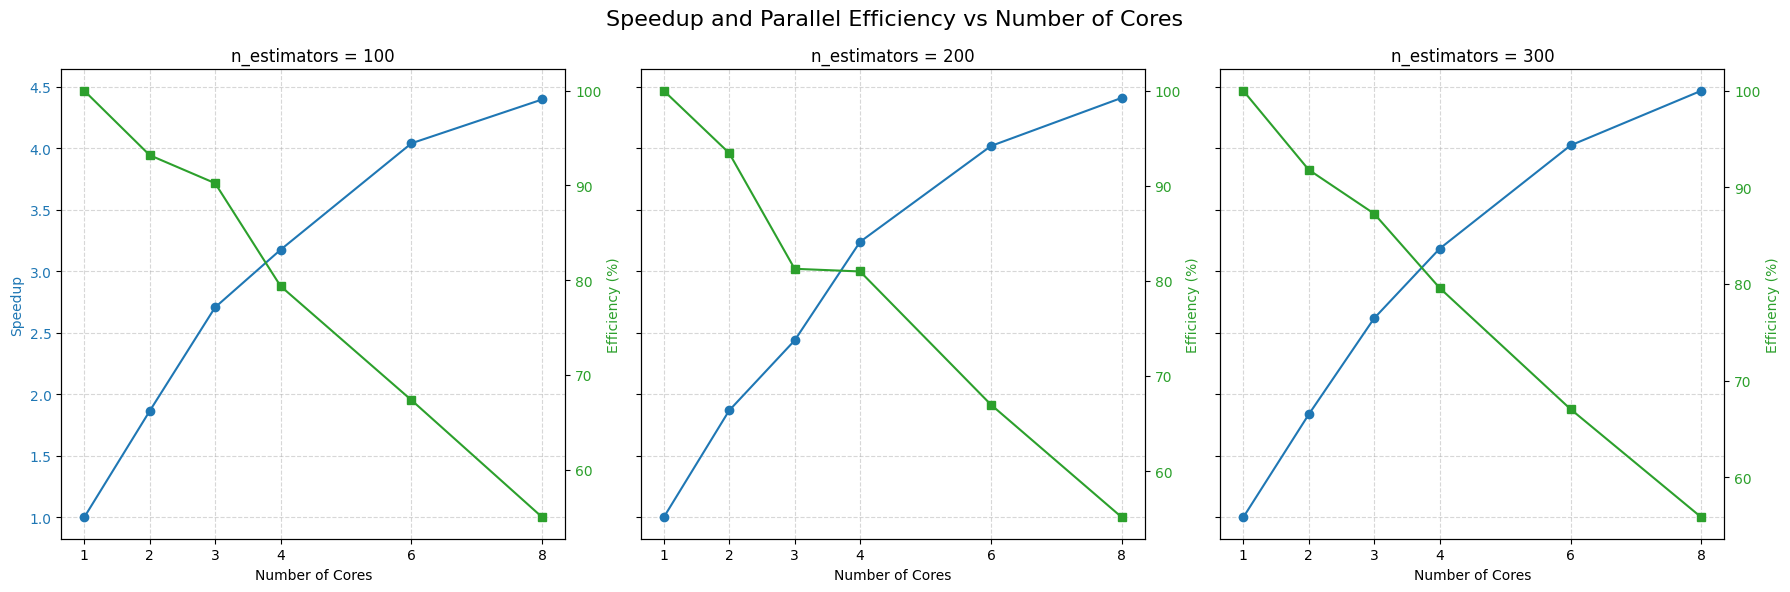

In [24]:
import matplotlib.pyplot as plt


def compute_speedup_efficiency(data):
    base_time = data[1]['training_time']
    cores = sorted(data.keys())
    speedup = [base_time / data[n]['training_time'] for n in cores]
    efficiency = [s / n * 100 for s, n in zip(speedup, cores)]
    return cores, speedup, efficiency

# Plot
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
for i, n_est in enumerate([100, 200, 300]):
    ax = axs[i]
    cores, speedup, efficiency = compute_speedup_efficiency(results[n_est])
    
    color1, color2 = 'tab:blue', 'tab:green'
    ax.plot(cores, speedup, marker='o', color=color1, label='Speedup')
    ax.set_xlabel('Number of Cores')
    ax.set_title(f'n_estimators = {n_est}')
    ax.set_xticks(cores)
    ax.grid(True, linestyle='--', alpha=0.5)
    
    ax2 = ax.twinx()
    ax2.plot(cores, efficiency, marker='s', color=color2, label='Efficiency')
    ax2.set_ylabel('Efficiency (%)', color=color2)
    ax2.tick_params(axis='y', labelcolor=color2)
    
    if i == 0:
        ax.set_ylabel('Speedup', color=color1)
        ax.tick_params(axis='y', labelcolor=color1)

fig.suptitle('Speedup and Parallel Efficiency vs Number of Cores', fontsize=16)
plt.tight_layout()
plt.show()


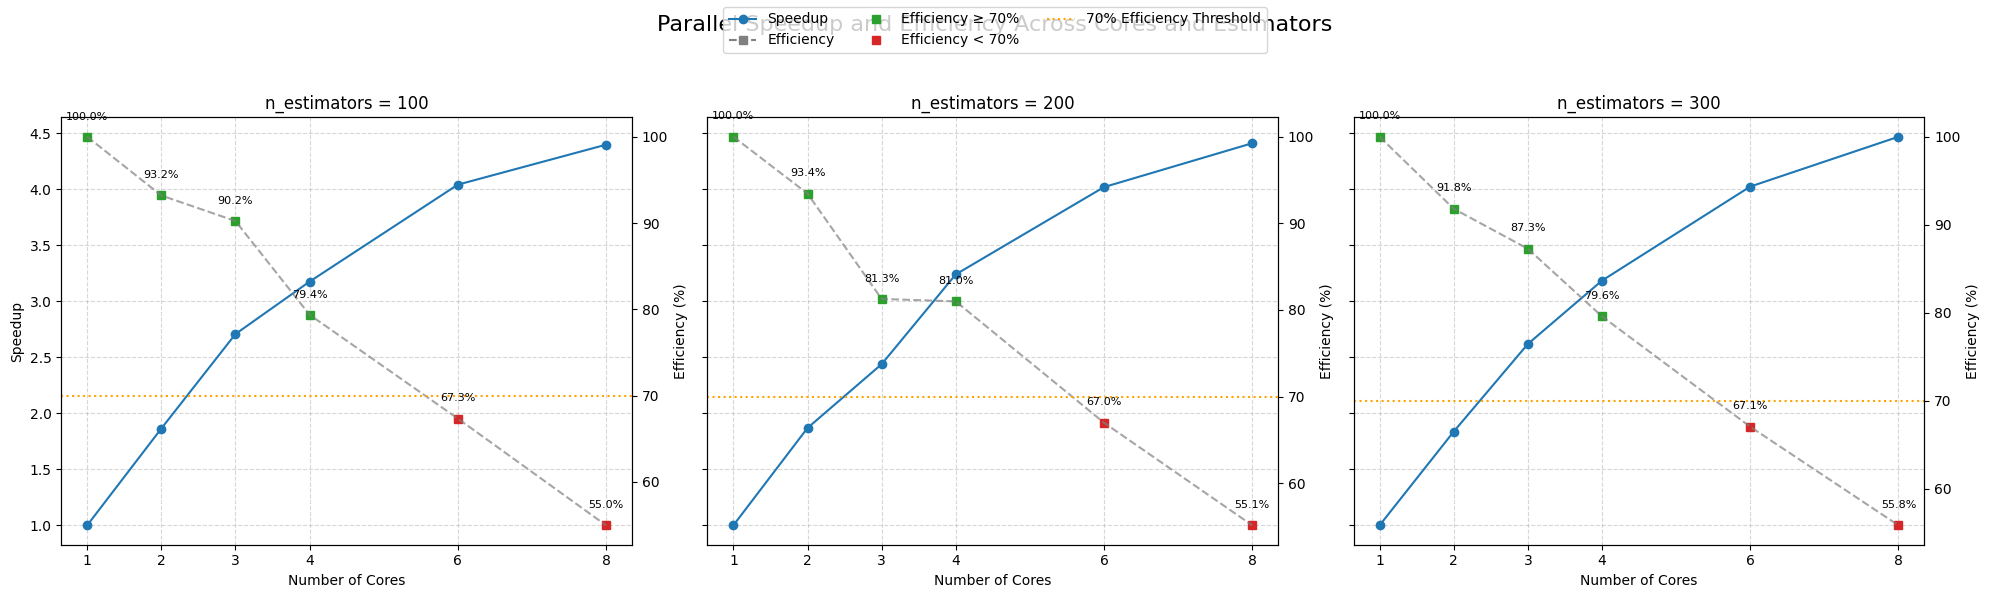

In [26]:
import matplotlib.pyplot as plt

def compute_speedup_efficiency(data):
    base_time = data[1]['training_time']
    cores = sorted(data.keys())
    speedup = [base_time / data[n]['training_time'] for n in cores]
    efficiency = [(s / n) * 100 for s, n in zip(speedup, cores)]
    return cores, speedup, efficiency

# Plot setup
fig, axs = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

for i, n_est in enumerate([100, 200, 300]):
    ax = axs[i]
    cores, speedup, efficiency = compute_speedup_efficiency(results[n_est])
    
    # Speedup plot
    ax.plot(cores, speedup, marker='o', color='tab:blue', label='Speedup')
    ax.set_xlabel('Number of Cores')
    ax.set_title(f'n_estimators = {n_est}')
    ax.set_xticks(cores)
    ax.grid(True, linestyle='--', alpha=0.5)
    
    # Add efficiency plot on twin axis
    ax2 = ax.twinx()
    
    # Color markers based on 70% efficiency
    marker_colors = ['tab:green' if e >= 70 else 'tab:red' for e in efficiency]
    for x, y, c, e in zip(cores, efficiency, marker_colors, efficiency):
        ax2.plot(x, y, marker='s', color=c)
        ax2.text(x, y + 2, f'{e:.1f}%', ha='center', fontsize=8)

    ax2.plot(cores, efficiency, linestyle='--', color='gray', alpha=0.7, label='Efficiency')
    ax2.axhline(70, color='orange', linestyle=':', linewidth=1.5, label='70% Efficiency Threshold')
    ax2.set_ylabel('Efficiency (%)')
    ax2.tick_params(axis='y')

    # Add labels only to first subplot
    if i == 0:
        ax.set_ylabel('Speedup')

# Add a global legend manually
lines, labels = [], []
line1, = axs[0].plot([], [], 'o-', color='tab:blue', label='Speedup')
line2, = axs[0].plot([], [], 's--', color='gray', label='Efficiency')
line3, = axs[0].plot([], [], 's', color='tab:green', label='Efficiency ≥ 70%')
line4, = axs[0].plot([], [], 's', color='tab:red', label='Efficiency < 70%')
line5, = axs[0].plot([], [], ':', color='orange', label='70% Threshold')

fig.legend([line1, line2, line3, line4, line5],
           ['Speedup', 'Efficiency', 'Efficiency ≥ 70%', 'Efficiency < 70%', '70% Efficiency Threshold'],
           loc='upper center', ncol=3, fontsize=10)

fig.suptitle('Parallel Speedup and Efficiency Across Cores and Estimators', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


Plot saved as results_plot_n_estimators_100.png


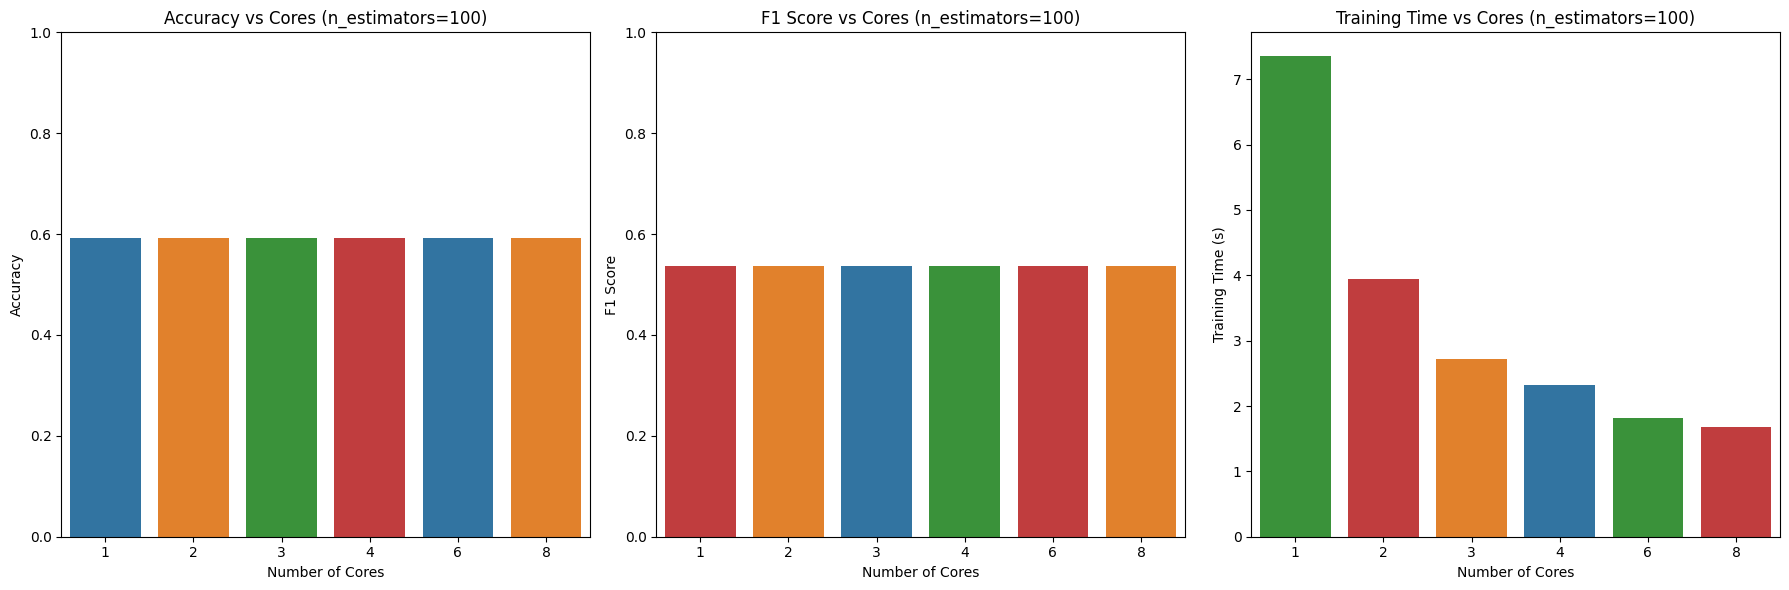

Plot saved as results_plot_n_estimators_200.png


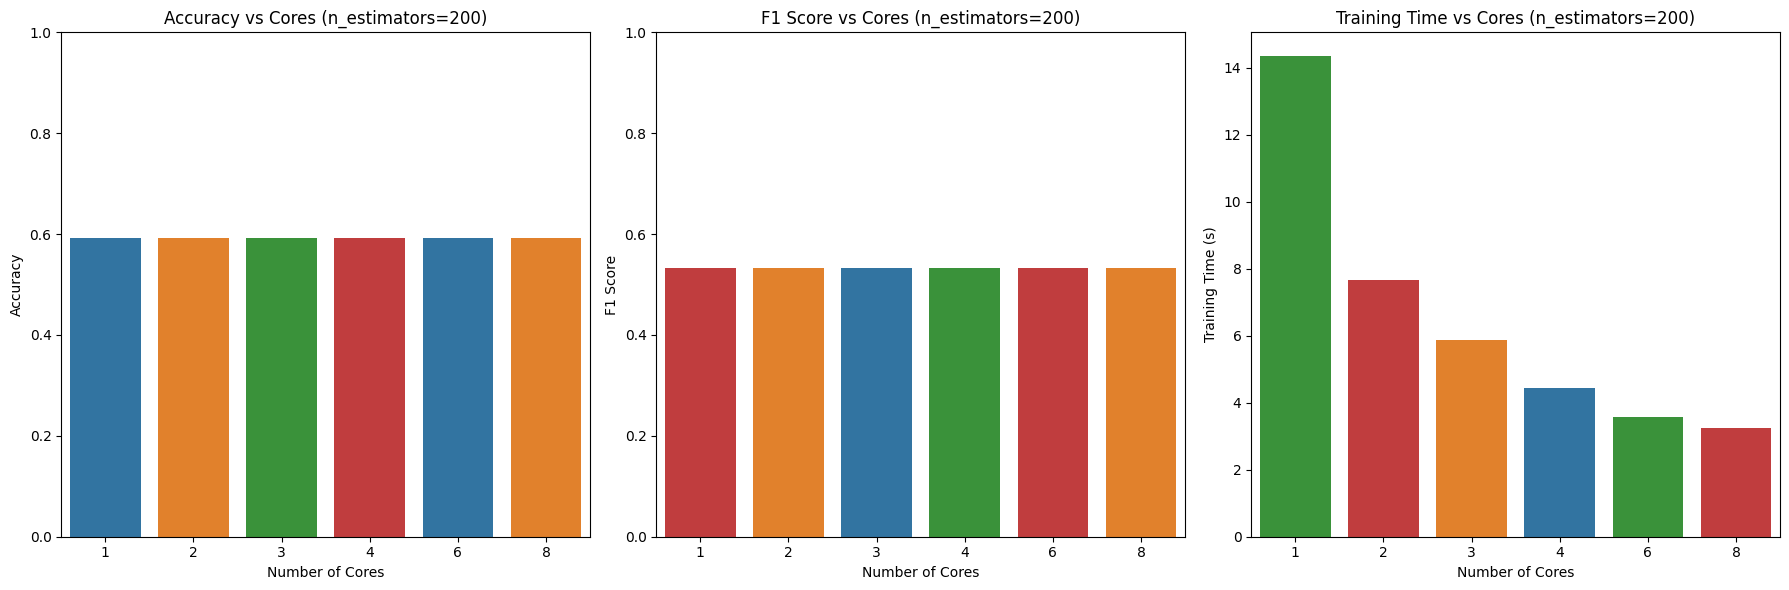

Plot saved as results_plot_n_estimators_300.png


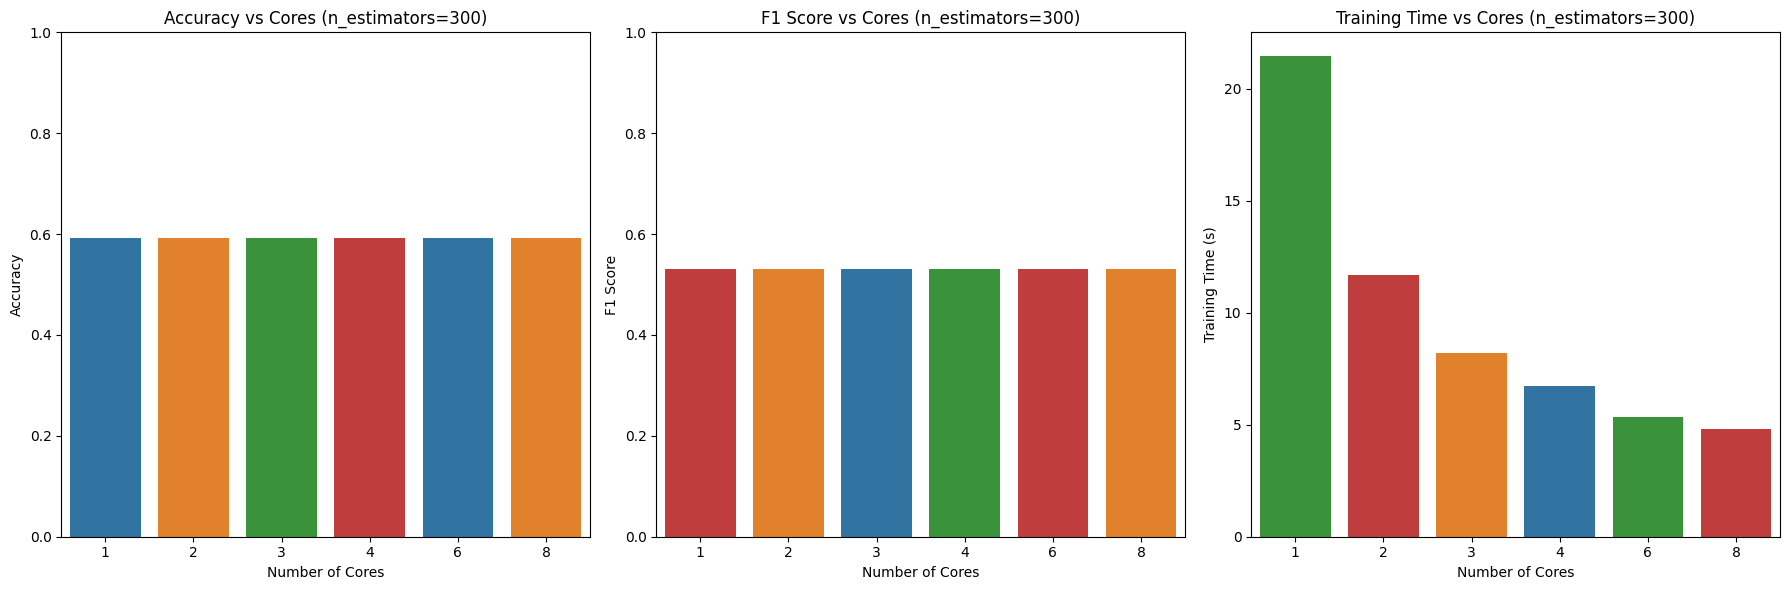

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

def plot_results(results):
    """
    Generates bar plots for accuracy, f1 score, and training time
    for each n_estimators value (100, 150, 200).
    Saves the plot as a PNG file with a unique name based on n_estimators
    and shows it in the notebook.
    """
    for n_estimators in results:
        cores = list(results[n_estimators].keys())
        accuracy = [results[n_estimators][core]['accuracy'] for core in cores]
        f1 = [results[n_estimators][core]['f1'] for core in cores]
        training_time = [results[n_estimators][core]['training_time'] for core in cores]

        # Create subplots for accuracy, F1, and Training Time
        fig, axs = plt.subplots(1, 3, figsize=(18, 6))

        # Accuracy plot with bright blue colors
        sns.barplot(x=cores, y=accuracy, ax=axs[0], palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
        axs[0].set_title(f"Accuracy vs Cores (n_estimators={n_estimators})")
        axs[0].set_xlabel("Number of Cores")
        axs[0].set_ylabel("Accuracy")
        axs[0].set_ylim(0, 1)

        # F1 Score plot with bright red colors
        sns.barplot(x=cores, y=f1, ax=axs[1], palette=['#d62728', '#ff7f0e', '#1f77b4', '#2ca02c'])
        axs[1].set_title(f"F1 Score vs Cores (n_estimators={n_estimators})")
        axs[1].set_xlabel("Number of Cores")
        axs[1].set_ylabel("F1 Score")
        axs[1].set_ylim(0, 1)

        # Training Time plot with bright green colors
        sns.barplot(x=cores, y=training_time, ax=axs[2], palette=['#2ca02c', '#d62728', '#ff7f0e', '#1f77b4'])
        axs[2].set_title(f"Training Time vs Cores (n_estimators={n_estimators})")
        axs[2].set_xlabel("Number of Cores")
        axs[2].set_ylabel("Training Time (s)")

        # Generate a unique file name based on n_estimators
        save_path = f"results_plot_n_estimators_{n_estimators}.png"
        
        # Save the plot to the specified file path
        plt.tight_layout()
        plt.savefig(save_path)  # Save the plot to a unique file
        print(f"Plot saved as {save_path}")
        
        # Show the plot in the notebook
        plt.show()  # Display the plot in the notebook

        plt.close(fig)  # Close the figure to avoid overlapping in subsequent iterations

# Example call for the results dictionary from your previous function
plot_results(results)


In [27]:
import copy

# Assuming `results` contains the original results from the random forest training
RF_Parallel_result = copy.deepcopy(results)

# Now, RF_Parallel_result contains a copy of the original results and can be used independently


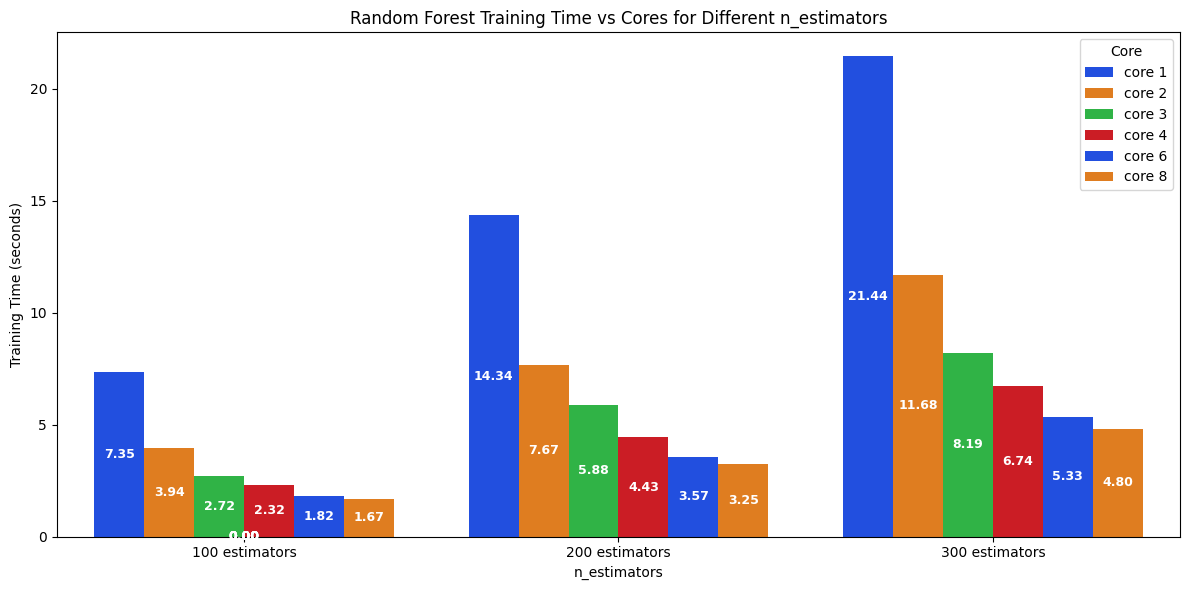

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_grouped_training_time_clean(results):
    records = []
    for n_estimators in sorted(results.keys()):
        for core in sorted(results[n_estimators].keys()):
            records.append({
                'n_estimators': f"{n_estimators} estimators",
                'core': f"core {core}",
                'training_time': results[n_estimators][core]['training_time'],
                'core_id': core  # numeric for color consistency
            })

    df = pd.DataFrame(records)

    plt.figure(figsize=(12, 6))
    ax = sns.barplot(
        data=df,
        x='n_estimators',
        y='training_time',
        hue='core',
        palette=sns.color_palette("bright", 4)
    )

    # Add white training time values inside each bar
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height / 2,
            f"{height:.2f}",
            ha='center',
            va='center',
            color='white',
            fontsize=9,
            weight='bold'
        )

    plt.title("Random Forest Training Time vs Cores for Different n_estimators")
    plt.xlabel("n_estimators")
    plt.ylabel("Training Time (seconds)")
    plt.legend(title='Core')
    plt.tight_layout()
    plt.savefig("grouped_training_time_inside_values.png")
    plt.show()
plot_grouped_training_time_clean(results)

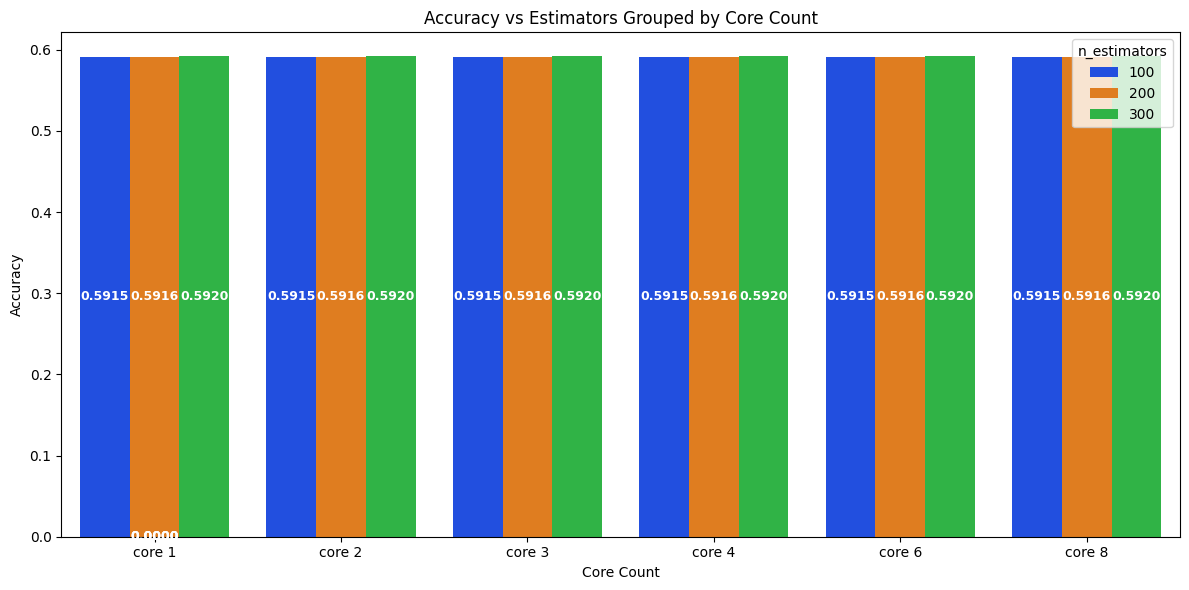

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_accuracy_by_cores_grouped(results):
    records = []
    for n_estimators in sorted(results.keys()):
        for core in sorted(results[n_estimators].keys()):
            records.append({
                'core': f"core {core}",
                'n_estimators': f"{n_estimators}",
                'accuracy': results[n_estimators][core]['accuracy'],
                'core_id': core
            })

    df = pd.DataFrame(records)

    plt.figure(figsize=(12, 6))
    ax = sns.barplot(
        data=df,
        x='core',
        y='accuracy',
        hue='n_estimators',
        palette=sns.color_palette("bright", 3)
    )

    # Annotate bars with 4 decimal digits (no approximation in data)
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height / 2,
            f"{height:.4f}",  # display only 4 digits after decimal
            ha='center',
            va='center',
            color='white',
            fontsize=9,
            weight='bold'
        )

    plt.title("Accuracy vs Estimators Grouped by Core Count")
    plt.xlabel("Core Count")
    plt.ylabel("Accuracy")
    plt.legend(title='n_estimators')
    plt.tight_layout()
    plt.savefig("accuracy_by_cores_grouped.png")
    plt.show()

# Call the function with your results
plot_accuracy_by_cores_grouped(results)


# Decision tree

In [36]:
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

def decision_tree_parallel_with_varying_cores(
    X_train, y_train, X_test, y_test,
    max_depth_list=[5, 10, 15],
    core_numbers=[1, 2, 3, 4, 6, 8]):
    
    results = {}
    cm_dict = {}  # To store confusion matrices

    for max_depth in max_depth_list:
        print(f"\n🌲 Training Decision Tree with max_depth={max_depth}...\n")
        
        results[max_depth] = {}
        cm_dict[max_depth] = {}

        for cores in core_numbers:
            print(f"⚙️ Simulating training with {cores} core(s)...")
            start_time = time.time()

            dt = DecisionTreeClassifier(
                max_depth=max_depth,
                random_state=42
            )

            # Fit model
            dt.fit(X_train, y_train)

            y_pred = dt.predict(X_test)

            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            conf_matrix = confusion_matrix(y_test, y_pred)
            training_time = time.time() - start_time

            print(f"✅ Done: max_depth={max_depth}, cores={cores}")
            print(f"Accuracy: {accuracy:.4f}, F1: {f1:.4f}, Time: {training_time:.2f} sec")
            print(f"Confusion Matrix:\n{conf_matrix}\n")

            results[max_depth][cores] = {
                'accuracy': accuracy,
                'f1': f1,
                'training_time': training_time
            }
            cm_dict[max_depth][cores] = conf_matrix

    return results, cm_dict




# Example call for multiple max_depth and core configurations
results_tree, cm_dict = decision_tree_parallel_with_varying_cores(X_train, y_train, X_test, y_test, max_depth_list=[5, 10, 15], core_numbers=[1, 2, 3, 4,6,8])

# Print the results dictionary
print("\nAll Results:")
print(results_tree)



🌲 Training Decision Tree with max_depth=5...

⚙️ Simulating training with 1 core(s)...
✅ Done: max_depth=5, cores=1
Accuracy: 0.5987, F1: 0.4554, Time: 0.10 sec
Confusion Matrix:
[[4884   43]
 [3248   25]]

⚙️ Simulating training with 2 core(s)...
✅ Done: max_depth=5, cores=2
Accuracy: 0.5987, F1: 0.4554, Time: 0.08 sec
Confusion Matrix:
[[4884   43]
 [3248   25]]

⚙️ Simulating training with 3 core(s)...
✅ Done: max_depth=5, cores=3
Accuracy: 0.5987, F1: 0.4554, Time: 0.08 sec
Confusion Matrix:
[[4884   43]
 [3248   25]]

⚙️ Simulating training with 4 core(s)...
✅ Done: max_depth=5, cores=4
Accuracy: 0.5987, F1: 0.4554, Time: 0.07 sec
Confusion Matrix:
[[4884   43]
 [3248   25]]

⚙️ Simulating training with 6 core(s)...
✅ Done: max_depth=5, cores=6
Accuracy: 0.5987, F1: 0.4554, Time: 0.08 sec
Confusion Matrix:
[[4884   43]
 [3248   25]]

⚙️ Simulating training with 8 core(s)...
✅ Done: max_depth=5, cores=8
Accuracy: 0.5987, F1: 0.4554, Time: 0.08 sec
Confusion Matrix:
[[4884   43]
 [

Plot saved as results_plot_core_1.png


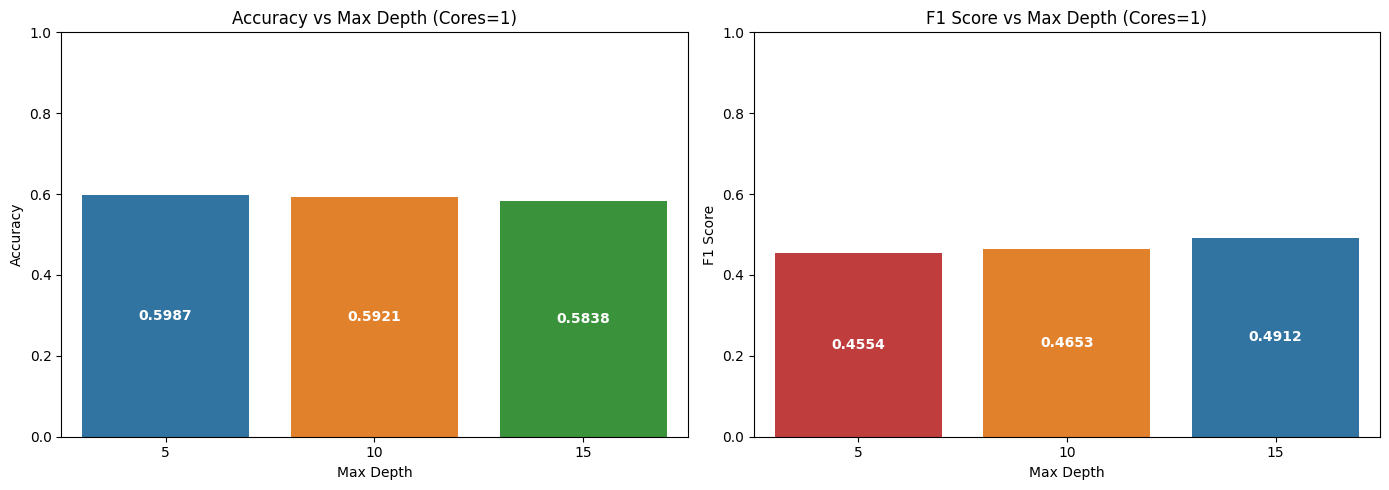

Plot saved as results_plot_core_2.png


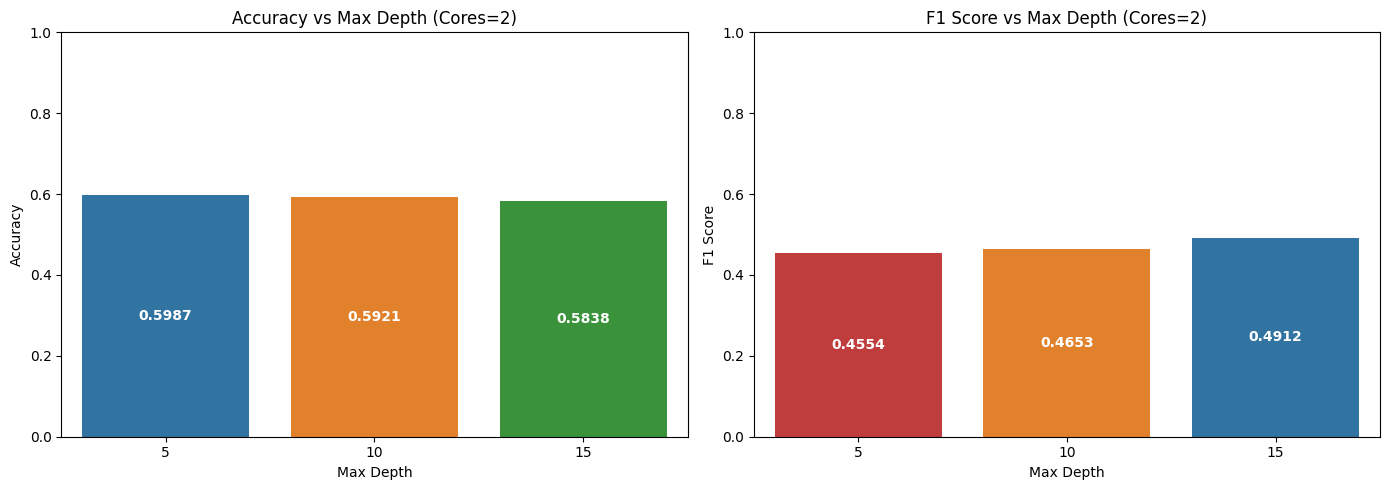

Plot saved as results_plot_core_3.png


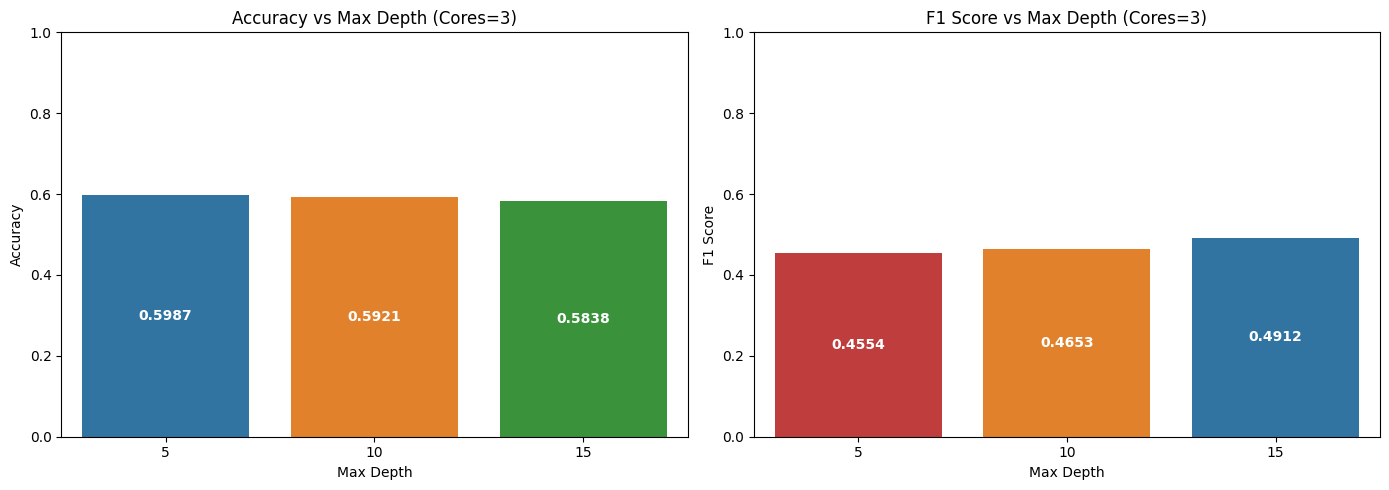

Plot saved as results_plot_core_4.png


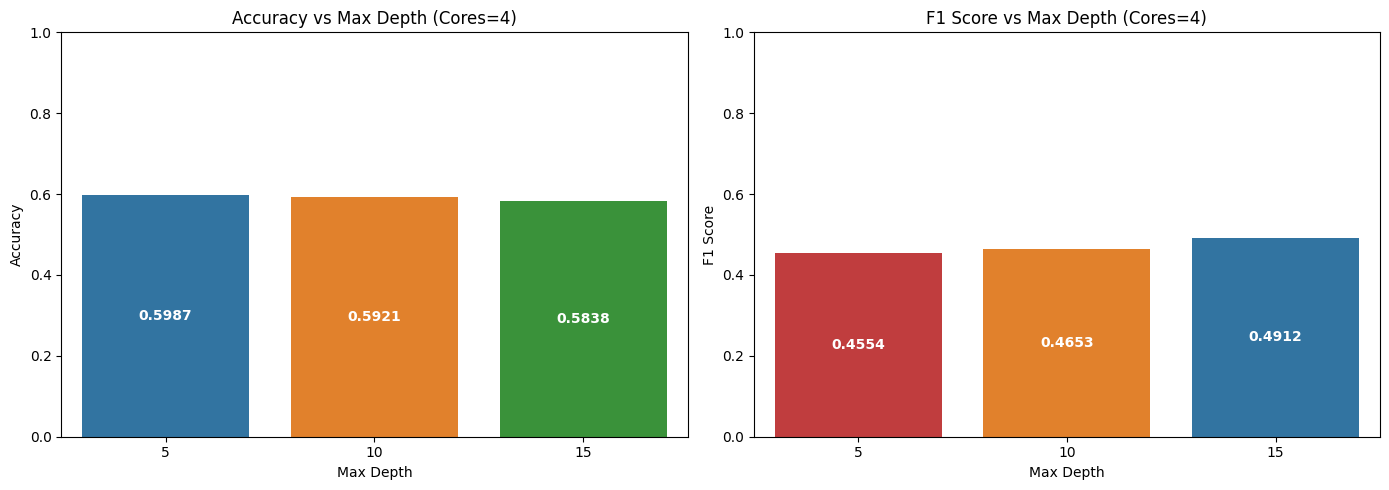

Plot saved as results_plot_core_6.png


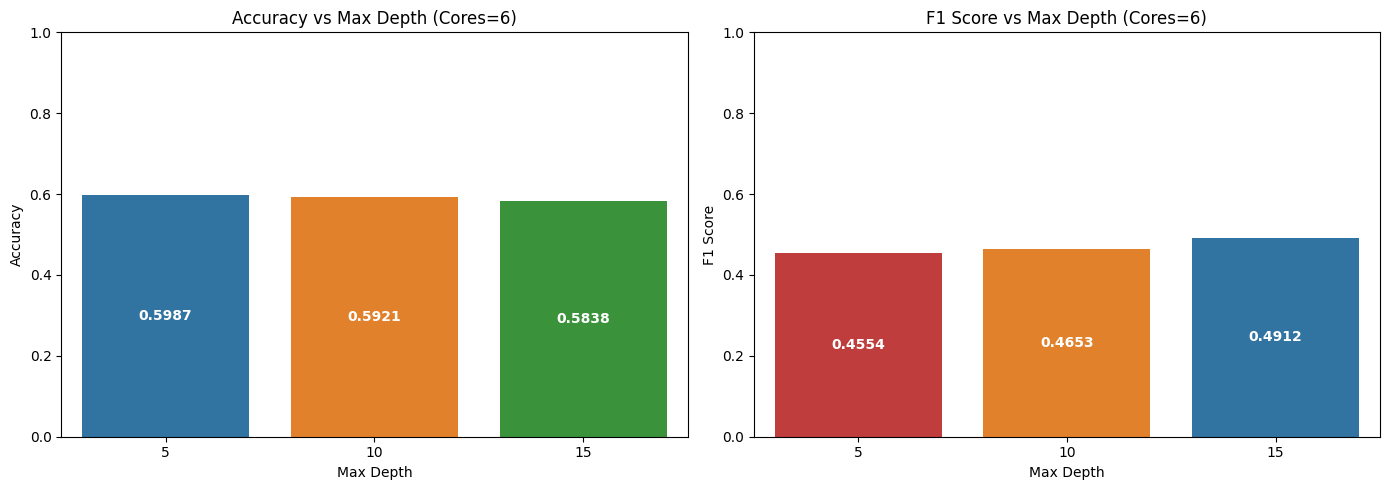

Plot saved as results_plot_core_8.png


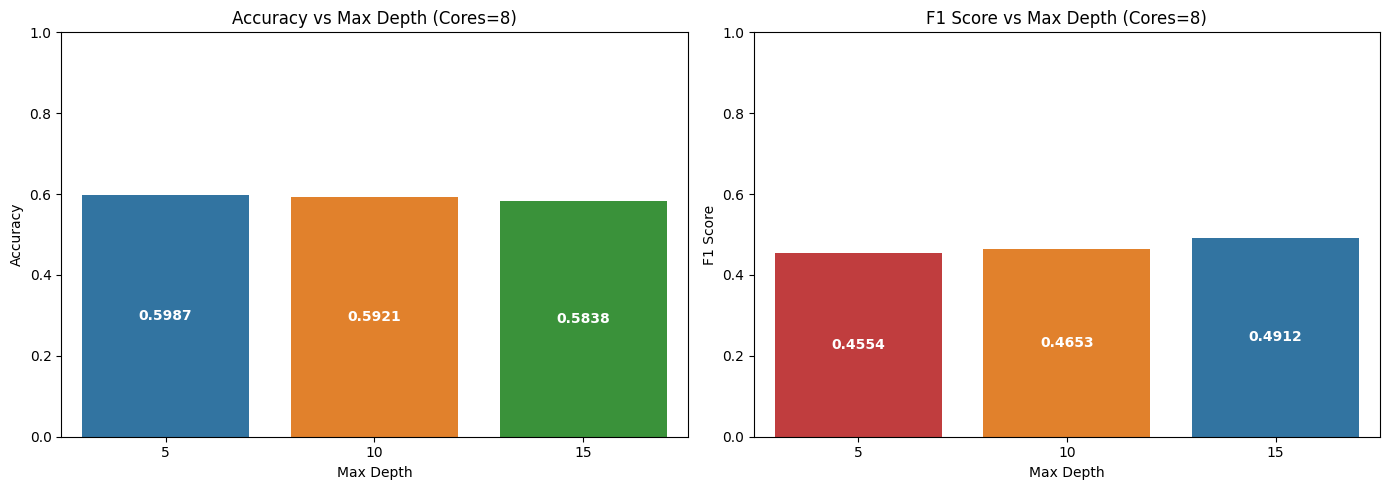

Plot saved as training_time_vs_cores.png


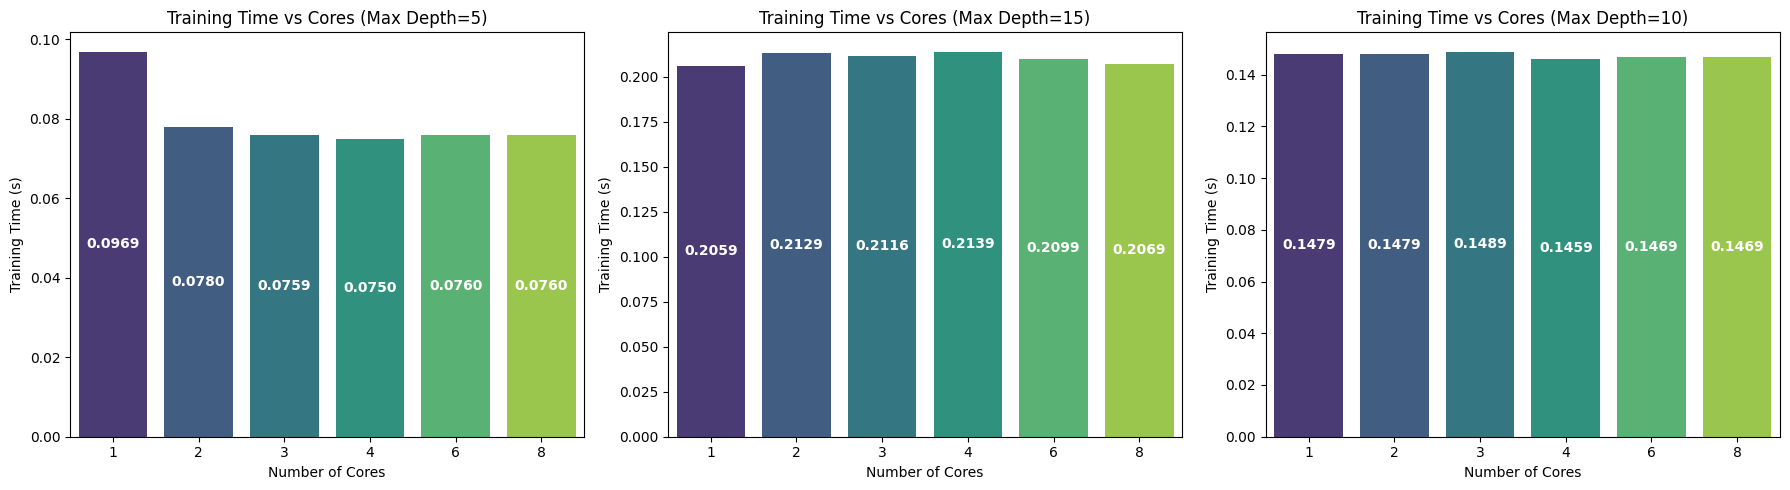

In [37]:
import warnings
warnings.filterwarnings('ignore')

def plot_decision_tree_results_by_core(results_tree):
    import matplotlib.pyplot as plt
    import seaborn as sns
    warnings.filterwarnings('ignore')

    max_depths = sorted(results_tree.keys())
    core_numbers = sorted(next(iter(results_tree.values())).keys())

    # Plot accuracy and F1 vs Max Depth for each core
    for core in core_numbers:
        accuracy = [results_tree[depth][core]['accuracy'] for depth in max_depths]
        f1 = [results_tree[depth][core]['f1'] for depth in max_depths]

        fig, axs = plt.subplots(1, 2, figsize=(14, 5))  # Adjusted size for compact row layout

        # Accuracy Plot
        sns.barplot(x=max_depths, y=accuracy, ax=axs[0], palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
        axs[0].set_title(f"Accuracy vs Max Depth (Cores={core})")
        axs[0].set_xlabel("Max Depth")
        axs[0].set_ylabel("Accuracy")
        axs[0].set_ylim(0, 1)
        for i, v in enumerate(accuracy):
            axs[0].text(i, v / 2, f"{v:.4f}", color='white', ha='center', va='center', fontweight='bold')

        # F1 Score Plot
        sns.barplot(x=max_depths, y=f1, ax=axs[1], palette=['#d62728', '#ff7f0e', '#1f77b4', '#2ca02c'])
        axs[1].set_title(f"F1 Score vs Max Depth (Cores={core})")
        axs[1].set_xlabel("Max Depth")
        axs[1].set_ylabel("F1 Score")
        axs[1].set_ylim(0, 1)
        for i, v in enumerate(f1):
            axs[1].text(i, v / 2, f"{v:.4f}", color='white', ha='center', va='center', fontweight='bold')

        plt.tight_layout()
        save_path = f"results_plot_core_{core}.png"
        plt.savefig(save_path)
        print(f"Plot saved as {save_path}")
        plt.show()
        plt.close(fig)

    # Plot Training Time vs Cores (Max Depth fixed for each plot) in a single row
    max_depths_to_plot = [max_depths[0], max_depths[-1], max_depths[len(max_depths)//2]]  # Example: select first, last, and middle max depths

    fig, axs = plt.subplots(1, 3, figsize=(18, 5))  # Three plots in one row

    for i, max_depth in enumerate(max_depths_to_plot):
        training_times = [results_tree[max_depth][core]['training_time'] for core in core_numbers]

        sns.barplot(x=core_numbers, y=training_times, ax=axs[i], palette='viridis')
        axs[i].set_title(f"Training Time vs Cores (Max Depth={max_depth})")
        axs[i].set_xlabel("Number of Cores")
        axs[i].set_ylabel("Training Time (s)")
        for j, v in enumerate(training_times):
            axs[i].text(j, v / 2, f"{v:.4f}", color='white', ha='center', va='center', fontweight='bold')

    plt.tight_layout()
    save_path = "training_time_vs_cores.png"
    plt.savefig(save_path)
    print(f"Plot saved as {save_path}")
    plt.show()
    plt.close()

# Assuming `results_tree` is your data
plot_decision_tree_results_by_core(results_tree)


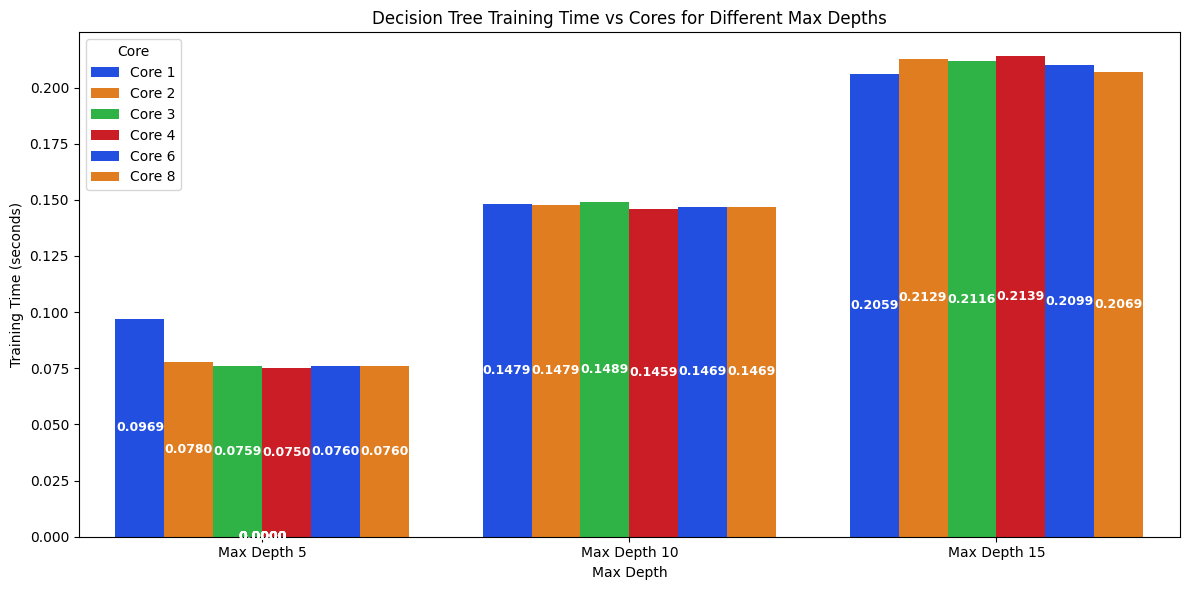

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_grouped_training_time_decision_tree(results):
    records = []
    for max_depth in sorted(results.keys()):
        for core in sorted(results[max_depth].keys()):
            records.append({
                'max_depth': f"Max Depth {max_depth}",
                'core': f"Core {core}",
                'training_time': results[max_depth][core]['training_time'],
                'core_id': core  # numeric for color consistency
            })

    df = pd.DataFrame(records)

    plt.figure(figsize=(12, 6))
    ax = sns.barplot(
        data=df,
        x='max_depth',
        y='training_time',
        hue='core',
        palette=sns.color_palette("bright", 4)
    )

    # Add white training time values inside each bar with 4 decimal points
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height / 2,
            f"{height:.4f}",  # Displaying the value with 4 decimal points
            ha='center',
            va='center',
            color='white',
            fontsize=9,
            weight='bold'
        )

    plt.title("Decision Tree Training Time vs Cores for Different Max Depths")
    plt.xlabel("Max Depth")
    plt.ylabel("Training Time (seconds)")
    plt.legend(title='Core')
    plt.tight_layout()
    plt.savefig("grouped_training_time_decision_tree.png")
    plt.show()

# Assuming `results` is your decision tree data
plot_grouped_training_time_decision_tree(results_tree)


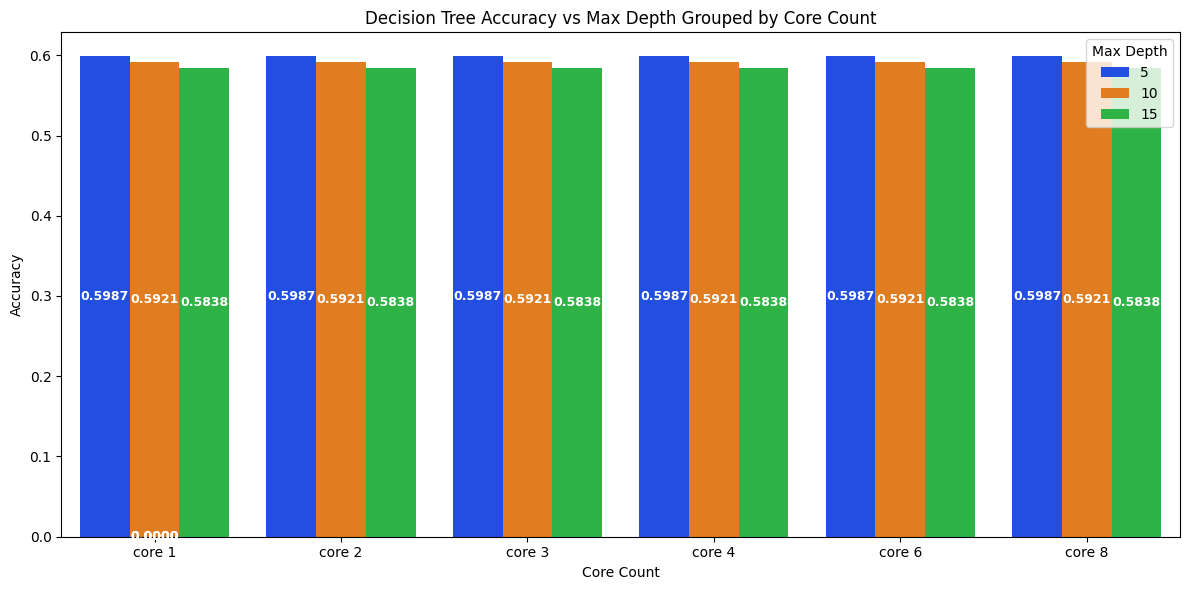

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_decision_tree_accuracy_grouped(results_tree):
    records = []
    
    for max_depth in sorted(results_tree.keys()):
        for core in sorted(results_tree[max_depth].keys()):
            records.append({
                'core': f"core {core}",
                'max_depth': f"{max_depth}",
                'accuracy': results_tree[max_depth][core]['accuracy'],
                'core_id': core
            })

    df = pd.DataFrame(records)

    plt.figure(figsize=(12, 6))
    ax = sns.barplot(
        data=df,
        x='core',
        y='accuracy',
        hue='max_depth',
        palette=sns.color_palette("bright", len(df['max_depth'].unique()))
    )

    for bar in ax.patches:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height / 2,
            f"{height:.4f}",
            ha='center',
            va='center',
            color='white',
            fontsize=9,
            weight='bold'
        )

    plt.title("Decision Tree Accuracy vs Max Depth Grouped by Core Count")
    plt.xlabel("Core Count")
    plt.ylabel("Accuracy")
    plt.legend(title='Max Depth')
    plt.tight_layout()
    plt.savefig("dt_accuracy_by_cores_grouped.png")
    plt.show()

# Call the function with your decision tree results
plot_decision_tree_accuracy_grouped(results_tree)


# Logistic Regression

In [40]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

def logistic_regression_parallel_with_varying_cores(X_train, y_train, X_test, y_test, C_list=[0.1, 1, 10], core_numbers=[1, 2, 3, 4]):
    results = {}
    cm_dict = {}

    for C in C_list:
        print(f"Training Logistic Regression with C={C}...\n")
        results[C] = {}
        cm_dict[C] = {}

        for cores in core_numbers:
            print(f"⚙️ Training with n_jobs={cores} cores...")
            start_time = time.time()

            # Define and train the model
            lr = LogisticRegression(
                C=C,
                solver='lbfgs',   # 'lbfgs' supports n_jobs
                max_iter=1000,
                n_jobs=cores,
                random_state=42
            )
            lr.fit(X_train, y_train)

            # Predict
            y_pred = lr.predict(X_test)

            # Metrics
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            conf_matrix = confusion_matrix(y_test, y_pred)
            training_time = time.time() - start_time

            print(f"✅ Training completed with C={C}, {cores} cores.")
            print(f"Accuracy: {accuracy:.4f}")
            print(f"F1 Score: {f1:.4f}")
            print(f"Training Time: {training_time:.2f} seconds")
            print(f"Confusion Matrix:\n{conf_matrix}")

            results[C][cores] = {
                'accuracy': accuracy,
                'f1': f1,
                'training_time': training_time
            }
            cm_dict[C][cores] = conf_matrix

    return results, cm_dict

# Example usage
results_logreg, cm_dict_logreg = logistic_regression_parallel_with_varying_cores(
    X_train, y_train, X_test, y_test,
    C_list=[0.1, 1, 10],
    core_numbers=[1, 2, 3, 4,6,8]
)

print("\nAll Logistic Regression Results:")
print(results_logreg)


Training Logistic Regression with C=0.1...

⚙️ Training with n_jobs=1 cores...
✅ Training completed with C=0.1, 1 cores.
Accuracy: 0.6009
F1 Score: 0.4510
Training Time: 0.06 seconds
Confusion Matrix:
[[4927    0]
 [3273    0]]
⚙️ Training with n_jobs=2 cores...
✅ Training completed with C=0.1, 2 cores.
Accuracy: 0.6009
F1 Score: 0.4510
Training Time: 2.19 seconds
Confusion Matrix:
[[4927    0]
 [3273    0]]
⚙️ Training with n_jobs=3 cores...
✅ Training completed with C=0.1, 3 cores.
Accuracy: 0.6009
F1 Score: 0.4510
Training Time: 2.48 seconds
Confusion Matrix:
[[4927    0]
 [3273    0]]
⚙️ Training with n_jobs=4 cores...
✅ Training completed with C=0.1, 4 cores.
Accuracy: 0.6009
F1 Score: 0.4510
Training Time: 1.78 seconds
Confusion Matrix:
[[4927    0]
 [3273    0]]
⚙️ Training with n_jobs=6 cores...
✅ Training completed with C=0.1, 6 cores.
Accuracy: 0.6009
F1 Score: 0.4510
Training Time: 2.83 seconds
Confusion Matrix:
[[4927    0]
 [3273    0]]
⚙️ Training with n_jobs=8 cores...
✅

In [41]:
results_logreg

{0.1: {1: {'accuracy': 0.6008536585365853,
   'f1': 0.451040751978328,
   'training_time': 0.06495976448059082},
  2: {'accuracy': 0.6008536585365853,
   'f1': 0.451040751978328,
   'training_time': 2.189021348953247},
  3: {'accuracy': 0.6008536585365853,
   'f1': 0.451040751978328,
   'training_time': 2.4773101806640625},
  4: {'accuracy': 0.6008536585365853,
   'f1': 0.451040751978328,
   'training_time': 1.7776446342468262},
  6: {'accuracy': 0.6008536585365853,
   'f1': 0.451040751978328,
   'training_time': 2.8285558223724365},
  8: {'accuracy': 0.6008536585365853,
   'f1': 0.451040751978328,
   'training_time': 1.768303632736206}},
 1: {1: {'accuracy': 0.6008536585365853,
   'f1': 0.451040751978328,
   'training_time': 0.016989946365356445},
  2: {'accuracy': 0.6008536585365853,
   'f1': 0.451040751978328,
   'training_time': 2.4234888553619385},
  3: {'accuracy': 0.6008536585365853,
   'f1': 0.451040751978328,
   'training_time': 2.342468023300171},
  4: {'accuracy': 0.60085365

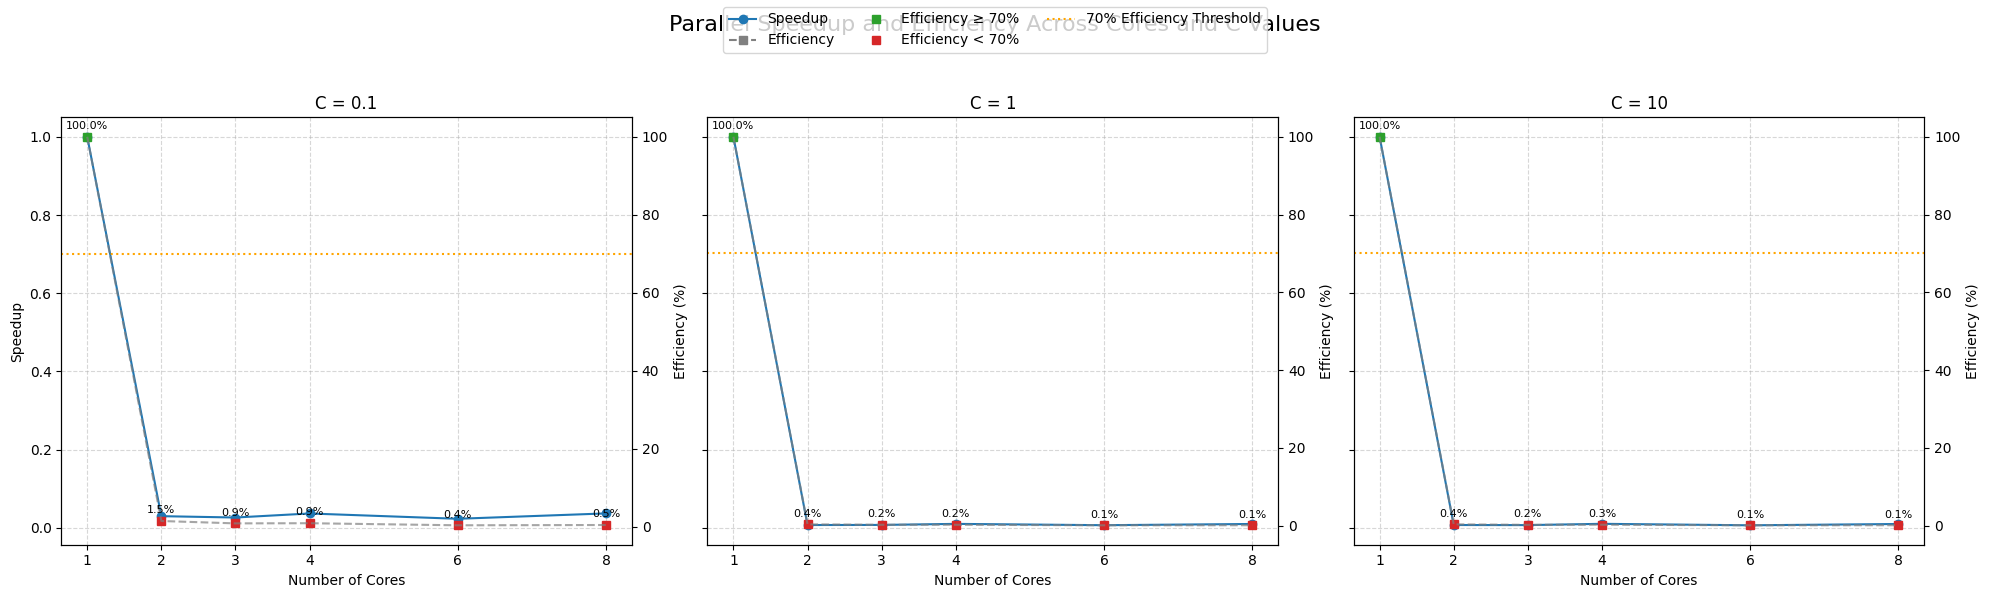

In [42]:
import matplotlib.pyplot as plt

def compute_speedup_efficiency(data):
    base_time = data[1]['training_time']
    cores = sorted(data.keys())
    speedup = [base_time / data[n]['training_time'] for n in cores]
    efficiency = [(s / n) * 100 for s, n in zip(speedup, cores)]
    return cores, speedup, efficiency

# Plot setup: 3 subplots for each C value (0.1, 1, 10)
fig, axs = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

for i, c_val in enumerate([0.1, 1, 10]):
    ax = axs[i]
    cores, speedup, efficiency = compute_speedup_efficiency(results_logreg[c_val])
    
    # Speedup plot
    ax.plot(cores, speedup, marker='o', color='tab:blue', label='Speedup')
    ax.set_xlabel('Number of Cores')
    ax.set_title(f'C = {c_val}')
    ax.set_xticks(cores)
    ax.grid(True, linestyle='--', alpha=0.5)
    
    # Efficiency on twin axis
    ax2 = ax.twinx()
    marker_colors = ['tab:green' if e >= 70 else 'tab:red' for e in efficiency]
    for x, y, c, e in zip(cores, efficiency, marker_colors, efficiency):
        ax2.plot(x, y, marker='s', color=c)
        ax2.text(x, y + 2, f'{e:.1f}%', ha='center', fontsize=8)

    ax2.plot(cores, efficiency, linestyle='--', color='gray', alpha=0.7, label='Efficiency')
    ax2.axhline(70, color='orange', linestyle=':', linewidth=1.5, label='70% Efficiency Threshold')
    ax2.set_ylabel('Efficiency (%)')
    ax2.tick_params(axis='y')

    if i == 0:
        ax.set_ylabel('Speedup')

# Global legend
line1, = axs[0].plot([], [], 'o-', color='tab:blue', label='Speedup')
line2, = axs[0].plot([], [], 's--', color='gray', label='Efficiency')
line3, = axs[0].plot([], [], 's', color='tab:green', label='Efficiency ≥ 70%')
line4, = axs[0].plot([], [], 's', color='tab:red', label='Efficiency < 70%')
line5, = axs[0].plot([], [], ':', color='orange', label='70% Threshold')

fig.legend([line1, line2, line3, line4, line5],
           ['Speedup', 'Efficiency', 'Efficiency ≥ 70%', 'Efficiency < 70%', '70% Efficiency Threshold'],
           loc='upper center', ncol=3, fontsize=10)

fig.suptitle('Parallel Speedup and Efficiency Across Cores and C Values', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


Plot saved as logreg_results_plot_core_1.png


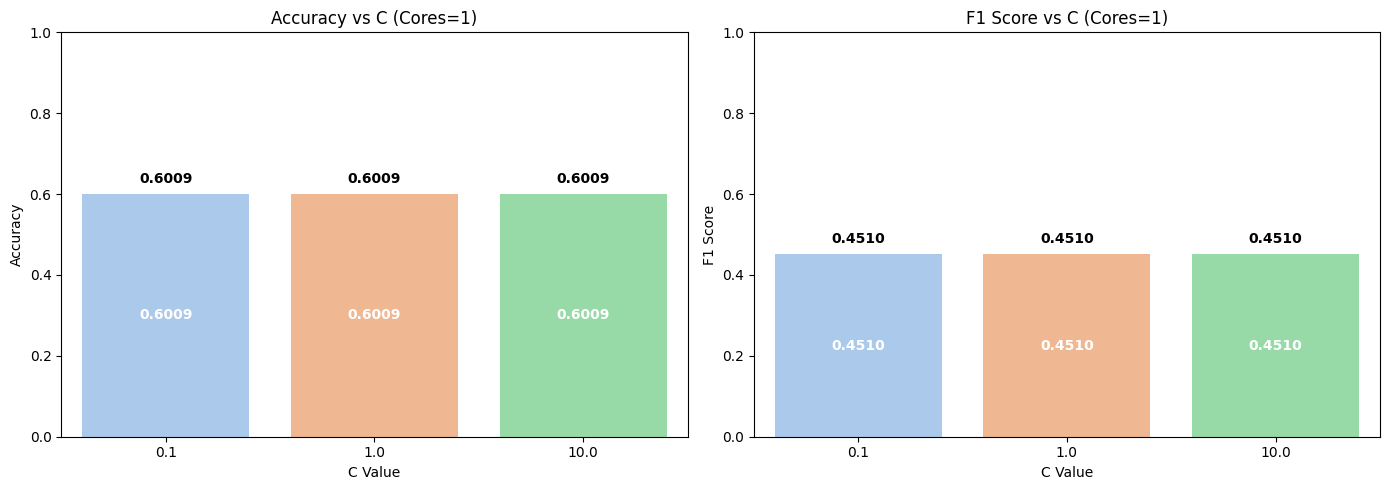

Plot saved as logreg_results_plot_core_2.png


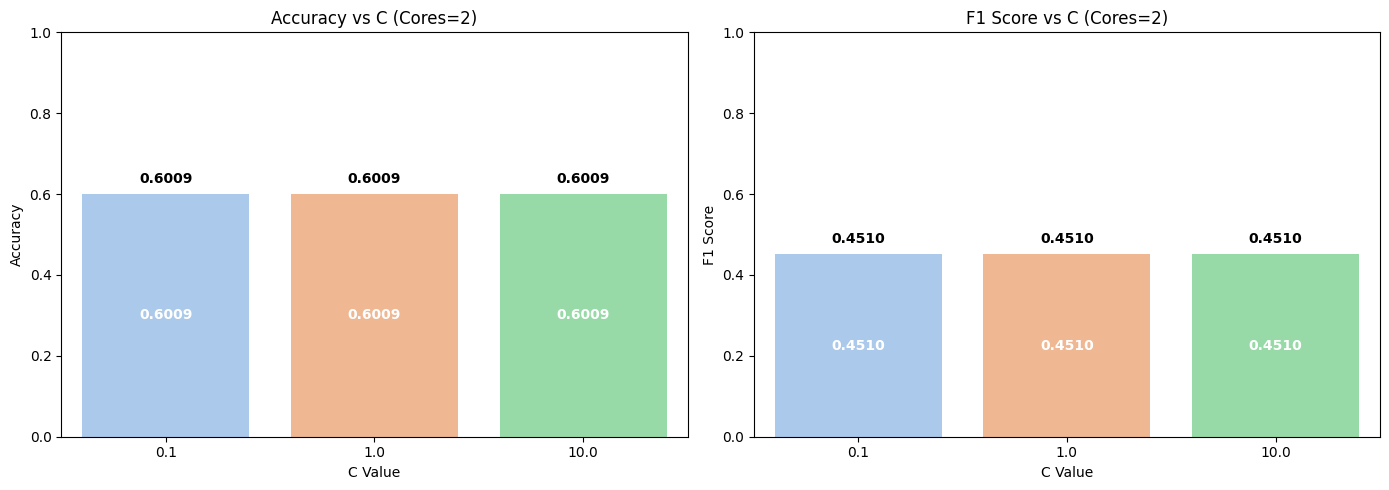

Plot saved as logreg_results_plot_core_3.png


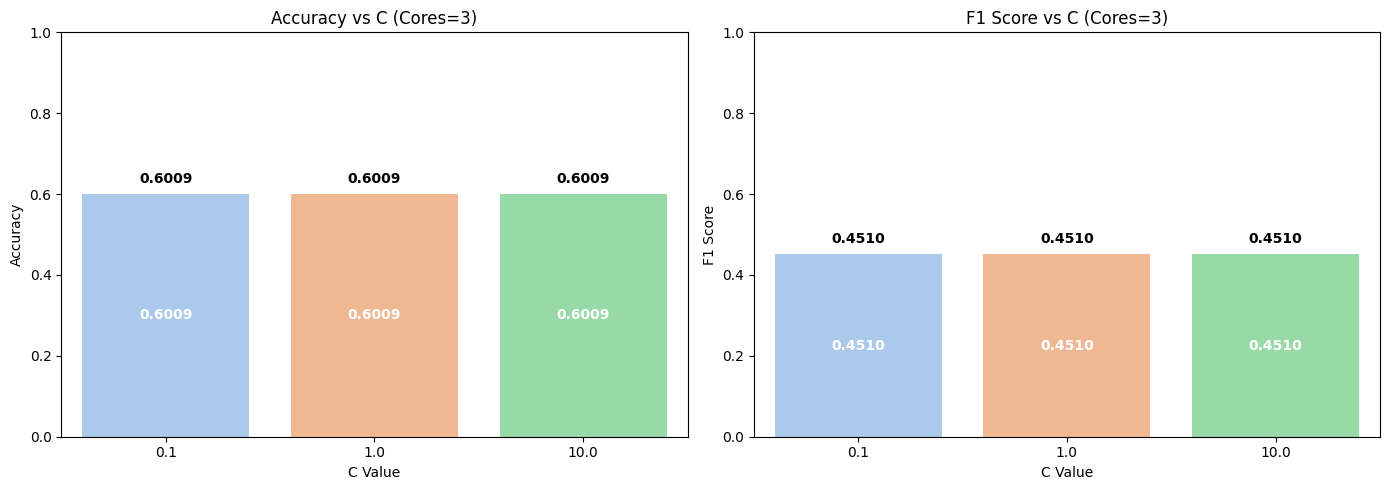

Plot saved as logreg_results_plot_core_4.png


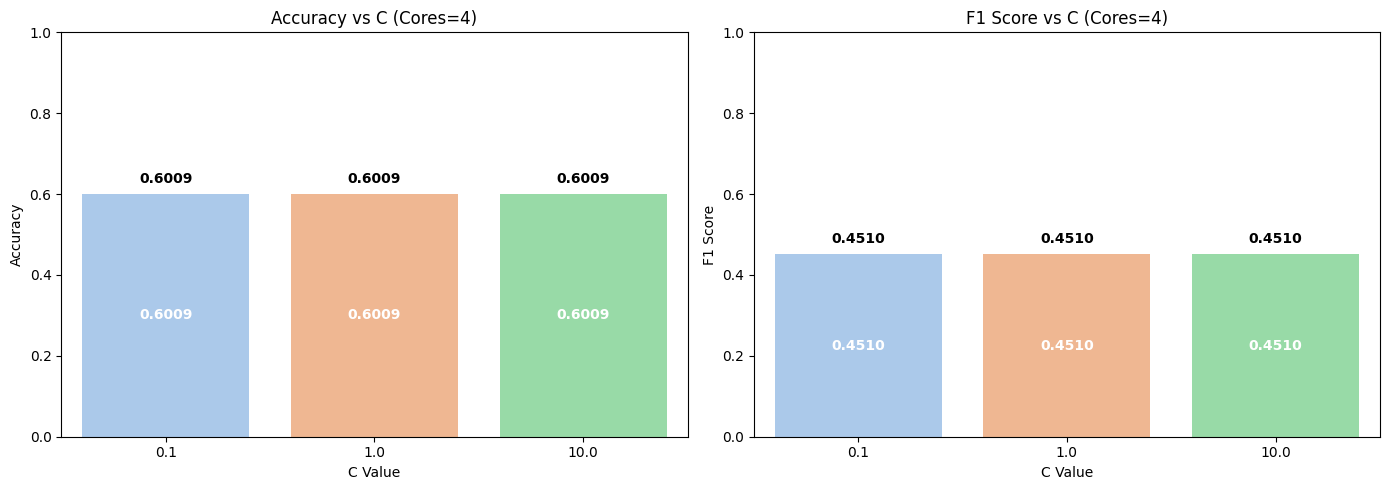

Plot saved as logreg_results_plot_core_6.png


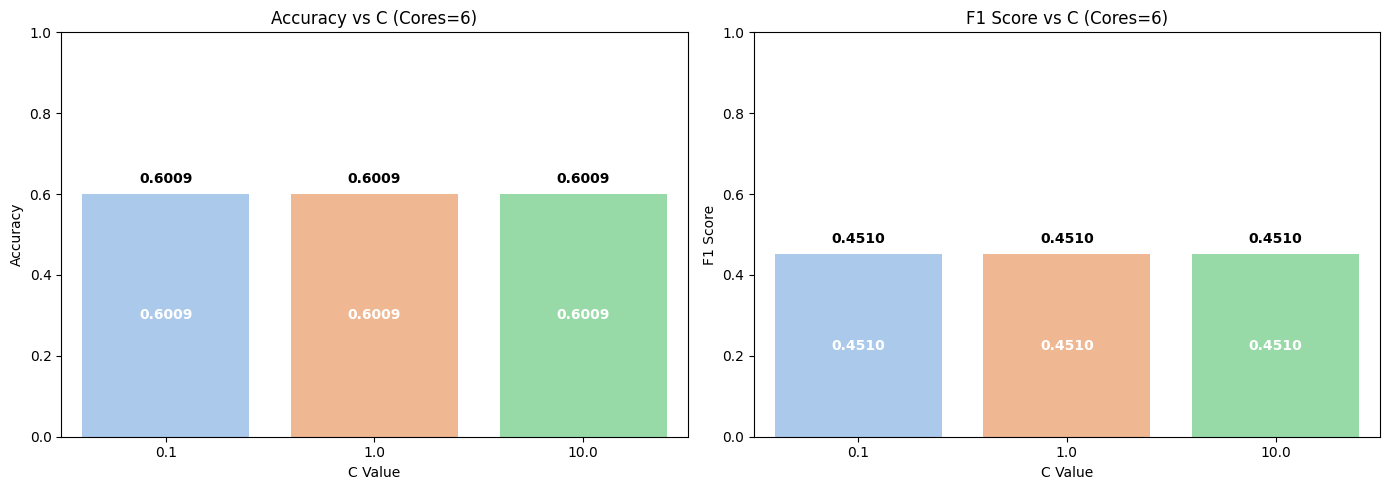

Plot saved as logreg_results_plot_core_8.png


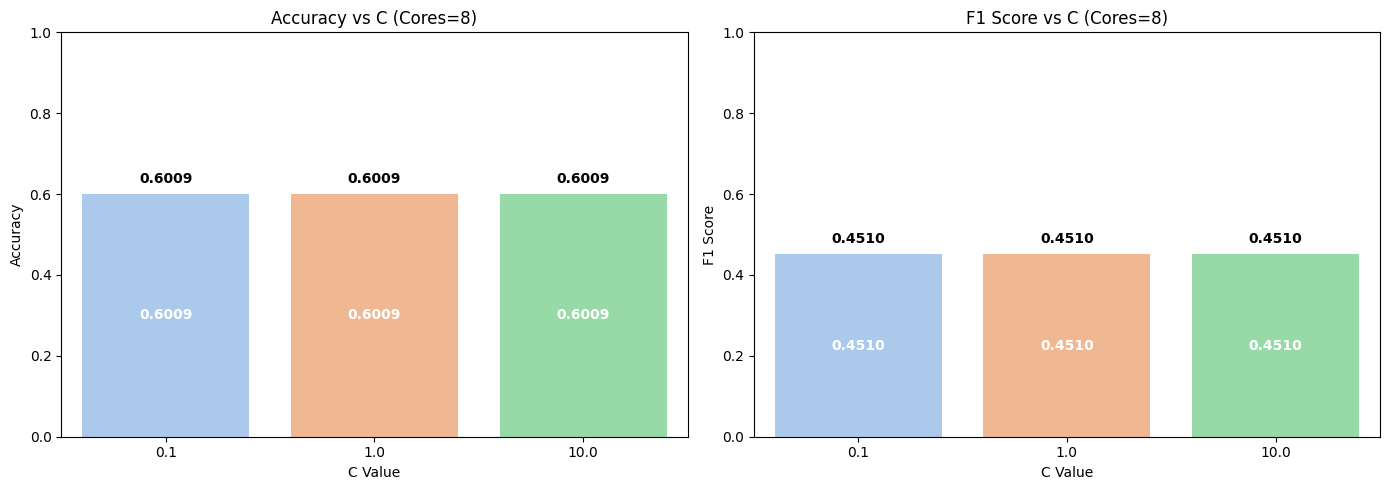

Plot saved as logreg_training_time_vs_cores.png


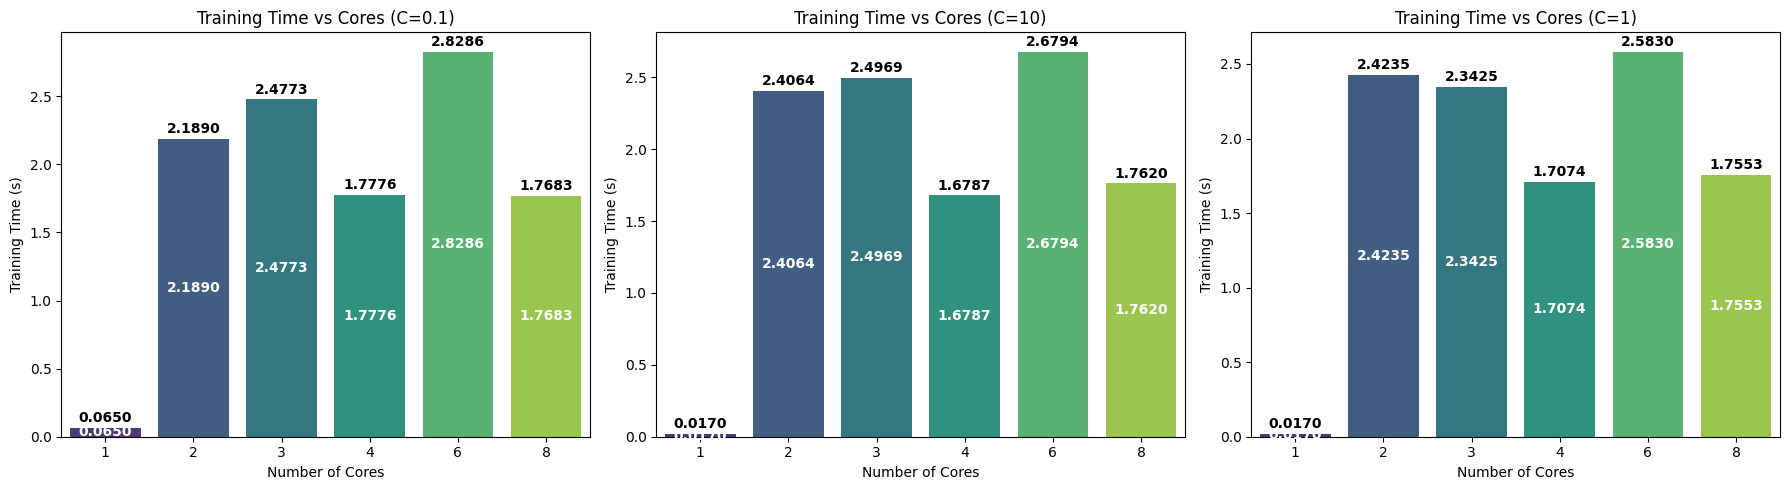

In [43]:
import warnings
warnings.filterwarnings('ignore')
import warnings
warnings.filterwarnings('ignore')

def plot_logistic_regression_results_by_core(results_logreg):
    import matplotlib.pyplot as plt
    import seaborn as sns
    warnings.filterwarnings('ignore')

    C_values = sorted(results_logreg.keys())
    core_numbers = sorted(next(iter(results_logreg.values())).keys())

    # Plot Accuracy and F1 Score vs C for each core
    for core in core_numbers:
        accuracy = [results_logreg[C][core]['accuracy'] for C in C_values]
        f1 = [results_logreg[C][core]['f1'] for C in C_values]

        fig, axs = plt.subplots(1, 2, figsize=(14, 5))

        # Accuracy Plot
        sns.barplot(x=C_values, y=accuracy, ax=axs[0], palette='pastel')
        axs[0].set_title(f"Accuracy vs C (Cores={core})")
        axs[0].set_xlabel("C Value")
        axs[0].set_ylabel("Accuracy")
        axs[0].set_ylim(0, 1)
        for i, v in enumerate(accuracy):
            axs[0].text(i, v / 2, f"{v:.4f}", color='white', ha='center', va='center', fontweight='bold')  # inside bar
            axs[0].text(i, v + 0.02, f"{v:.4f}", color='black', ha='center', va='bottom', fontweight='bold')  # above bar

        # F1 Score Plot
        sns.barplot(x=C_values, y=f1, ax=axs[1], palette='pastel')
        axs[1].set_title(f"F1 Score vs C (Cores={core})")
        axs[1].set_xlabel("C Value")
        axs[1].set_ylabel("F1 Score")
        axs[1].set_ylim(0, 1)
        for i, v in enumerate(f1):
            axs[1].text(i, v / 2, f"{v:.4f}", color='white', ha='center', va='center', fontweight='bold')
            axs[1].text(i, v + 0.02, f"{v:.4f}", color='black', ha='center', va='bottom', fontweight='bold')

        plt.tight_layout()
        save_path = f"logreg_results_plot_core_{core}.png"
        plt.savefig(save_path)
        print(f"Plot saved as {save_path}")
        plt.show()
        plt.close(fig)

    # Plot Training Time vs Cores (for selected C values)
    C_values_to_plot = [C_values[0], C_values[-1], C_values[len(C_values)//2]]

    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    for i, C in enumerate(C_values_to_plot):
        training_times = [results_logreg[C][core]['training_time'] for core in core_numbers]

        sns.barplot(x=core_numbers, y=training_times, ax=axs[i], palette='viridis')
        axs[i].set_title(f"Training Time vs Cores (C={C})")
        axs[i].set_xlabel("Number of Cores")
        axs[i].set_ylabel("Training Time (s)")
        for j, v in enumerate(training_times):
            axs[i].text(j, v / 2, f"{v:.4f}", color='white', ha='center', va='center', fontweight='bold')
            axs[i].text(j, v + 0.02, f"{v:.4f}", color='black', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    save_path = "logreg_training_time_vs_cores.png"
    plt.savefig(save_path)
    print(f"Plot saved as {save_path}")
    plt.show()
    plt.close()

# Use this to plot your logistic regression results
plot_logistic_regression_results_by_core(results_logreg)


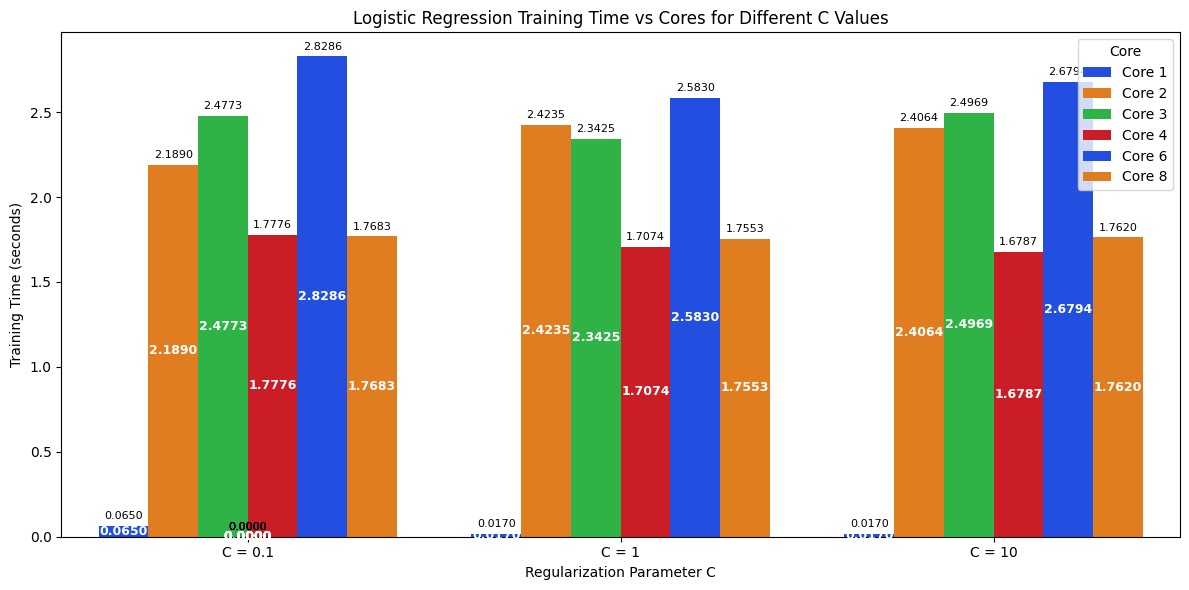

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_grouped_training_time_logistic_regression(results_logistic):
    records = []
    for C_value in sorted(results_logistic.keys()):
        for core in sorted(results_logistic[C_value].keys()):
            records.append({
                'C': f"C = {C_value}",
                'core': f"Core {core}",
                'training_time': results_logistic[C_value][core]['training_time'],
                'core_id': core  # numeric for consistent hue ordering
            })

    df = pd.DataFrame(records)

    plt.figure(figsize=(12, 6))
    ax = sns.barplot(
        data=df,
        x='C',
        y='training_time',
        hue='core',
        palette=sns.color_palette("bright", 4)
    )

    # Annotate each bar inside and above with exact 4 decimal value
    for bar in ax.patches:
        height = bar.get_height()
        xpos = bar.get_x() + bar.get_width() / 2
        value_text = f"{height:.4f}"
        # Inside bar (white)
        ax.text(xpos, height / 2, value_text, ha='center', va='center', color='white', fontsize=9, weight='bold')
        # Above bar (black)
        ax.text(xpos, height + (max(df['training_time']) * 0.01), value_text, ha='center', va='bottom', color='black', fontsize=8)

    plt.title("Logistic Regression Training Time vs Cores for Different C Values")
    plt.xlabel("Regularization Parameter C")
    plt.ylabel("Training Time (seconds)")
    plt.legend(title='Core')
    plt.tight_layout()
    plt.savefig("grouped_training_time_logistic_regression.png")
    plt.show()

# Call the function assuming `results_logistic` holds the training times
plot_grouped_training_time_logistic_regression(results_logreg)


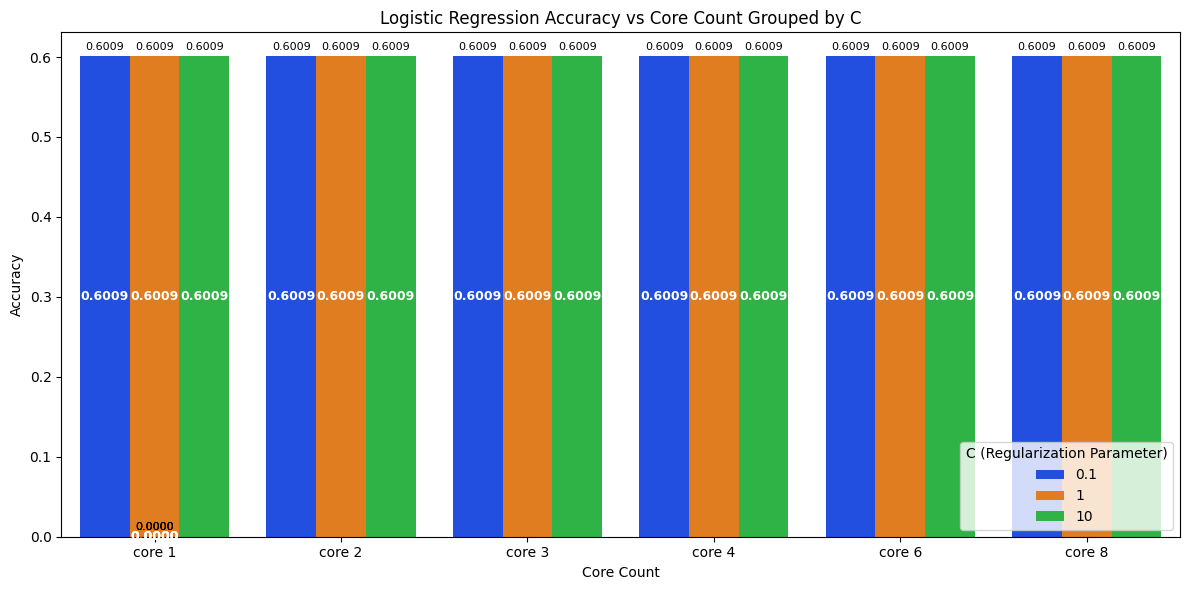

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_logistic_regression_accuracy_grouped(results_logistic):
    records = []
    
    for C_value in sorted(results_logistic.keys()):
        for core in sorted(results_logistic[C_value].keys()):
            records.append({
                'core': f"core {core}",
                'C': f"{C_value}",
                'accuracy': results_logistic[C_value][core]['accuracy'],
                'core_id': core
            })

    df = pd.DataFrame(records)

    plt.figure(figsize=(12, 6))
    ax = sns.barplot(
        data=df,
        x='core',
        y='accuracy',
        hue='C',
        palette=sns.color_palette("bright", len(df['C'].unique()))
    )

    # Annotate bars with accuracy values
    for bar in ax.patches:
        height = bar.get_height()
        xpos = bar.get_x() + bar.get_width() / 2
        value_text = f"{height:.4f}"
        # Inside bar (white)
        ax.text(xpos, height / 2, value_text, ha='center', va='center', color='white', fontsize=9, weight='bold')
        # Above bar (black)
        ax.text(xpos, height + (max(df['accuracy']) * 0.01), value_text, ha='center', va='bottom', color='black', fontsize=8)

    plt.title("Logistic Regression Accuracy vs Core Count Grouped by C")
    plt.xlabel("Core Count")
    plt.ylabel("Accuracy")
    plt.legend(title='C (Regularization Parameter)')
    plt.tight_layout()
    plt.savefig("logistic_regression_accuracy_by_cores_grouped.png")
    plt.show()

# Call the function with your logistic regression results
plot_logistic_regression_accuracy_grouped(results_logreg)


# Xgboost

In [46]:
import time
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

def xgboost_parallel_with_varying_cores(X_train, y_train, X_test, y_test, max_depth_list=[3, 6, 9], core_numbers=[1, 2, 3, 4]):
    results = {}
    cm_dict = {}

    for max_depth in max_depth_list:
        print(f"Training XGBoost with max_depth={max_depth}...\n")
        results[max_depth] = {}
        cm_dict[max_depth] = {}

        for cores in core_numbers:
            print(f"⚙️ Training with n_jobs={cores} cores...")
            start_time = time.time()

            # Define and train the XGBoost model
            xgb = XGBClassifier(
                max_depth=max_depth,
                n_jobs=cores,  # n_jobs controls the number of cores
                random_state=42
            )
            xgb.fit(X_train, y_train)

            # Predict
            y_pred = xgb.predict(X_test)

            # Metrics
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            conf_matrix = confusion_matrix(y_test, y_pred)
            training_time = time.time() - start_time

            print(f"✅ Training completed with max_depth={max_depth}, {cores} cores.")
            print(f"Accuracy: {accuracy:.4f}")
            print(f"F1 Score: {f1:.4f}")
            print(f"Training Time: {training_time:.2f} seconds")
            print(f"Confusion Matrix:\n{conf_matrix}")

            results[max_depth][cores] = {
                'accuracy': accuracy,
                'f1': f1,
                'training_time': training_time
            }
            cm_dict[max_depth][cores] = conf_matrix

    return results, cm_dict

# Example usage
results_xgboost, cm_dict_xgboost = xgboost_parallel_with_varying_cores(
    X_train, y_train, X_test, y_test,
    max_depth_list=[3, 6, 9,12,15],
    core_numbers=[1, 2, 3, 4,6,8]
)

print("\nAll XGBoost Results:")
print(results_xgboost)


Training XGBoost with max_depth=3...

⚙️ Training with n_jobs=1 cores...
✅ Training completed with max_depth=3, 1 cores.
Accuracy: 0.5956
F1 Score: 0.4656
Training Time: 0.67 seconds
Confusion Matrix:
[[4801  126]
 [3190   83]]
⚙️ Training with n_jobs=2 cores...
✅ Training completed with max_depth=3, 2 cores.
Accuracy: 0.5956
F1 Score: 0.4656
Training Time: 0.17 seconds
Confusion Matrix:
[[4801  126]
 [3190   83]]
⚙️ Training with n_jobs=3 cores...
✅ Training completed with max_depth=3, 3 cores.
Accuracy: 0.5956
F1 Score: 0.4656
Training Time: 0.17 seconds
Confusion Matrix:
[[4801  126]
 [3190   83]]
⚙️ Training with n_jobs=4 cores...
✅ Training completed with max_depth=3, 4 cores.
Accuracy: 0.5956
F1 Score: 0.4656
Training Time: 0.16 seconds
Confusion Matrix:
[[4801  126]
 [3190   83]]
⚙️ Training with n_jobs=6 cores...
✅ Training completed with max_depth=3, 6 cores.
Accuracy: 0.5956
F1 Score: 0.4656
Training Time: 0.16 seconds
Confusion Matrix:
[[4801  126]
 [3190   83]]
⚙️ Training 

In [47]:
results_xgboost

{3: {1: {'accuracy': 0.595609756097561,
   'f1': 0.4656456811259677,
   'training_time': 0.6746320724487305},
  2: {'accuracy': 0.595609756097561,
   'f1': 0.4656456811259677,
   'training_time': 0.16800737380981445},
  3: {'accuracy': 0.595609756097561,
   'f1': 0.4656456811259677,
   'training_time': 0.16889619827270508},
  4: {'accuracy': 0.595609756097561,
   'f1': 0.4656456811259677,
   'training_time': 0.16390037536621094},
  6: {'accuracy': 0.595609756097561,
   'f1': 0.4656456811259677,
   'training_time': 0.15790200233459473},
  8: {'accuracy': 0.595609756097561,
   'f1': 0.4656456811259677,
   'training_time': 0.16090154647827148}},
 6: {1: {'accuracy': 0.5817073170731707,
   'f1': 0.5283173385720875,
   'training_time': 0.39994144439697266},
  2: {'accuracy': 0.5817073170731707,
   'f1': 0.5283173385720875,
   'training_time': 0.26883459091186523},
  3: {'accuracy': 0.5817073170731707,
   'f1': 0.5283173385720875,
   'training_time': 0.24884676933288574},
  4: {'accuracy': 0

Plot saved as xgboost_results_plot_core_1.png


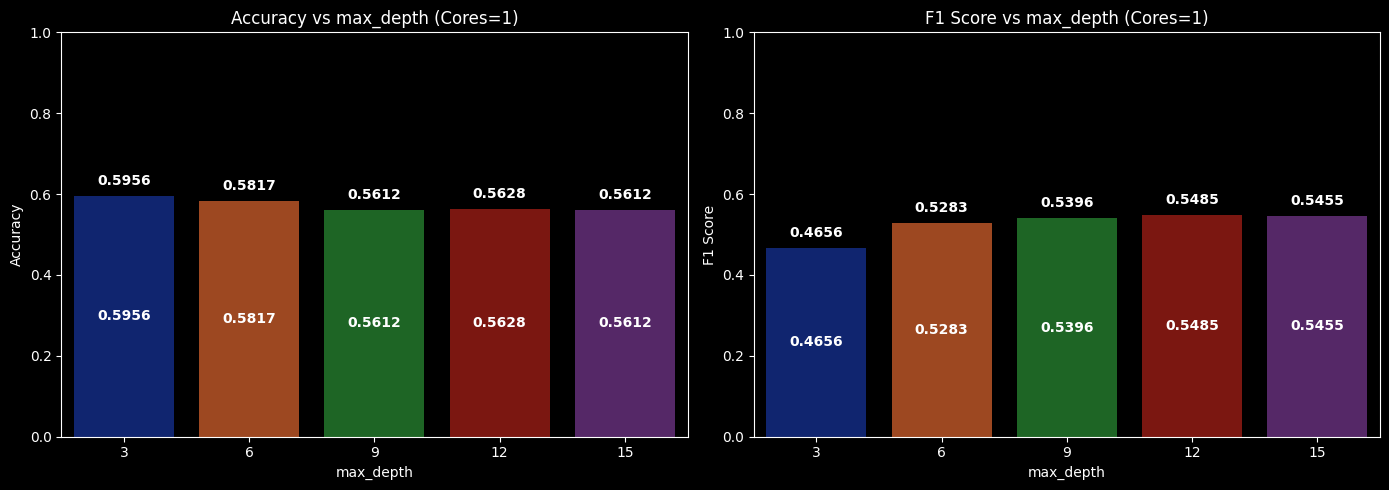

Plot saved as xgboost_results_plot_core_2.png


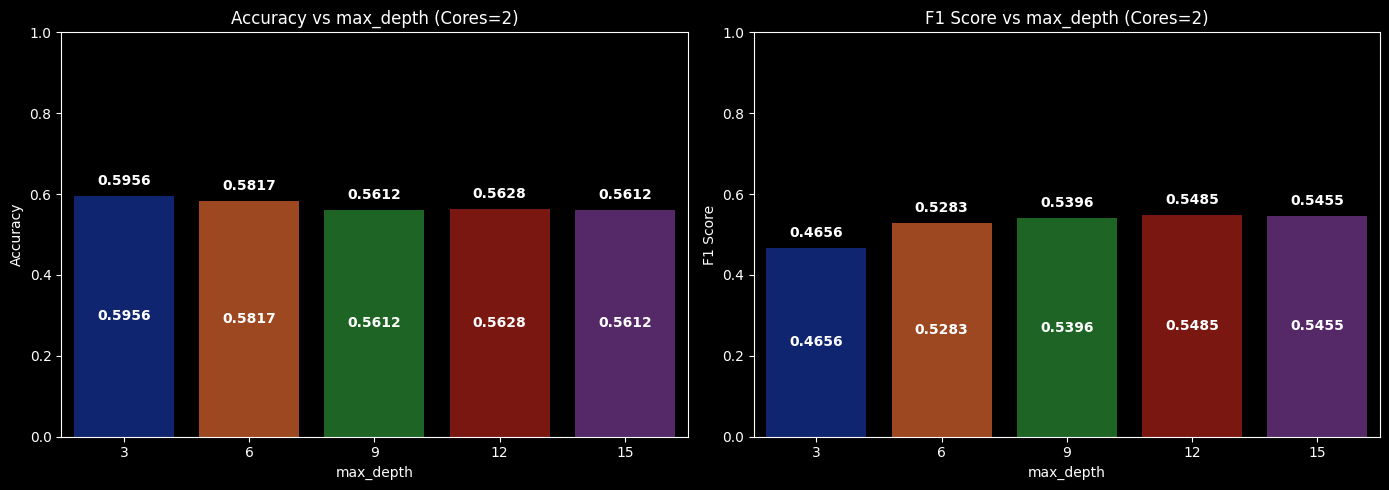

Plot saved as xgboost_results_plot_core_3.png


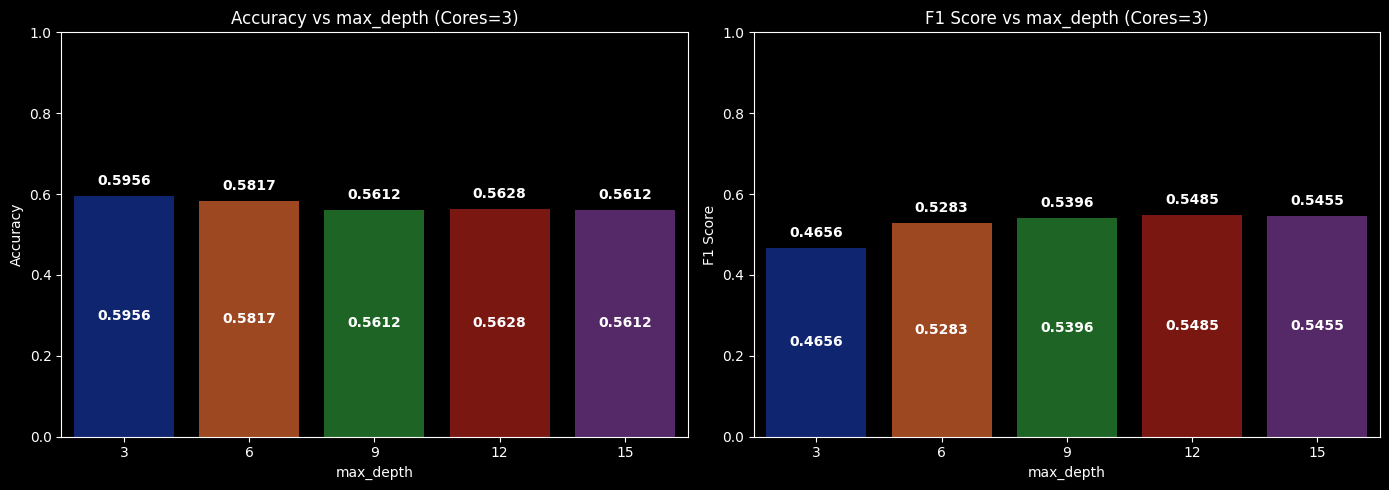

Plot saved as xgboost_results_plot_core_4.png


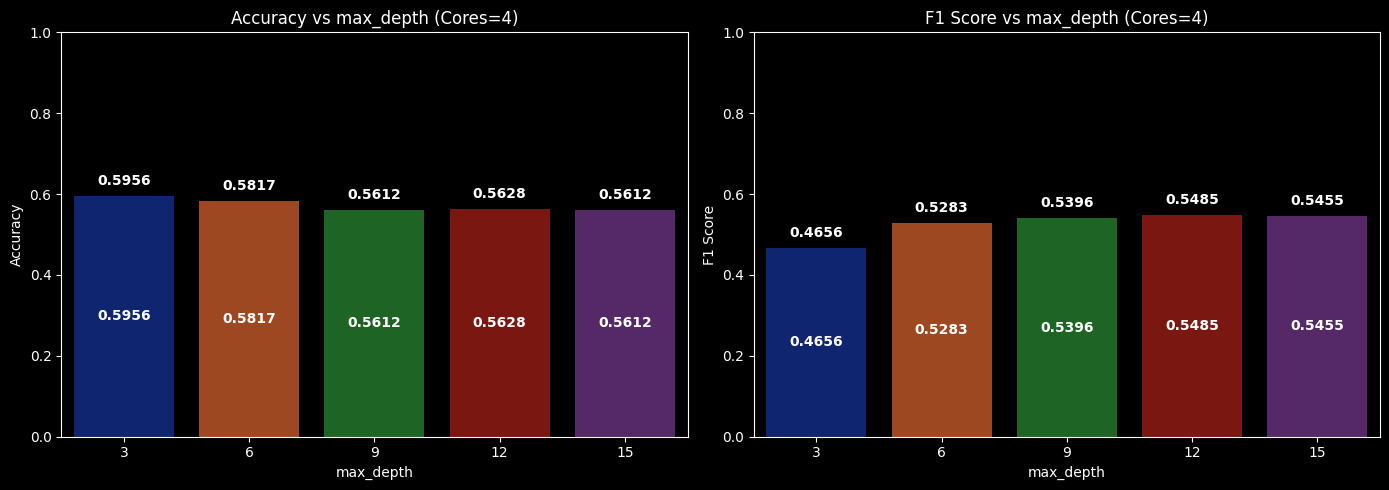

Plot saved as xgboost_results_plot_core_6.png


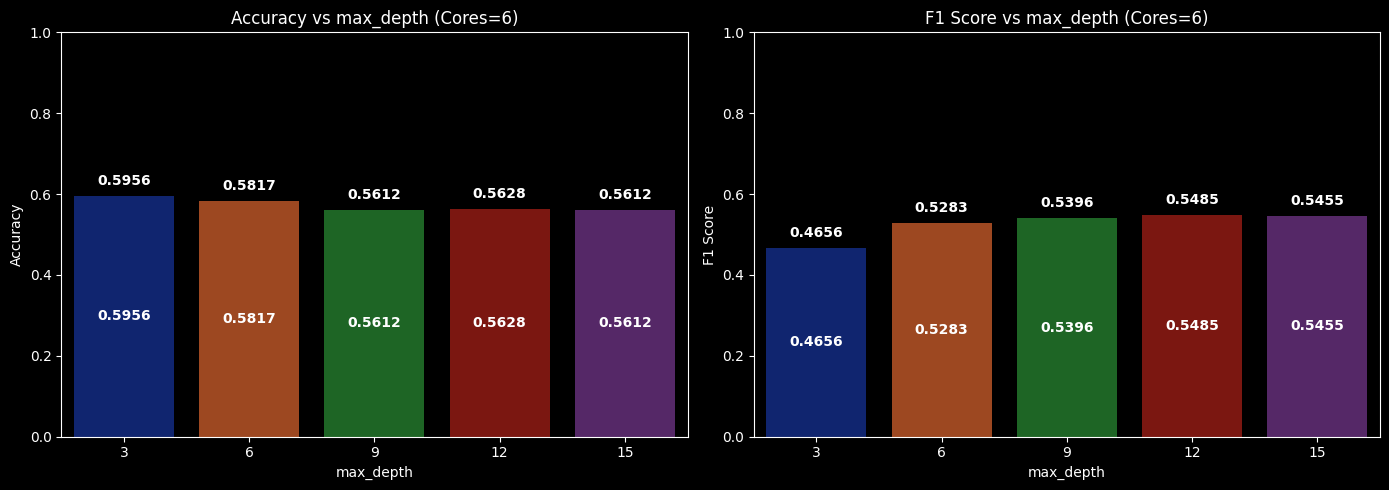

Plot saved as xgboost_results_plot_core_8.png


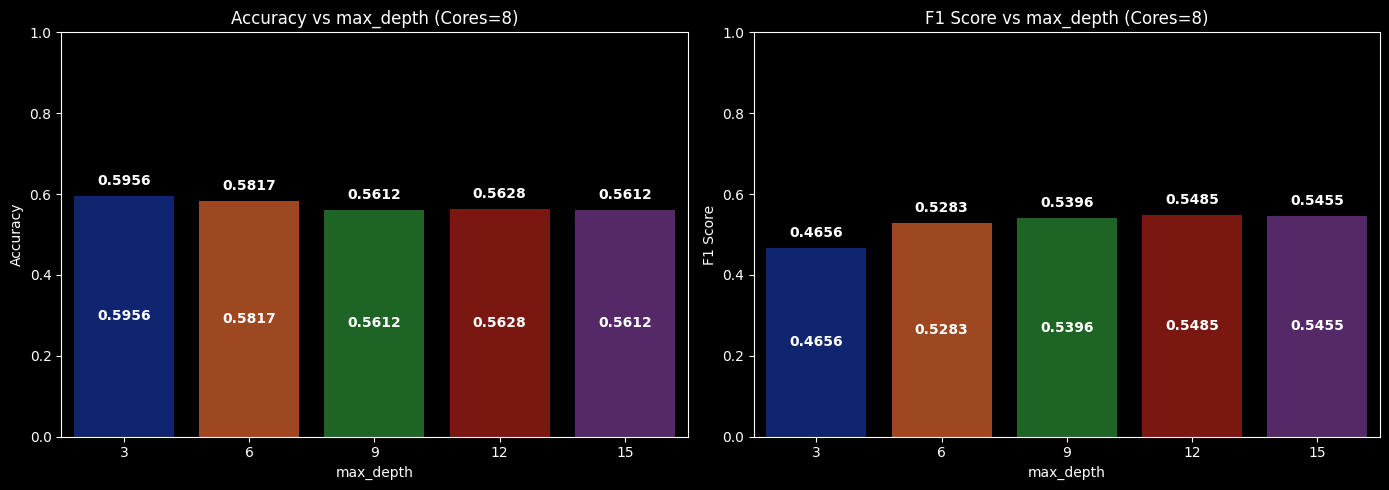

Plot saved as xgboost_training_time_vs_cores.png


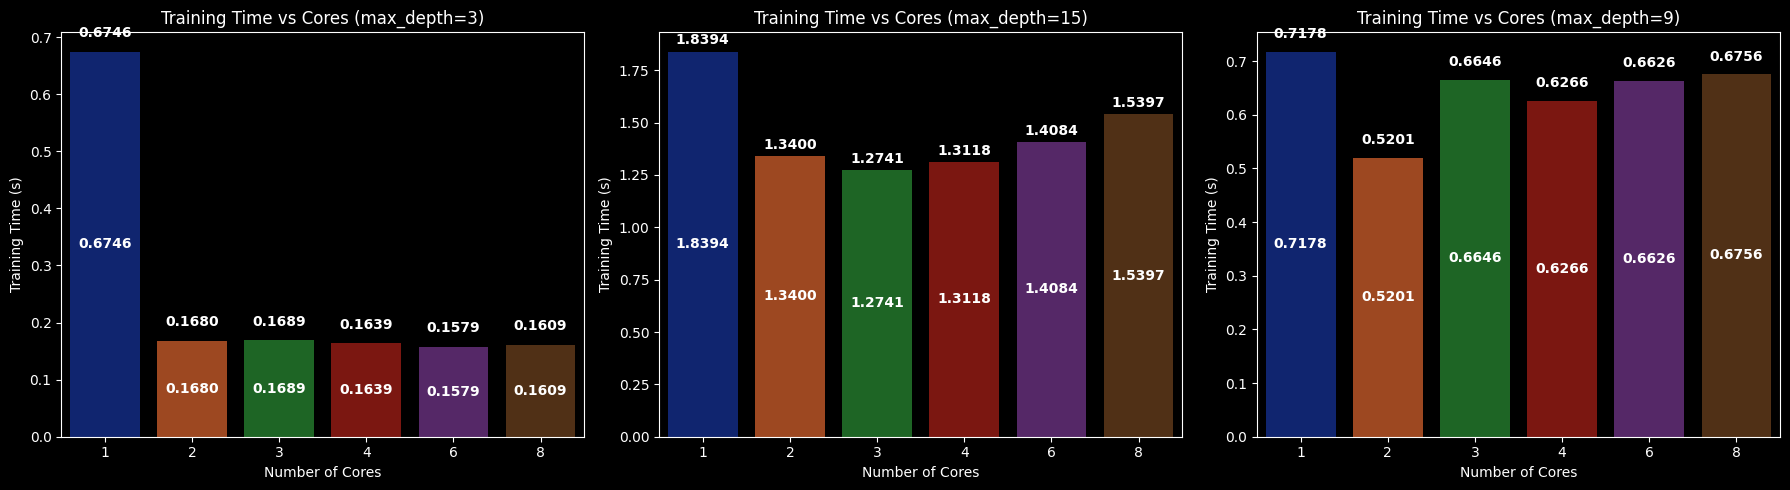

In [48]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

def plot_xgboost_results_by_core(results_xgboost):
    C_values = sorted(results_xgboost.keys())
    core_numbers = sorted(next(iter(results_xgboost.values())).keys())

    # Set dark style for the plots
    plt.style.use('dark_background')

    # Plot Accuracy and F1 Score vs max_depth for each core
    for core in core_numbers:
        accuracy = [results_xgboost[max_depth][core]['accuracy'] for max_depth in C_values]
        f1 = [results_xgboost[max_depth][core]['f1'] for max_depth in C_values]

        fig, axs = plt.subplots(1, 2, figsize=(14, 5))

        # Accuracy Plot with dark colors
        sns.barplot(x=C_values, y=accuracy, ax=axs[0], palette='dark')
        axs[0].set_title(f"Accuracy vs max_depth (Cores={core})")
        axs[0].set_xlabel("max_depth")
        axs[0].set_ylabel("Accuracy")
        axs[0].set_ylim(0, 1)
        for i, v in enumerate(accuracy):
            axs[0].text(i, v / 2, f"{v:.4f}", color='white', ha='center', va='center', fontweight='bold')  # inside bar
            axs[0].text(i, v + 0.02, f"{v:.4f}", color='white', ha='center', va='bottom', fontweight='bold')  # above bar

        # F1 Score Plot with dark colors
        sns.barplot(x=C_values, y=f1, ax=axs[1], palette='dark')
        axs[1].set_title(f"F1 Score vs max_depth (Cores={core})")
        axs[1].set_xlabel("max_depth")
        axs[1].set_ylabel("F1 Score")
        axs[1].set_ylim(0, 1)
        for i, v in enumerate(f1):
            axs[1].text(i, v / 2, f"{v:.4f}", color='white', ha='center', va='center', fontweight='bold')
            axs[1].text(i, v + 0.02, f"{v:.4f}", color='white', ha='center', va='bottom', fontweight='bold')

        plt.tight_layout()
        save_path = f"xgboost_results_plot_core_{core}.png"
        plt.savefig(save_path)
        print(f"Plot saved as {save_path}")
        plt.show()
        plt.close(fig)

    # Plot Training Time vs Cores (for selected max_depth values)
    C_values_to_plot = [C_values[0], C_values[-1], C_values[len(C_values)//2]]

    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    for i, max_depth in enumerate(C_values_to_plot):
        training_times = [results_xgboost[max_depth][core]['training_time'] for core in core_numbers]

        sns.barplot(x=core_numbers, y=training_times, ax=axs[i], palette='dark')
        axs[i].set_title(f"Training Time vs Cores (max_depth={max_depth})")
        axs[i].set_xlabel("Number of Cores")
        axs[i].set_ylabel("Training Time (s)")
        for j, v in enumerate(training_times):
            axs[i].text(j, v / 2, f"{v:.4f}", color='white', ha='center', va='center', fontweight='bold')
            axs[i].text(j, v + 0.02, f"{v:.4f}", color='white', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    save_path = "xgboost_training_time_vs_cores.png"
    plt.savefig(save_path)
    print(f"Plot saved as {save_path}")
    plt.show()
    plt.close()

# Use this to plot your XGBoost results
plot_xgboost_results_by_core(results_xgboost)


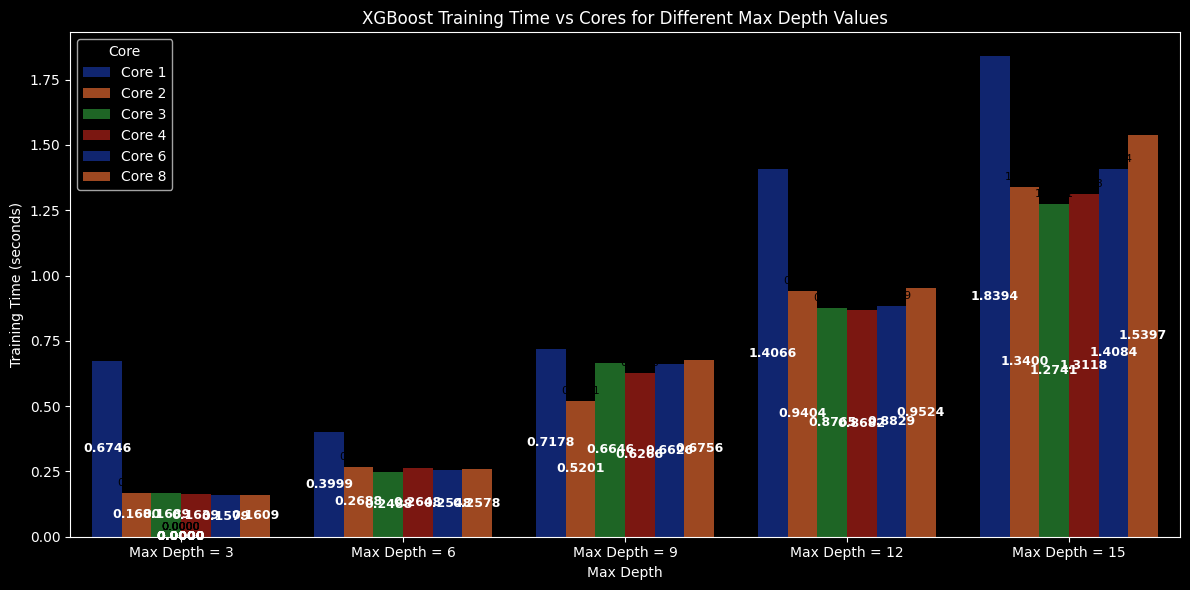

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_grouped_training_time_xgboost(results_xgboost):
    records = []
    for max_depth in sorted(results_xgboost.keys()):
        for core in sorted(results_xgboost[max_depth].keys()):
            records.append({
                'max_depth': f"Max Depth = {max_depth}",
                'core': f"Core {core}",
                'training_time': results_xgboost[max_depth][core]['training_time'],
                'core_id': core  # numeric for consistent hue ordering
            })

    df = pd.DataFrame(records)

    plt.figure(figsize=(12, 6))
    ax = sns.barplot(
        data=df,
        x='max_depth',
        y='training_time',
        hue='core',
        palette=sns.color_palette("dark", 4)
    )

    # Annotate each bar inside and above with exact 4 decimal value
    for bar in ax.patches:
        height = bar.get_height()
        xpos = bar.get_x() + bar.get_width() / 2
        value_text = f"{height:.4f}"
        # Inside bar (white)
        ax.text(xpos, height / 2, value_text, ha='center', va='center', color='white', fontsize=9, weight='bold')
        # Above bar (black)
        ax.text(xpos, height + (max(df['training_time']) * 0.01), value_text, ha='center', va='bottom', color='black', fontsize=8)

    plt.title("XGBoost Training Time vs Cores for Different Max Depth Values")
    plt.xlabel("Max Depth")
    plt.ylabel("Training Time (seconds)")
    plt.legend(title='Core')
    plt.tight_layout()
    plt.savefig("grouped_training_time_xgboost.png")
    plt.show()

# Call the function assuming `results_xgboost` holds the training times
plot_grouped_training_time_xgboost(results_xgboost)


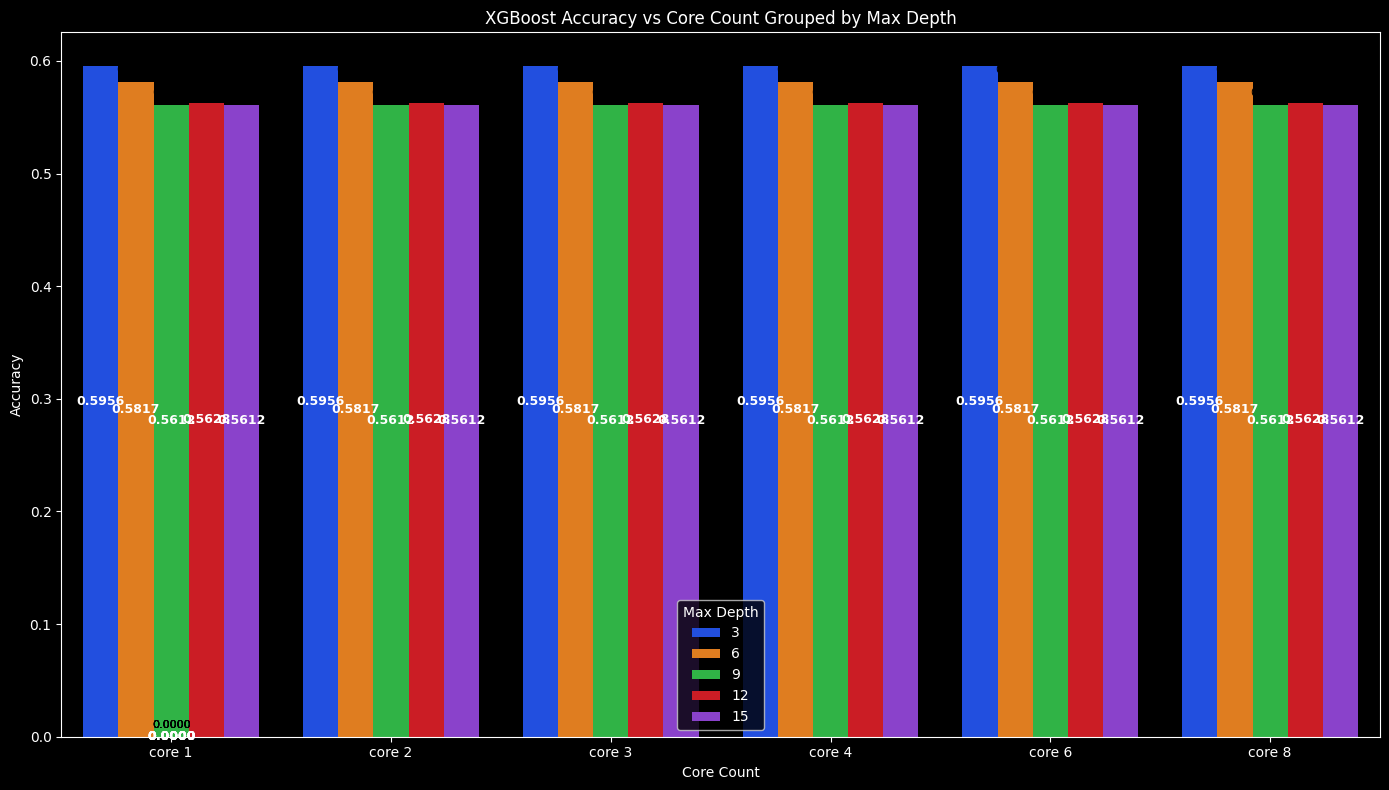

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_xgboost_accuracy_grouped(results_xgboost):
    records = []
    
    for max_depth in sorted(results_xgboost.keys()):
        for core in sorted(results_xgboost[max_depth].keys()):
            records.append({
                'core': f"core {core}",
                'max_depth': f"{max_depth}",
                'accuracy': results_xgboost[max_depth][core]['accuracy'],
                'core_id': core
            })

    df = pd.DataFrame(records)

    plt.figure(figsize=(14, 8))
    ax = sns.barplot(
        data=df,
        x='core',
        y='accuracy',
        hue='max_depth',
        palette=sns.color_palette("bright", len(df['max_depth'].unique()))
    )

    # Annotate bars with accuracy values
    for bar in ax.patches:
        height = bar.get_height()
        xpos = bar.get_x() + bar.get_width() / 2
        value_text = f"{height:.4f}"
        # Inside bar (white)
        ax.text(xpos, height / 2, value_text, ha='center', va='center', color='white', fontsize=9, weight='bold')
        # Above bar (black)
        ax.text(xpos, height + (max(df['accuracy']) * 0.01), value_text, ha='center', va='bottom', color='black', fontsize=8)

    plt.title("XGBoost Accuracy vs Core Count Grouped by Max Depth")
    plt.xlabel("Core Count")
    plt.ylabel("Accuracy")
    plt.legend(title='Max Depth')
    plt.tight_layout()
    plt.savefig("xgboost_accuracy_by_cores_grouped.png")
    plt.show()

# Call the function with your XGBoost results
plot_xgboost_accuracy_grouped(results_xgboost)


# Naive Bayes

In [53]:
import time
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

def naive_bayes_parallel_with_varying_cores(X_train, y_train, X_test, y_test, var_smoothing_list=[1e-9, 1e-8, 1e-7], core_numbers=[1, 2, 3, 4]):
    results = {}
    cm_dict = {}

    for var_smoothing in var_smoothing_list:
        print(f"Training Naive Bayes with var_smoothing={var_smoothing}...\n")
        results[var_smoothing] = {}
        cm_dict[var_smoothing] = {}

        for cores in core_numbers:
            print(f"⚙️ Training with n_jobs={cores} cores...")
            start_time = time.time()

            # Define and train the Naive Bayes model
            nb = GaussianNB(
                var_smoothing=var_smoothing,
            )
            nb.fit(X_train, y_train)

            # Predict
            y_pred = nb.predict(X_test)

            # Metrics
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            conf_matrix = confusion_matrix(y_test, y_pred)
            training_time = time.time() - start_time

            print(f"✅ Training completed with var_smoothing={var_smoothing}, {cores} cores.")
            print(f"Accuracy: {accuracy:.4f}")
            print(f"F1 Score: {f1:.4f}")
            print(f"Training Time: {training_time:.2f} seconds")
            print(f"Confusion Matrix:\n{conf_matrix}")

            results[var_smoothing][cores] = {
                'accuracy': accuracy,
                'f1': f1,
                'training_time': training_time
            }
            cm_dict[var_smoothing][cores] = conf_matrix

    return results, cm_dict

# Example usage
results_nb, cm_dict_nb = naive_bayes_parallel_with_varying_cores(
    X_train, y_train, X_test, y_test,
    var_smoothing_list=[1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
    core_numbers=[1, 2, 3, 4, 6, 8]
)

print("\nAll Naive Bayes Results:")
print(results_nb)


Training Naive Bayes with var_smoothing=1e-09...

⚙️ Training with n_jobs=1 cores...
✅ Training completed with var_smoothing=1e-09, 1 cores.
Accuracy: 0.6002
F1 Score: 0.4562
Training Time: 0.02 seconds
Confusion Matrix:
[[4897   30]
 [3248   25]]
⚙️ Training with n_jobs=2 cores...
✅ Training completed with var_smoothing=1e-09, 2 cores.
Accuracy: 0.6002
F1 Score: 0.4562
Training Time: 0.02 seconds
Confusion Matrix:
[[4897   30]
 [3248   25]]
⚙️ Training with n_jobs=3 cores...
✅ Training completed with var_smoothing=1e-09, 3 cores.
Accuracy: 0.6002
F1 Score: 0.4562
Training Time: 0.05 seconds
Confusion Matrix:
[[4897   30]
 [3248   25]]
⚙️ Training with n_jobs=4 cores...
✅ Training completed with var_smoothing=1e-09, 4 cores.
Accuracy: 0.6002
F1 Score: 0.4562
Training Time: 0.03 seconds
Confusion Matrix:
[[4897   30]
 [3248   25]]
⚙️ Training with n_jobs=6 cores...
✅ Training completed with var_smoothing=1e-09, 6 cores.
Accuracy: 0.6002
F1 Score: 0.4562
Training Time: 0.02 seconds
Confu

In [55]:
results_nb

{1e-09: {1: {'accuracy': 0.6002439024390244,
   'f1': 0.45617738451678225,
   'training_time': 0.019987821578979492},
  2: {'accuracy': 0.6002439024390244,
   'f1': 0.45617738451678225,
   'training_time': 0.022985458374023438},
  3: {'accuracy': 0.6002439024390244,
   'f1': 0.45617738451678225,
   'training_time': 0.051969289779663086},
  4: {'accuracy': 0.6002439024390244,
   'f1': 0.45617738451678225,
   'training_time': 0.026981830596923828},
  6: {'accuracy': 0.6002439024390244,
   'f1': 0.45617738451678225,
   'training_time': 0.02198624610900879},
  8: {'accuracy': 0.6002439024390244,
   'f1': 0.45617738451678225,
   'training_time': 0.020987272262573242}},
 1e-08: {1: {'accuracy': 0.6002439024390244,
   'f1': 0.45617738451678225,
   'training_time': 0.01898789405822754},
  2: {'accuracy': 0.6002439024390244,
   'f1': 0.45617738451678225,
   'training_time': 0.01898813247680664},
  3: {'accuracy': 0.6002439024390244,
   'f1': 0.45617738451678225,
   'training_time': 0.0199885368

Plot saved as naive_bayes_results_plot_core_1.png


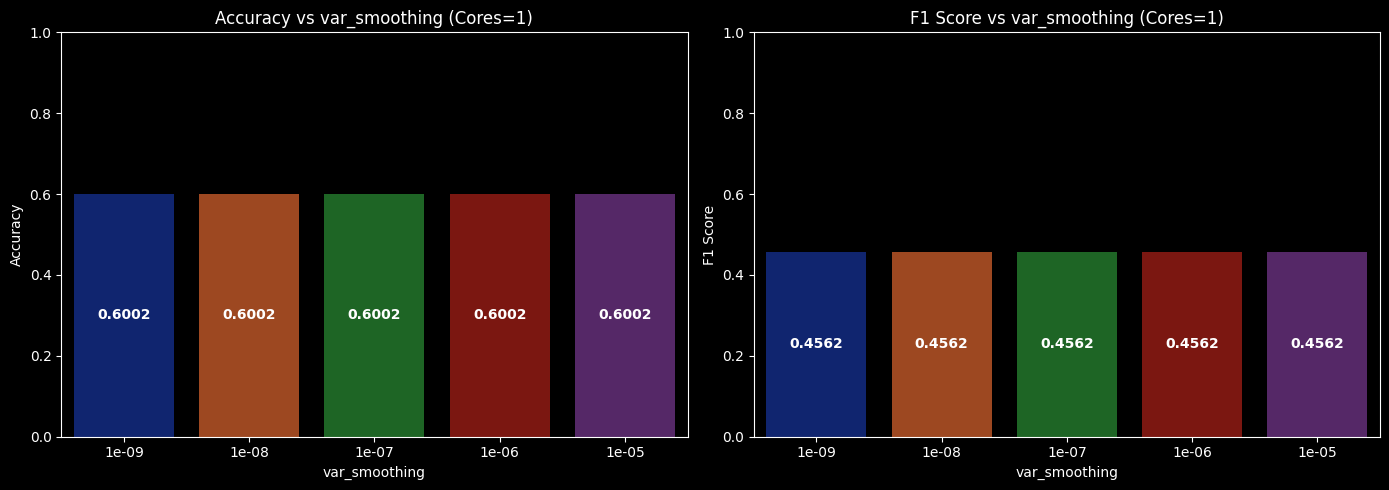

Plot saved as naive_bayes_results_plot_core_2.png


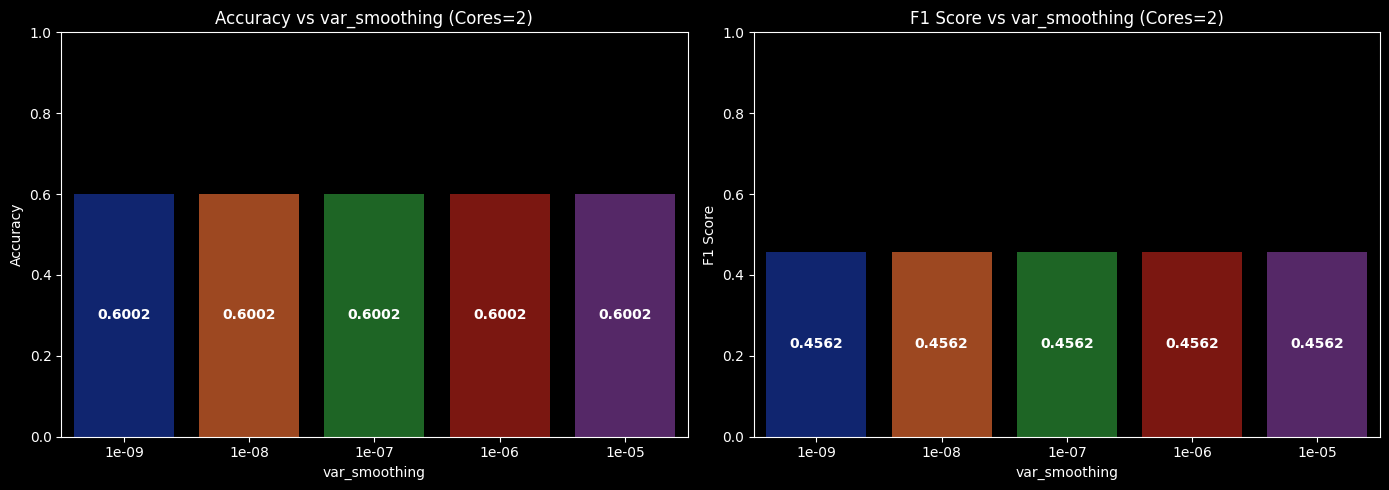

Plot saved as naive_bayes_results_plot_core_3.png


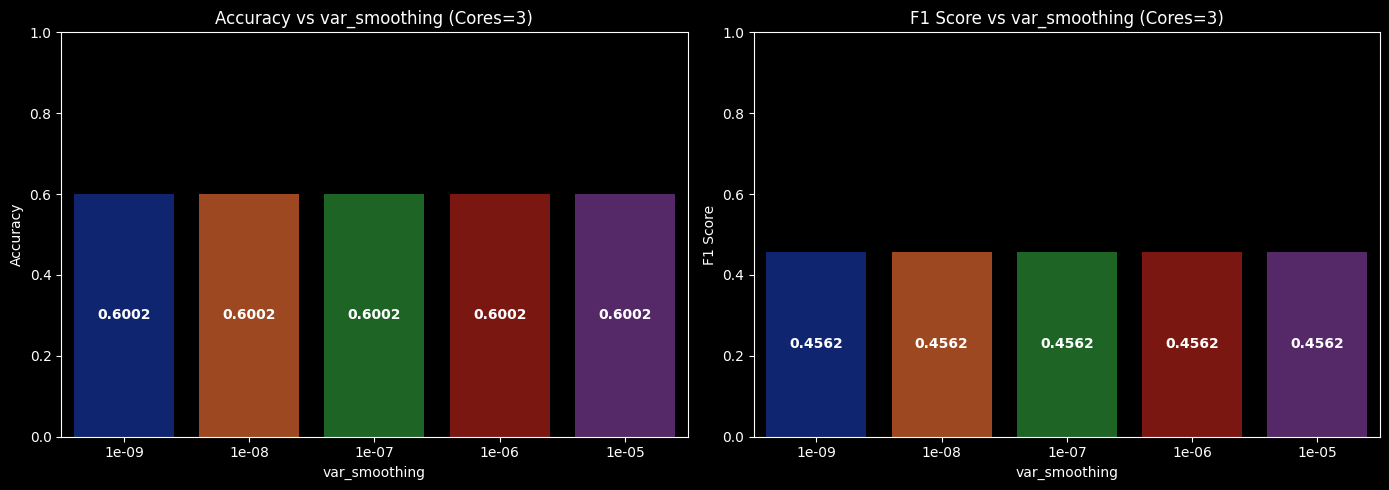

Plot saved as naive_bayes_results_plot_core_4.png


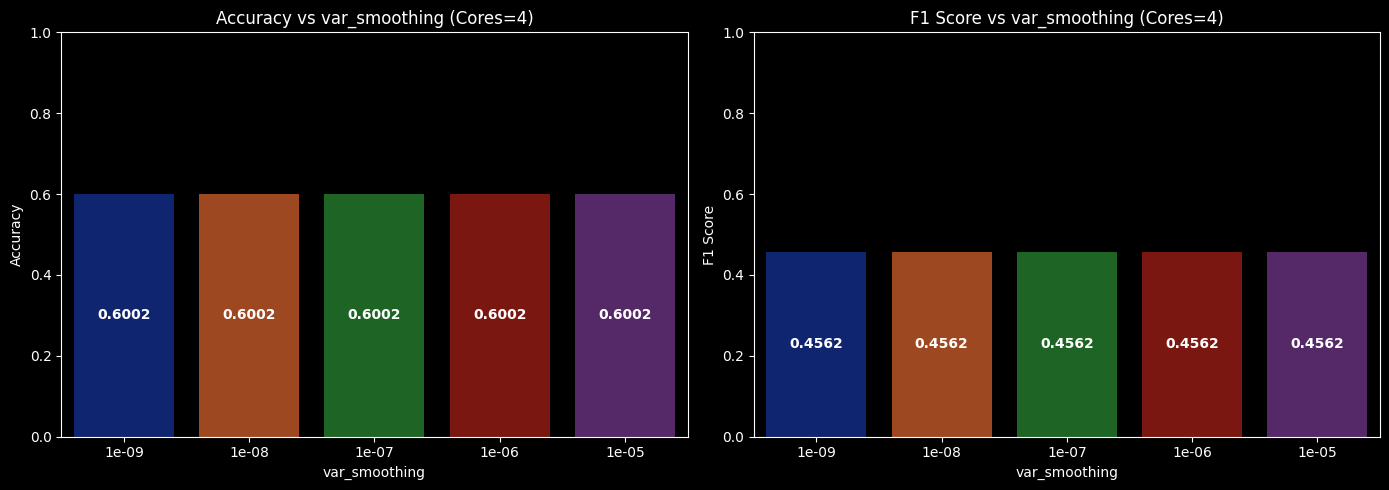

Plot saved as naive_bayes_results_plot_core_6.png


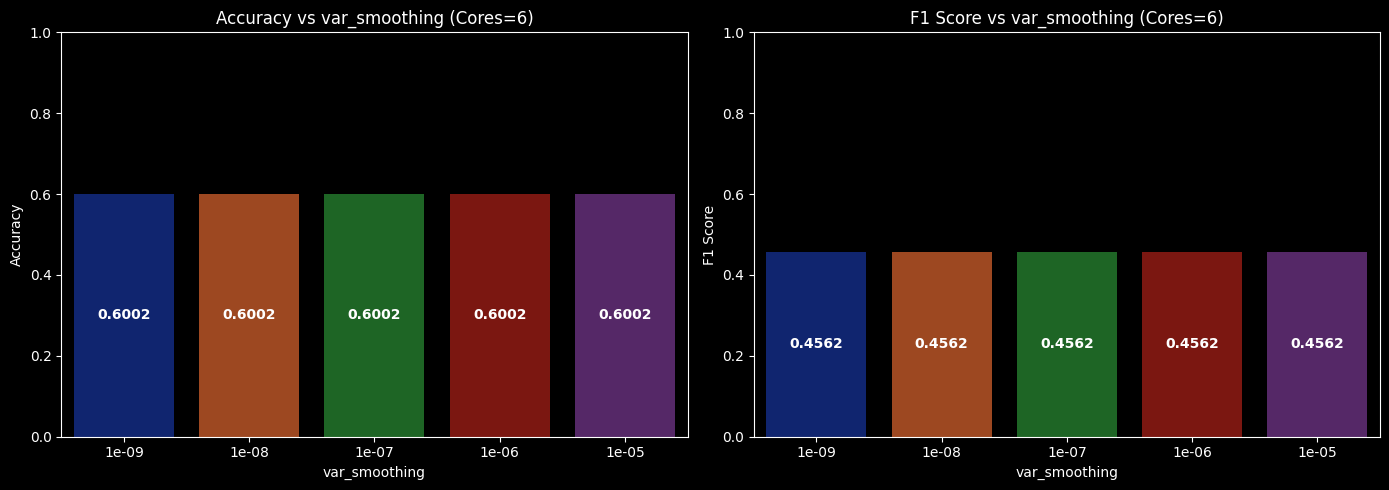

Plot saved as naive_bayes_results_plot_core_8.png


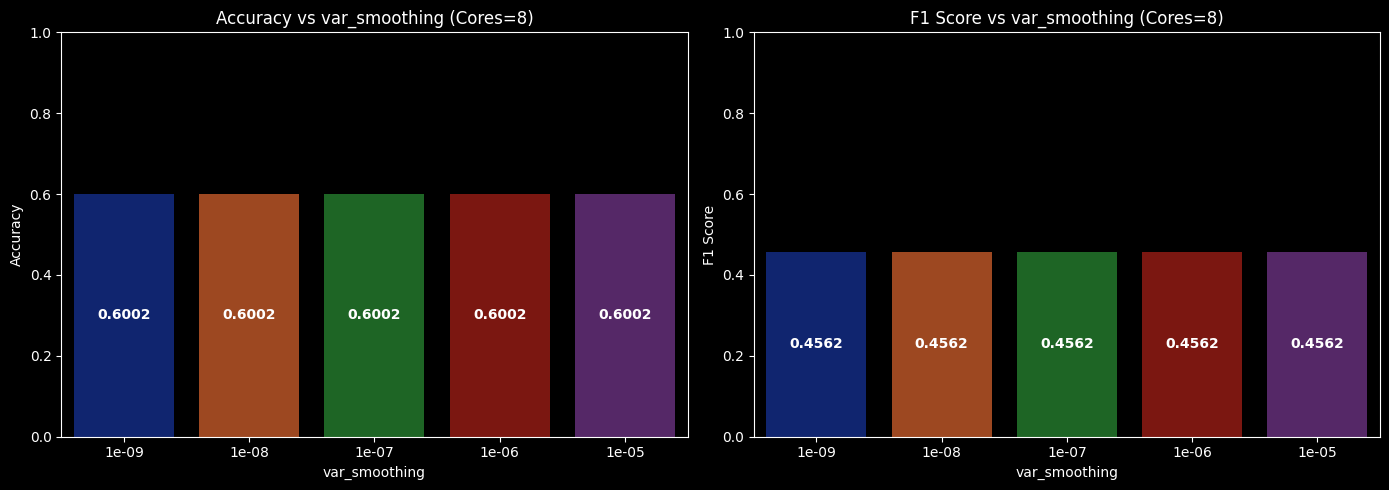

Plot saved as naive_bayes_training_time_vs_cores.png


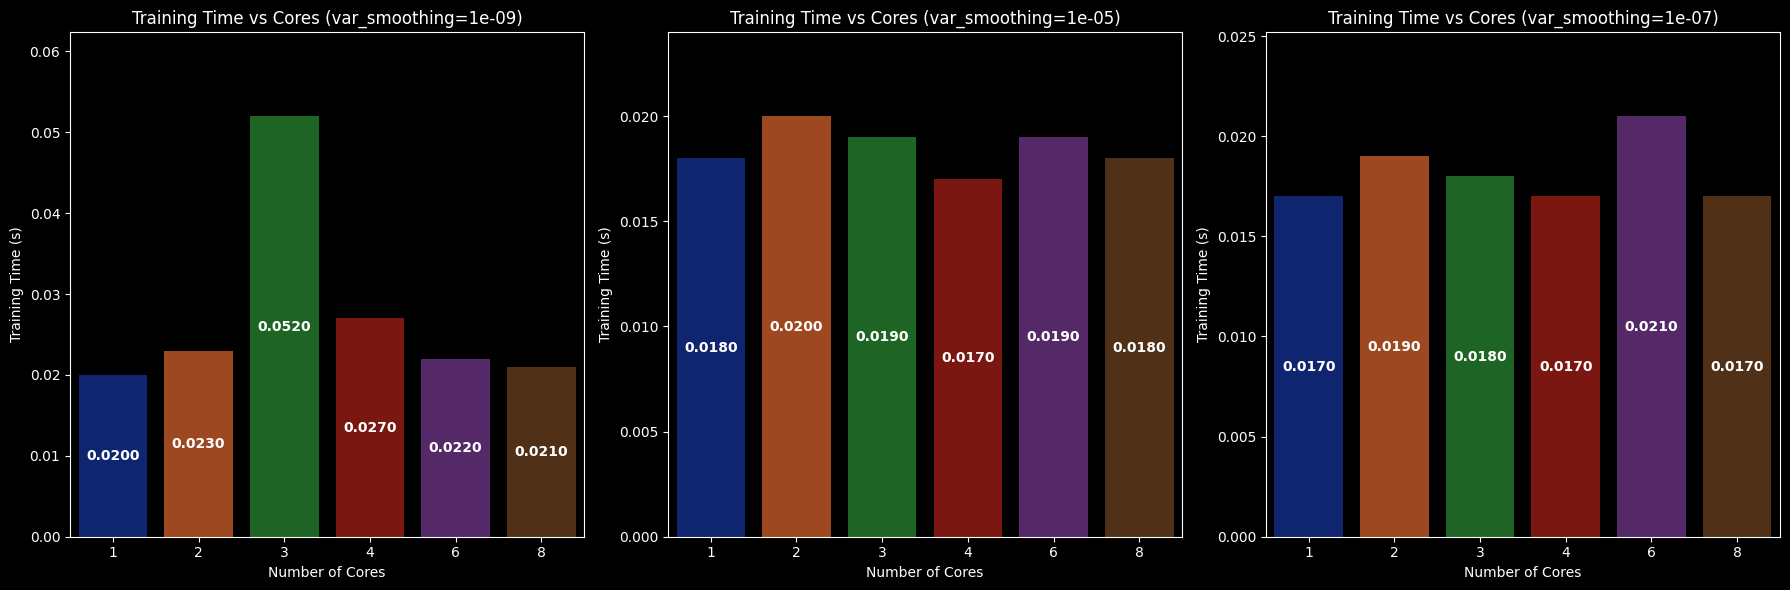

In [56]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

def plot_naive_bayes_results_by_core(results_nb):
    var_smoothing_values = sorted(results_nb.keys())
    core_numbers = sorted(next(iter(results_nb.values())).keys())

    # Set dark style for the plots
    plt.style.use('dark_background')

    # Plot Accuracy and F1 Score vs var_smoothing for each core
    for core in core_numbers:
        accuracy = [results_nb[var_smoothing][core]['accuracy'] for var_smoothing in var_smoothing_values]
        f1 = [results_nb[var_smoothing][core]['f1'] for var_smoothing in var_smoothing_values]

        fig, axs = plt.subplots(1, 2, figsize=(14, 5))

        # Accuracy Plot with dark colors
        sns.barplot(x=var_smoothing_values, y=accuracy, ax=axs[0], palette='dark')
        axs[0].set_title(f"Accuracy vs var_smoothing (Cores={core})")
        axs[0].set_xlabel("var_smoothing")
        axs[0].set_ylabel("Accuracy")
        axs[0].set_ylim(0, 1)
        for i, v in enumerate(accuracy):
            axs[0].text(i, v / 2, f"{v:.4f}", color='white', ha='center', va='center', fontweight='bold')  # placed in the middle of bar

        # F1 Score Plot with dark colors
        sns.barplot(x=var_smoothing_values, y=f1, ax=axs[1], palette='dark')
        axs[1].set_title(f"F1 Score vs var_smoothing (Cores={core})")
        axs[1].set_xlabel("var_smoothing")
        axs[1].set_ylabel("F1 Score")
        axs[1].set_ylim(0, 1)
        for i, v in enumerate(f1):
            axs[1].text(i, v / 2, f"{v:.4f}", color='white', ha='center', va='center', fontweight='bold')  # placed in the middle of bar

        plt.tight_layout()
        save_path = f"naive_bayes_results_plot_core_{core}.png"
        plt.savefig(save_path)
        print(f"Plot saved as {save_path}")
        plt.show()
        plt.close(fig)

    # Plot Training Time vs Cores (for selected var_smoothing values)
    var_smoothing_values_to_plot = [var_smoothing_values[0], var_smoothing_values[-1], var_smoothing_values[len(var_smoothing_values)//2]]

    # Increase the height of the training time plots by adjusting figsize
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    for i, var_smoothing in enumerate(var_smoothing_values_to_plot):
        training_times = [results_nb[var_smoothing][core]['training_time'] for core in core_numbers]

        sns.barplot(x=core_numbers, y=training_times, ax=axs[i], palette='dark')
        axs[i].set_title(f"Training Time vs Cores (var_smoothing={var_smoothing})")
        axs[i].set_xlabel("Number of Cores")
        axs[i].set_ylabel("Training Time (s)")

        # Increase the y-axis limit for training time to make space for labels
        axs[i].set_ylim(0, max(training_times) * 1.2)  # Add 20% extra space

        # Annotate bars with training time values and place the text in the middle of the bars
        for j, v in enumerate(training_times):
            axs[i].text(j, v / 2, f"{v:.4f}", color='white', ha='center', va='center', fontweight='bold')  # placed in the middle of bar

    plt.tight_layout()
    save_path = "naive_bayes_training_time_vs_cores.png"
    plt.savefig(save_path)
    print(f"Plot saved as {save_path}")
    plt.show()
    plt.close()

# Use this to plot your Naive Bayes results
plot_naive_bayes_results_by_core(results_nb)


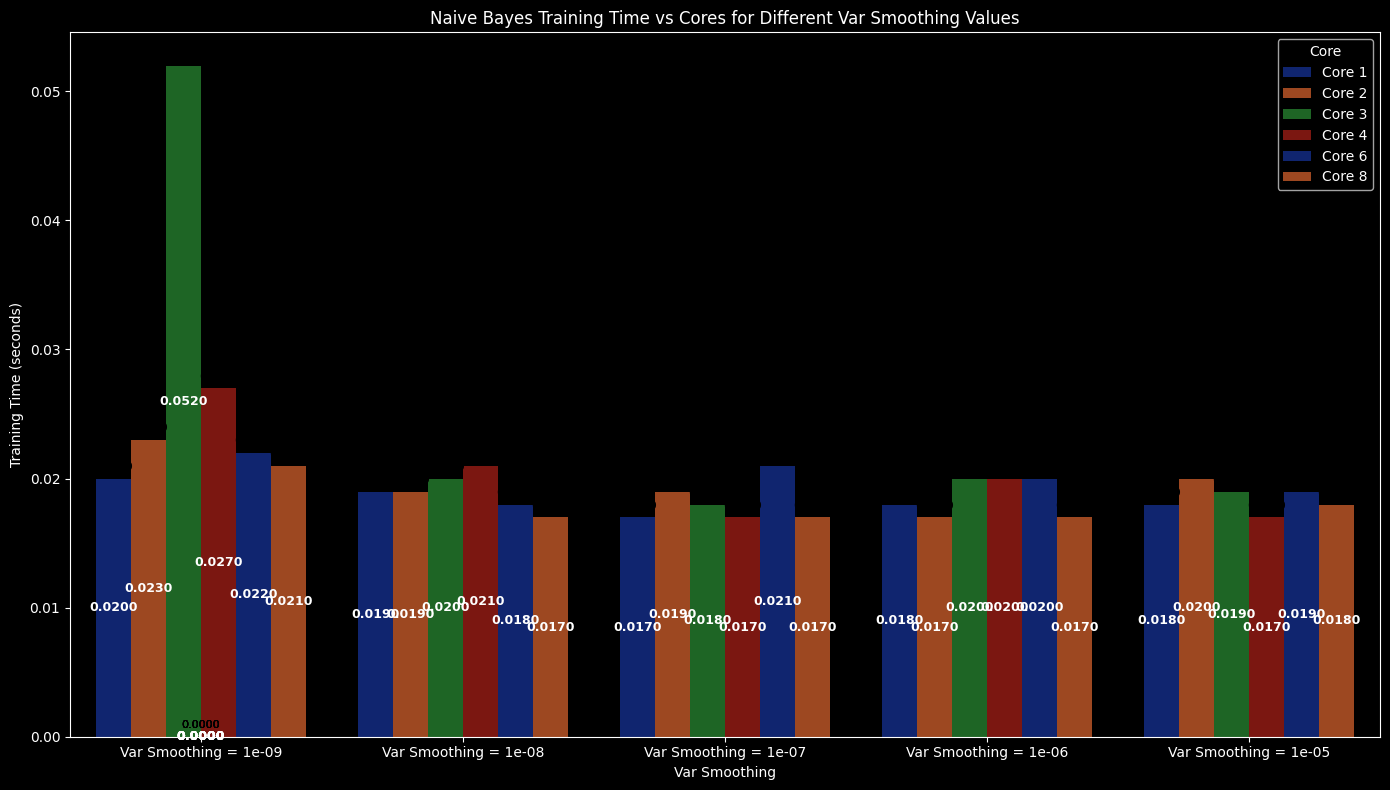

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_grouped_training_time_naive_bayes(results_nb):
    records = []
    for var_smoothing in sorted(results_nb.keys()):
        for core in sorted(results_nb[var_smoothing].keys()):
            records.append({
                'var_smoothing': f"Var Smoothing = {var_smoothing}",
                'core': f"Core {core}",
                'training_time': results_nb[var_smoothing][core]['training_time'],
                'core_id': core  # numeric for consistent hue ordering
            })

    df = pd.DataFrame(records)

    plt.figure(figsize=(14, 8))
    ax = sns.barplot(
        data=df,
        x='var_smoothing',
        y='training_time',
        hue='core',
        palette=sns.color_palette("dark", 4)
    )

    # Annotate each bar inside and above with exact 4 decimal value
    for bar in ax.patches:
        height = bar.get_height()
        xpos = bar.get_x() + bar.get_width() / 2
        value_text = f"{height:.4f}"
        # Inside bar (white)
        ax.text(xpos, height / 2, value_text, ha='center', va='center', color='white', fontsize=9, weight='bold')
        # Above bar (black)
        ax.text(xpos, height + (max(df['training_time']) * 0.01), value_text, ha='center', va='bottom', color='black', fontsize=8)

    plt.title("Naive Bayes Training Time vs Cores for Different Var Smoothing Values")
    plt.xlabel("Var Smoothing")
    plt.ylabel("Training Time (seconds)")
    plt.legend(title='Core')
    plt.tight_layout()
    plt.savefig("grouped_training_time_naive_bayes.png")
    plt.show()

# Call the function assuming `results_nb` holds the training times for Naive Bayes
plot_grouped_training_time_naive_bayes(results_nb)


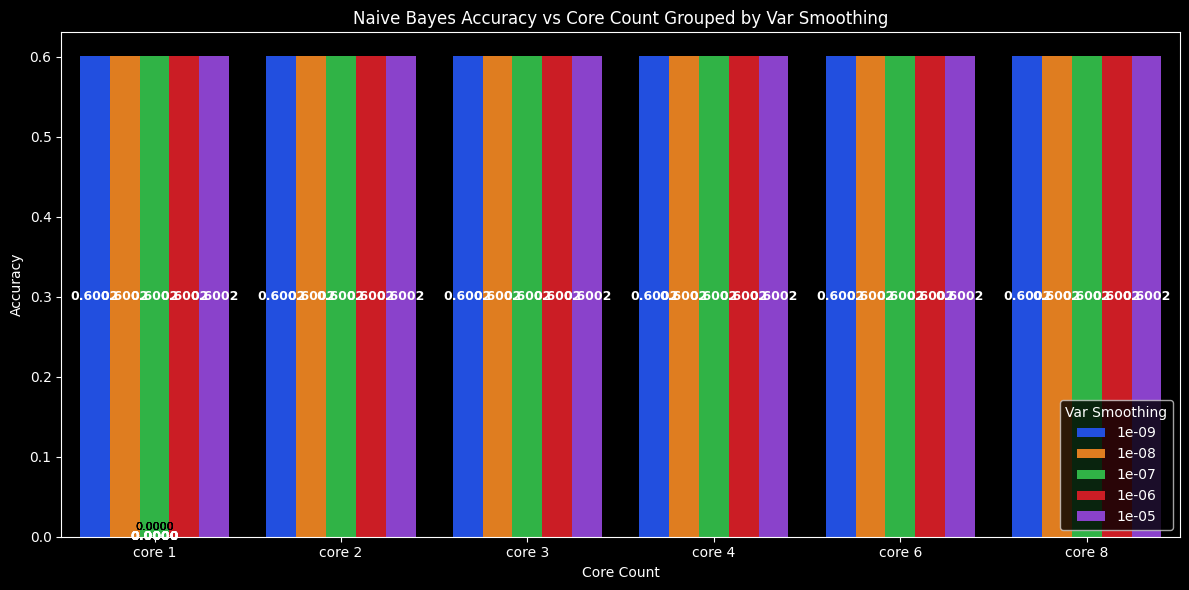

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_naive_bayes_accuracy_grouped(results_nb):
    records = []
    
    for var_smoothing in sorted(results_nb.keys()):
        for core in sorted(results_nb[var_smoothing].keys()):
            records.append({
                'core': f"core {core}",
                'var_smoothing': f"{var_smoothing}",
                'accuracy': results_nb[var_smoothing][core]['accuracy'],
                'core_id': core
            })

    df = pd.DataFrame(records)

    plt.figure(figsize=(12, 6))
    ax = sns.barplot(
        data=df,
        x='core',
        y='accuracy',
        hue='var_smoothing',
        palette=sns.color_palette("bright", len(df['var_smoothing'].unique()))
    )

    # Annotate bars with accuracy values
    for bar in ax.patches:
        height = bar.get_height()
        xpos = bar.get_x() + bar.get_width() / 2
        value_text = f"{height:.4f}"
        # Inside bar (white)
        ax.text(xpos, height / 2, value_text, ha='center', va='center', color='white', fontsize=9, weight='bold')
        # Above bar (black)
        ax.text(xpos, height + (max(df['accuracy']) * 0.01), value_text, ha='center', va='bottom', color='black', fontsize=8)

    plt.title("Naive Bayes Accuracy vs Core Count Grouped by Var Smoothing")
    plt.xlabel("Core Count")
    plt.ylabel("Accuracy")
    plt.legend(title='Var Smoothing')
    plt.tight_layout()
    plt.savefig("naive_bayes_accuracy_by_cores_grouped.png")
    plt.show()

# Call the function with your Naive Bayes results
plot_naive_bayes_accuracy_grouped(results_nb)


# Knn

In [60]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

def knn_parallel_with_varying_cores(X_train, y_train, X_test, y_test, k_list=[7, 11, 15], core_numbers=[1, 2, 3, 4]):
    results = {}
    cm_dict = {}

    for k in k_list:
        print(f"Training KNN with k={k}...\n")
        results[k] = {}
        cm_dict[k] = {}

        for cores in core_numbers:
            print(f"⚙️ Training with n_jobs={cores} cores...")
            start_time = time.time()

            # Define and train the KNN model
            knn = KNeighborsClassifier(n_neighbors=k, n_jobs=cores)
            knn.fit(X_train, y_train)

            # Predict
            y_pred = knn.predict(X_test)

            # Metrics
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            conf_matrix = confusion_matrix(y_test, y_pred)
            training_time = time.time() - start_time

            print(f"✅ Training completed with k={k}, {cores} cores.")
            print(f"Accuracy: {accuracy:.4f}")
            print(f"F1 Score: {f1:.4f}")
            print(f"Training Time: {training_time:.2f} seconds")
            print(f"Confusion Matrix:\n{conf_matrix}")

            results[k][cores] = {
                'accuracy': accuracy,
                'f1': f1,
                'training_time': training_time
            }
            cm_dict[k][cores] = conf_matrix

    return results, cm_dict

# Example usage
results_knn, cm_dict_knn = knn_parallel_with_varying_cores(
    X_train, y_train, X_test, y_test,
    k_list=[5, 7, 9, 11, 13, 15],
    core_numbers=[1, 2, 3, 4, 6, 8]
)


print("\nAll KNN Results:")
print(results_knn)


Training KNN with k=5...

⚙️ Training with n_jobs=1 cores...
✅ Training completed with k=5, 1 cores.
Accuracy: 0.5515
F1 Score: 0.5394
Training Time: 1.29 seconds
Confusion Matrix:
[[3440 1487]
 [2191 1082]]
⚙️ Training with n_jobs=2 cores...
✅ Training completed with k=5, 2 cores.
Accuracy: 0.5515
F1 Score: 0.5394
Training Time: 1.00 seconds
Confusion Matrix:
[[3440 1487]
 [2191 1082]]
⚙️ Training with n_jobs=3 cores...
✅ Training completed with k=5, 3 cores.
Accuracy: 0.5515
F1 Score: 0.5394
Training Time: 0.93 seconds
Confusion Matrix:
[[3440 1487]
 [2191 1082]]
⚙️ Training with n_jobs=4 cores...
✅ Training completed with k=5, 4 cores.
Accuracy: 0.5515
F1 Score: 0.5394
Training Time: 0.91 seconds
Confusion Matrix:
[[3440 1487]
 [2191 1082]]
⚙️ Training with n_jobs=6 cores...
✅ Training completed with k=5, 6 cores.
Accuracy: 0.5515
F1 Score: 0.5394
Training Time: 0.91 seconds
Confusion Matrix:
[[3440 1487]
 [2191 1082]]
⚙️ Training with n_jobs=8 cores...
✅ Training completed with k=5

Plot saved as knn_results_plot_core_1.png


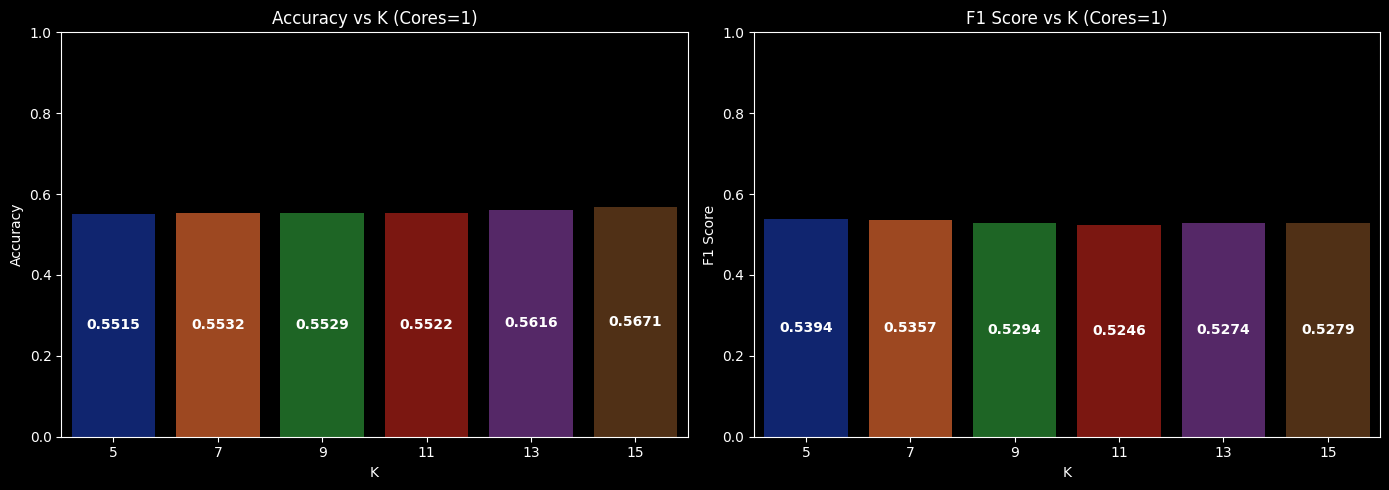

Plot saved as knn_results_plot_core_2.png


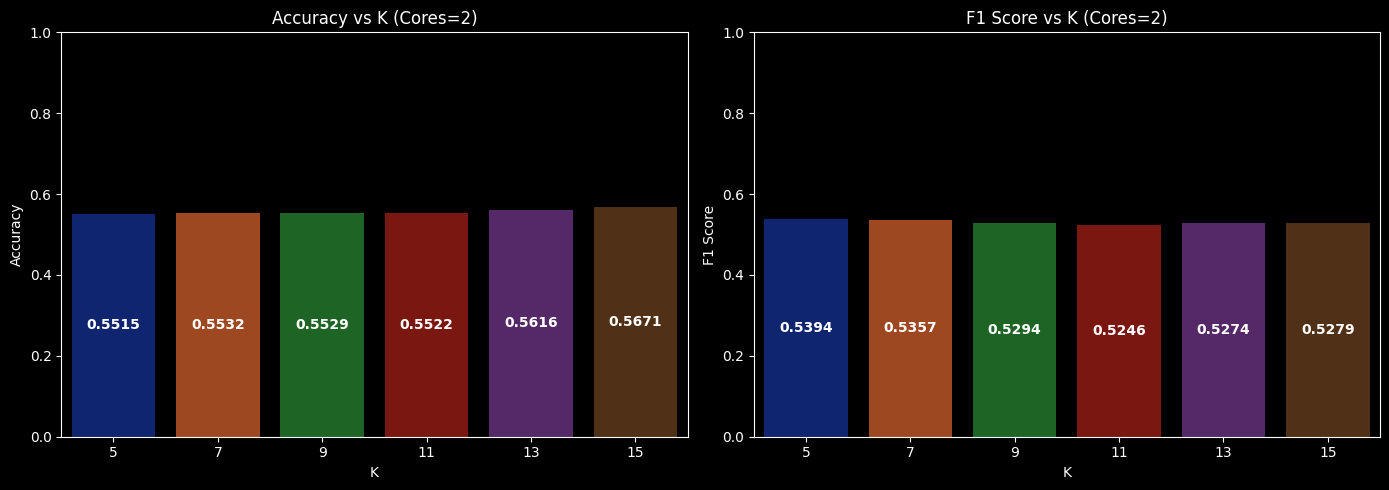

Plot saved as knn_results_plot_core_3.png


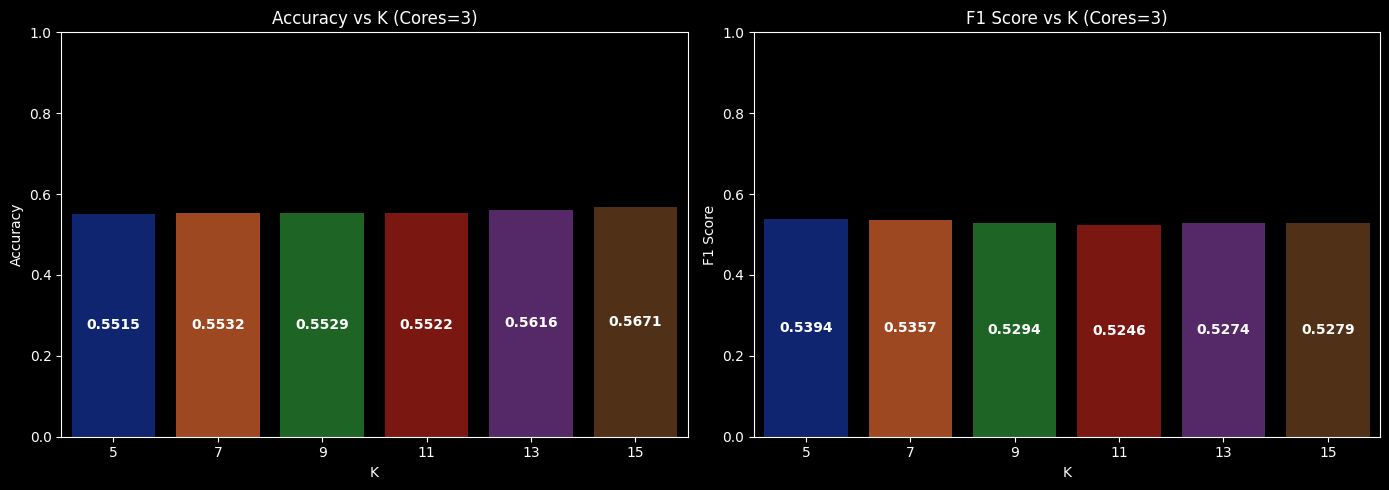

Plot saved as knn_results_plot_core_4.png


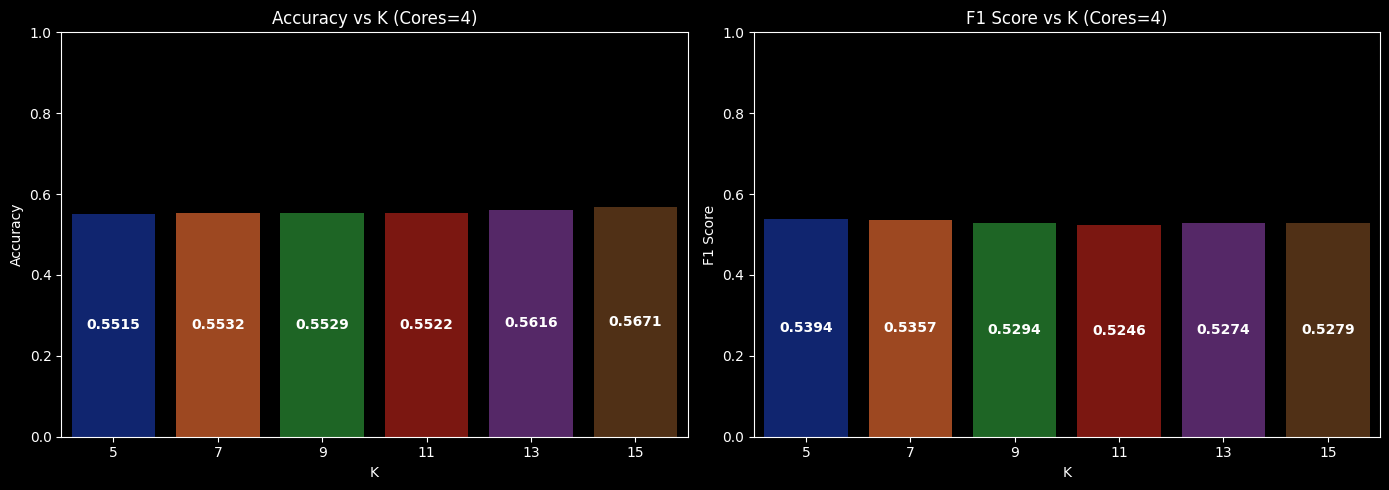

Plot saved as knn_results_plot_core_6.png


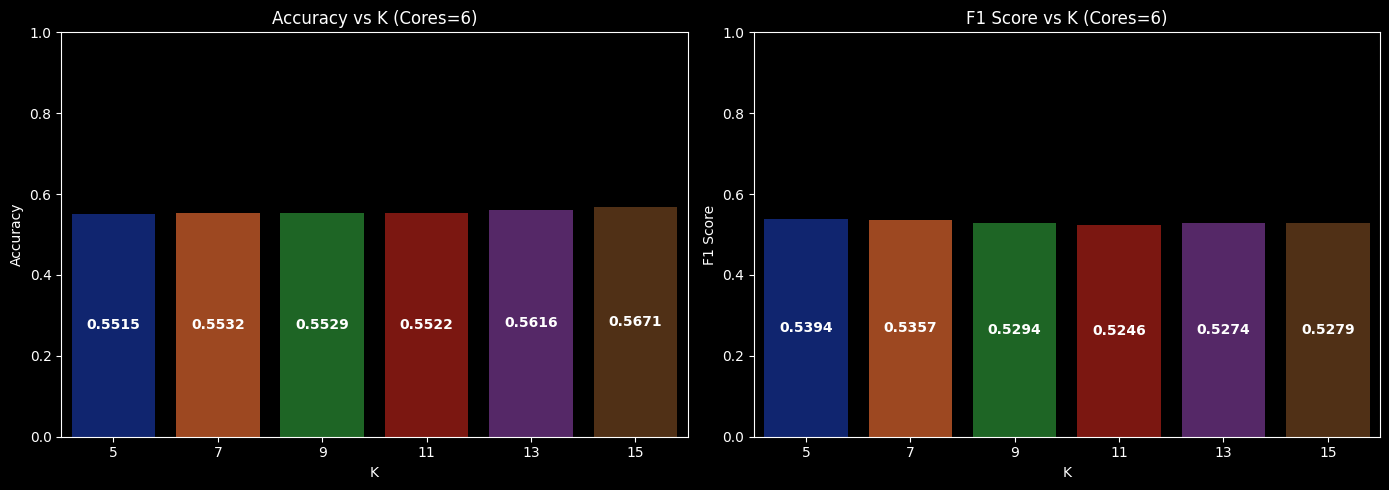

Plot saved as knn_results_plot_core_8.png


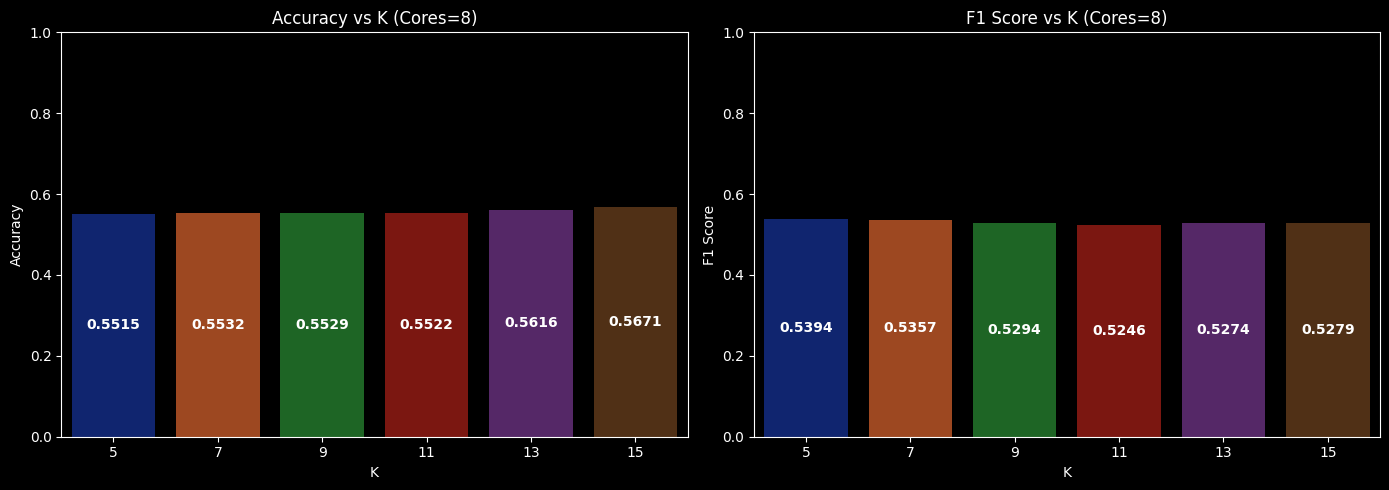

Plot saved as knn_training_time_vs_cores.png


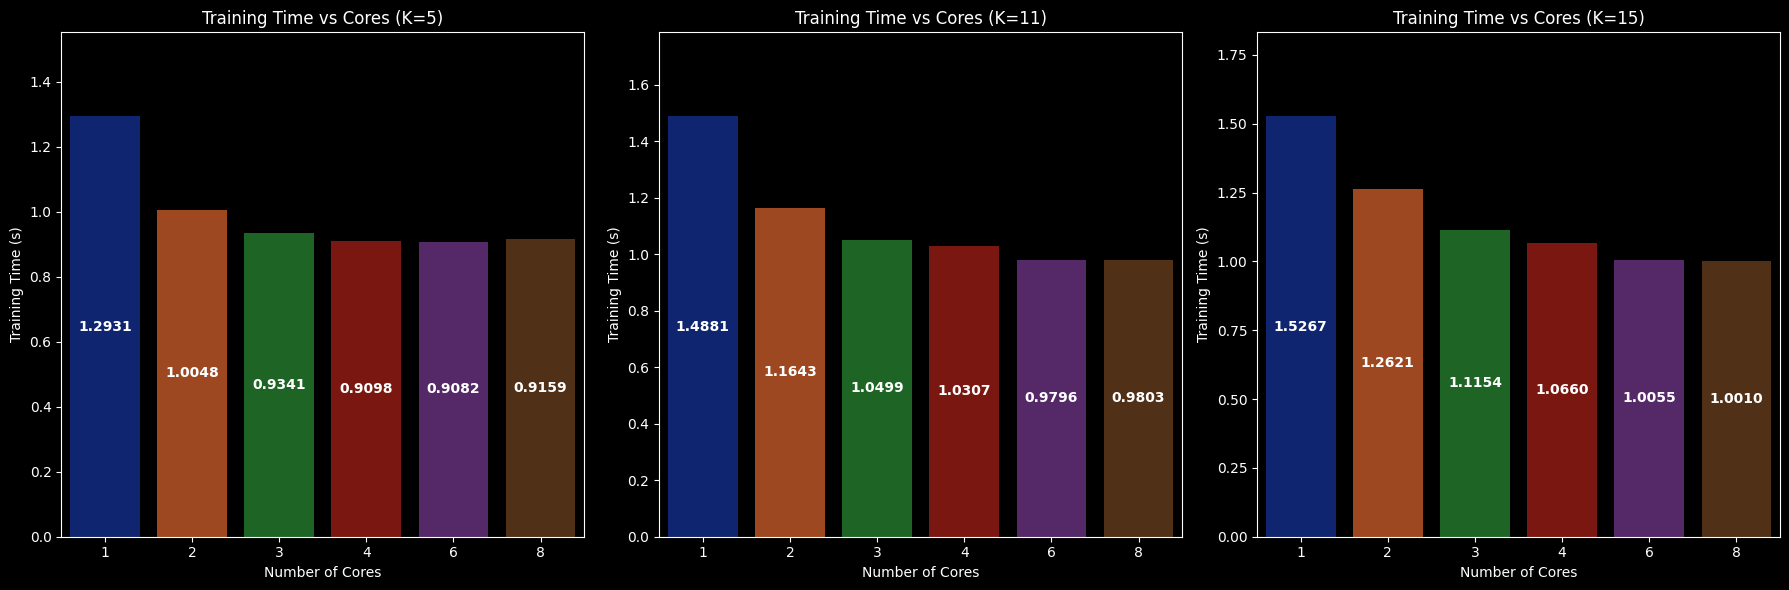

In [61]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

def plot_knn_results_by_core(results_knn):
    k_values = sorted(results_knn.keys())
    core_numbers = sorted(next(iter(results_knn.values())).keys())

    # Set dark style for the plots
    plt.style.use('dark_background')

    # Plot Accuracy and F1 Score vs k for each core
    for core in core_numbers:
        accuracy = [results_knn[k][core]['accuracy'] for k in k_values]
        f1 = [results_knn[k][core]['f1'] for k in k_values]

        fig, axs = plt.subplots(1, 2, figsize=(14, 5))

        # Accuracy Plot
        sns.barplot(x=k_values, y=accuracy, ax=axs[0], palette='dark')
        axs[0].set_title(f"Accuracy vs K (Cores={core})")
        axs[0].set_xlabel("K")
        axs[0].set_ylabel("Accuracy")
        axs[0].set_ylim(0, 1)
        for i, v in enumerate(accuracy):
            axs[0].text(i, v / 2, f"{v:.4f}", color='white', ha='center', va='center', fontweight='bold')

        # F1 Score Plot
        sns.barplot(x=k_values, y=f1, ax=axs[1], palette='dark')
        axs[1].set_title(f"F1 Score vs K (Cores={core})")
        axs[1].set_xlabel("K")
        axs[1].set_ylabel("F1 Score")
        axs[1].set_ylim(0, 1)
        for i, v in enumerate(f1):
            axs[1].text(i, v / 2, f"{v:.4f}", color='white', ha='center', va='center', fontweight='bold')

        plt.tight_layout()
        save_path = f"knn_results_plot_core_{core}.png"
        plt.savefig(save_path)
        print(f"Plot saved as {save_path}")
        plt.show()
        plt.close(fig)

    # Plot Training Time vs Cores for selected k values
    k_values_to_plot = [k_values[0], k_values[len(k_values)//2], k_values[-1]]

    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    for i, k in enumerate(k_values_to_plot):
        training_times = [results_knn[k][core]['training_time'] for core in core_numbers]

        sns.barplot(x=core_numbers, y=training_times, ax=axs[i], palette='dark')
        axs[i].set_title(f"Training Time vs Cores (K={k})")
        axs[i].set_xlabel("Number of Cores")
        axs[i].set_ylabel("Training Time (s)")
        axs[i].set_ylim(0, max(training_times) * 1.2)

        for j, v in enumerate(training_times):
            axs[i].text(j, v / 2, f"{v:.4f}", color='white', ha='center', va='center', fontweight='bold')

    plt.tight_layout()
    save_path = "knn_training_time_vs_cores.png"
    plt.savefig(save_path)
    print(f"Plot saved as {save_path}")
    plt.show()
    plt.close()

# Call the function with your KNN results
plot_knn_results_by_core(results_knn)


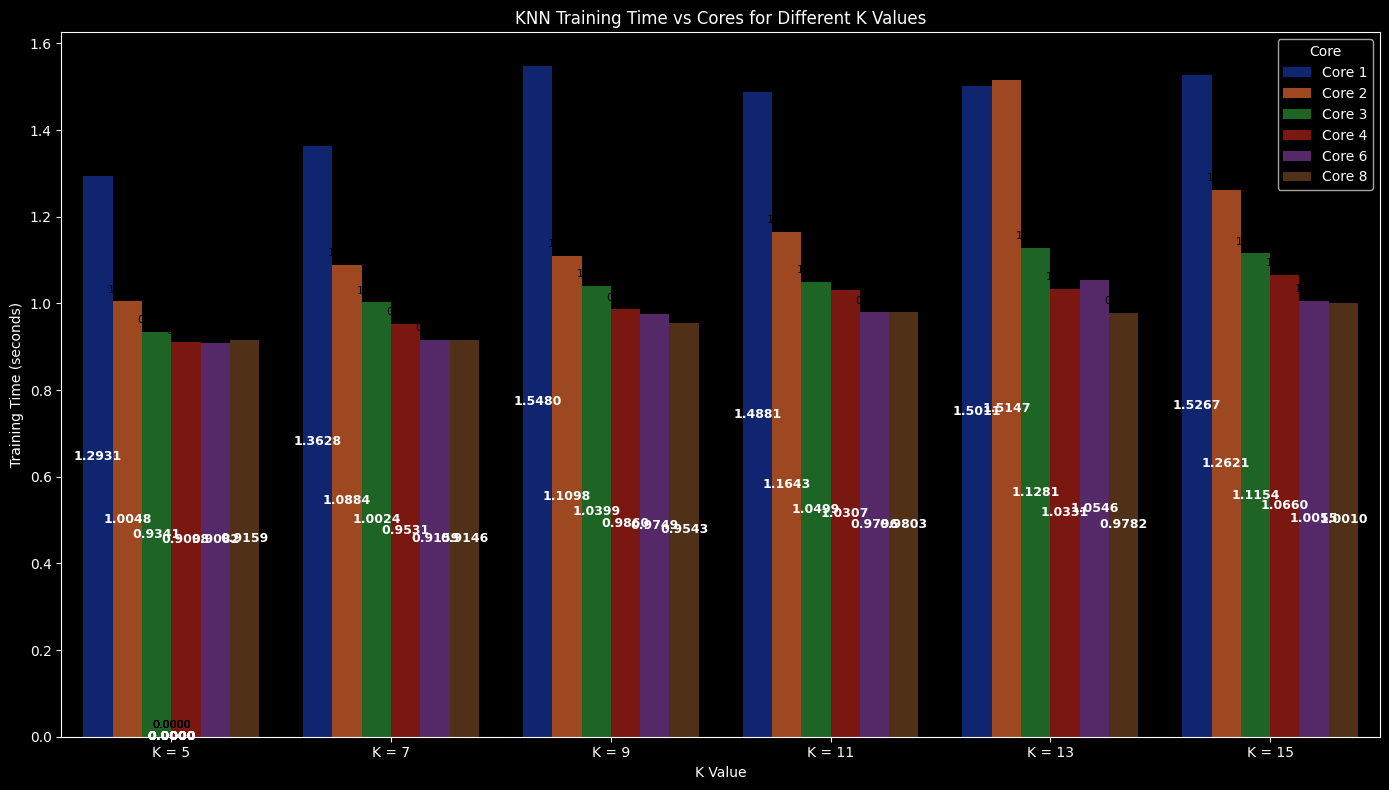

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_grouped_training_time_knn(results_knn):
    records = []
    for k in sorted(results_knn.keys()):
        for core in sorted(results_knn[k].keys()):
            records.append({
                'k': f"K = {k}",
                'core': f"Core {core}",
                'training_time': results_knn[k][core]['training_time'],
                'core_id': core  # used for hue ordering
            })

    df = pd.DataFrame(records)

    plt.figure(figsize=(14, 8))
    ax = sns.barplot(
        data=df,
        x='k',
        y='training_time',
        hue='core',
        palette=sns.color_palette("dark", len(df['core'].unique()))
    )

    # Annotate each bar inside and above with exact 4 decimal value
    for bar in ax.patches:
        height = bar.get_height()
        xpos = bar.get_x() + bar.get_width() / 2
        value_text = f"{height:.4f}"
        ax.text(xpos, height / 2, value_text, ha='center', va='center', color='white', fontsize=9, weight='bold')
        ax.text(xpos, height + (max(df['training_time']) * 0.01), value_text, ha='center', va='bottom', color='black', fontsize=8)

    plt.title("KNN Training Time vs Cores for Different K Values")
    plt.xlabel("K Value")
    plt.ylabel("Training Time (seconds)")
    plt.legend(title='Core')
    plt.tight_layout()
    plt.savefig("grouped_training_time_knn.png")
    plt.show()

# Call the function assuming `results_knn` holds the training times for KNN
plot_grouped_training_time_knn(results_knn)


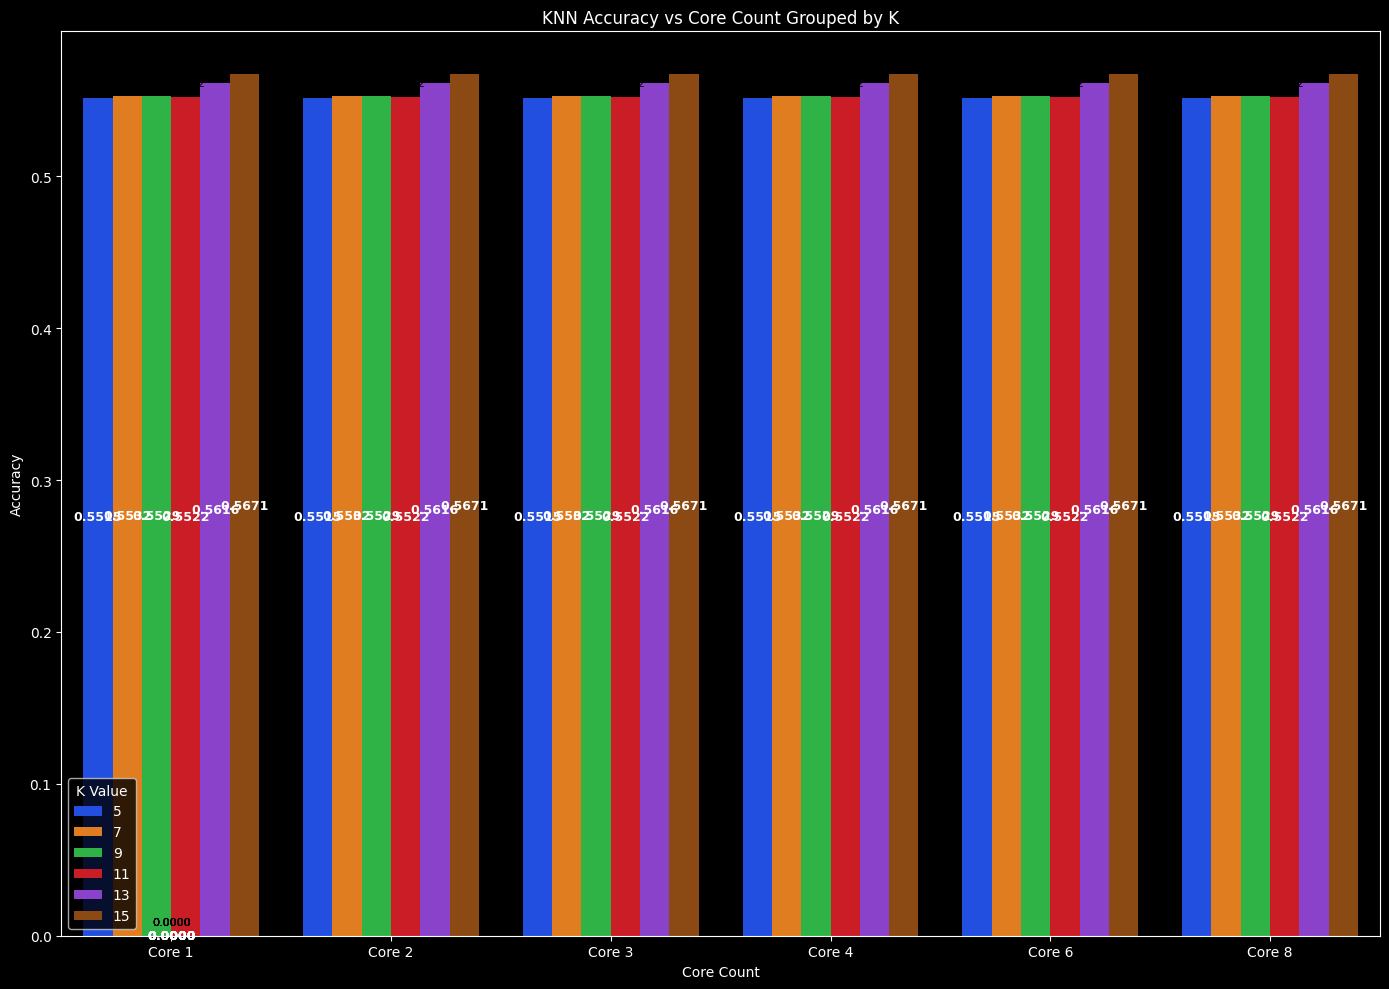

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_knn_accuracy_grouped(results_knn):
    records = []
    
    for k in sorted(results_knn.keys()):
        for core in sorted(results_knn[k].keys()):
            records.append({
                'core': f"Core {core}",
                'k': f"{k}",
                'accuracy': results_knn[k][core]['accuracy'],
                'core_id': core
            })

    df = pd.DataFrame(records)

    plt.figure(figsize=(14, 10))
    ax = sns.barplot(
        data=df,
        x='core',
        y='accuracy',
        hue='k',
        palette=sns.color_palette("bright", len(df['k'].unique()))
    )

    # Annotate bars with accuracy values
    for bar in ax.patches:
        height = bar.get_height()
        xpos = bar.get_x() + bar.get_width() / 2
        value_text = f"{height:.4f}"
        # Inside bar (white)
        ax.text(xpos, height / 2, value_text, ha='center', va='center', color='white', fontsize=9, weight='bold')
        # Above bar (black)
        ax.text(xpos, height + (max(df['accuracy']) * 0.01), value_text, ha='center', va='bottom', color='black', fontsize=8)

    plt.title("KNN Accuracy vs Core Count Grouped by K")
    plt.xlabel("Core Count")
    plt.ylabel("Accuracy")
    plt.legend(title='K Value')
    plt.tight_layout()
    plt.savefig("knn_accuracy_by_cores_grouped.png")
    plt.show()

# Call the function with your KNN results
plot_knn_accuracy_grouped(results_knn)


# Catboost

In [69]:
import time
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

def catboost_parallel_with_varying_cores(X_train, y_train, X_test, y_test, depth_list=[4, 6, 8], core_numbers=[1, 2, 3, 4]):
    results = {}
    cm_dict = {}

    for depth in depth_list:
        print(f"Training CatBoost with depth={depth}...\n")
        results[depth] = {}
        cm_dict[depth] = {}

        for cores in core_numbers:
            print(f"⚙️ Training with thread_count={cores} cores...")
            start_time = time.time()

            # Define and train the CatBoost model
            model = CatBoostClassifier(
                depth=depth,
                thread_count=cores,
                iterations=100,
                verbose=0
            )
            model.fit(X_train, y_train)

            # Predict
            y_pred = model.predict(X_test)

            # Metrics
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            conf_matrix = confusion_matrix(y_test, y_pred)
            training_time = time.time() - start_time

            print(f"✅ Training completed with depth={depth}, {cores} cores.")
            print(f"Accuracy: {accuracy:.4f}")
            print(f"F1 Score: {f1:.4f}")
            print(f"Training Time: {training_time:.2f} seconds")
            print(f"Confusion Matrix:\n{conf_matrix}")

            results[depth][cores] = {
                'accuracy': accuracy,
                'f1': f1,
                'training_time': training_time
            }
            cm_dict[depth][cores] = conf_matrix

    return results, cm_dict

# Example usage
results_catboost, cm_dict_catboost = catboost_parallel_with_varying_cores(
    X_train, y_train, X_test, y_test,
    depth_list=[4, 6, 8],
    core_numbers=[1, 2, 3, 4]
)

print("\nAll CatBoost Results:")
print(results_catboost)


Training CatBoost with depth=4...

⚙️ Training with thread_count=1 cores...
✅ Training completed with depth=4, 1 cores.
Accuracy: 0.5972
F1 Score: 0.4627
Training Time: 1.51 seconds
Confusion Matrix:
[[4833   94]
 [3209   64]]
⚙️ Training with thread_count=2 cores...
✅ Training completed with depth=4, 2 cores.
Accuracy: 0.5972
F1 Score: 0.4627
Training Time: 0.68 seconds
Confusion Matrix:
[[4833   94]
 [3209   64]]
⚙️ Training with thread_count=3 cores...
✅ Training completed with depth=4, 3 cores.
Accuracy: 0.5972
F1 Score: 0.4627
Training Time: 0.62 seconds
Confusion Matrix:
[[4833   94]
 [3209   64]]
⚙️ Training with thread_count=4 cores...
✅ Training completed with depth=4, 4 cores.
Accuracy: 0.5972
F1 Score: 0.4627
Training Time: 0.60 seconds
Confusion Matrix:
[[4833   94]
 [3209   64]]
Training CatBoost with depth=6...

⚙️ Training with thread_count=1 cores...
✅ Training completed with depth=6, 1 cores.
Accuracy: 0.5932
F1 Score: 0.4809
Training Time: 1.06 seconds
Confusion Matri

In [66]:
import time
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

def catboost_parallel_with_varying_cores(X_train, y_train, X_test, y_test, depth_list=[4, 6, 8], core_numbers=[1, 2, 4, 6, 8]):
    results = {}
    cm_dict = {}

    for depth in depth_list:
        print(f"Training CatBoost with depth={depth}...\n")
        results[depth] = {}
        cm_dict[depth] = {}

        for cores in core_numbers:
            print(f"⚙ Training with thread_count={cores} cores...")
            start_time = time.time()

            # Define and train the CatBoost model
            model = CatBoostClassifier(
                depth=depth,
                thread_count=cores,
                iterations=100,
                verbose=0,
                task_type='CPU'  # Ensure we are using CPU for training
            )
            model.fit(X_train, y_train)

            # Predict
            y_pred = model.predict(X_test)

            # Metrics
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            conf_matrix = confusion_matrix(y_test, y_pred)
            training_time = time.time() - start_time

            print(f"✅ Training completed with depth={depth}, {cores} cores.")
            print(f"Accuracy: {accuracy:.4f}")
            print(f"F1 Score: {f1:.4f}")
            print(f"Training Time: {training_time:.2f} seconds")
            print(f"Confusion Matrix:\n{conf_matrix}")

            results[depth][cores] = {
                'accuracy': accuracy,
                'f1': f1,
                'training_time': training_time
            }
            cm_dict[depth][cores] = conf_matrix

    return results, cm_dict

# Example usage (splitting is assumed to be done already)
results_catboost, cm_dict_catboost = catboost_parallel_with_varying_cores(
    X_train, y_train, X_test, y_test,
    depth_list=[4, 6, 8,10,12],  # Different depths to evaluate
    core_numbers=[1, 2, 4, 6, 8]  # Testing with different thread counts up to 8
)

print("\nAll CatBoost Results:")
print(results_catboost)

Training CatBoost with depth=4...

⚙ Training with thread_count=1 cores...
✅ Training completed with depth=4, 1 cores.
Accuracy: 0.5972
F1 Score: 0.4627
Training Time: 1.41 seconds
Confusion Matrix:
[[4833   94]
 [3209   64]]
⚙ Training with thread_count=2 cores...
✅ Training completed with depth=4, 2 cores.
Accuracy: 0.5972
F1 Score: 0.4627
Training Time: 0.64 seconds
Confusion Matrix:
[[4833   94]
 [3209   64]]
⚙ Training with thread_count=4 cores...
✅ Training completed with depth=4, 4 cores.
Accuracy: 0.5972
F1 Score: 0.4627
Training Time: 0.53 seconds
Confusion Matrix:
[[4833   94]
 [3209   64]]
⚙ Training with thread_count=6 cores...
✅ Training completed with depth=4, 6 cores.
Accuracy: 0.5972
F1 Score: 0.4627
Training Time: 0.55 seconds
Confusion Matrix:
[[4833   94]
 [3209   64]]
⚙ Training with thread_count=8 cores...
✅ Training completed with depth=4, 8 cores.
Accuracy: 0.5972
F1 Score: 0.4627
Training Time: 0.55 seconds
Confusion Matrix:
[[4833   94]
 [3209   64]]
Training C

Plot saved as catboost_results_plot_core_1.png


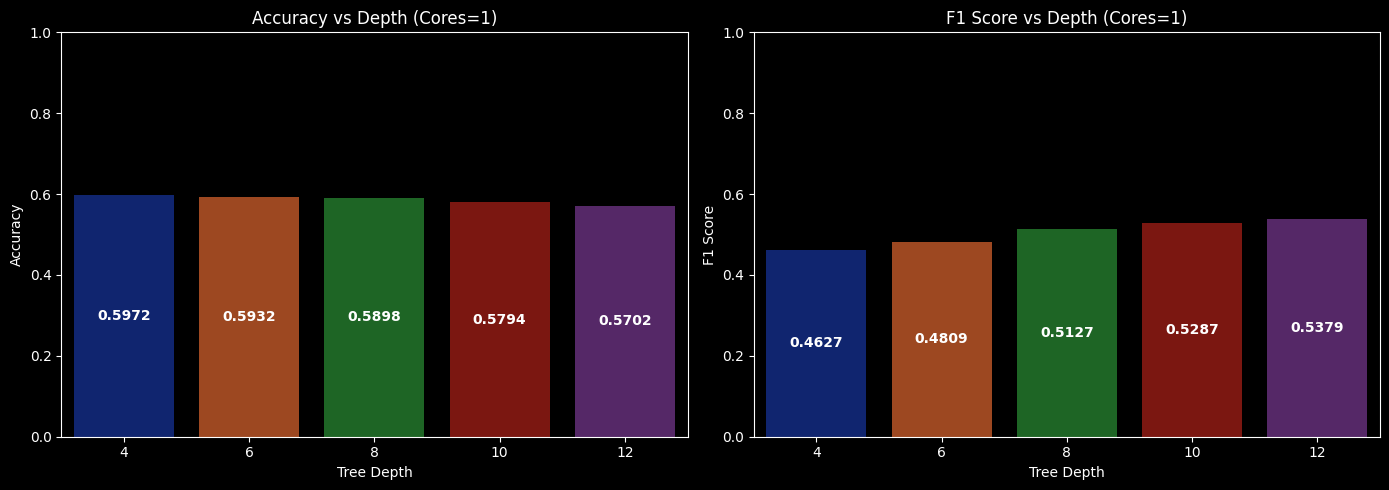

Plot saved as catboost_results_plot_core_2.png


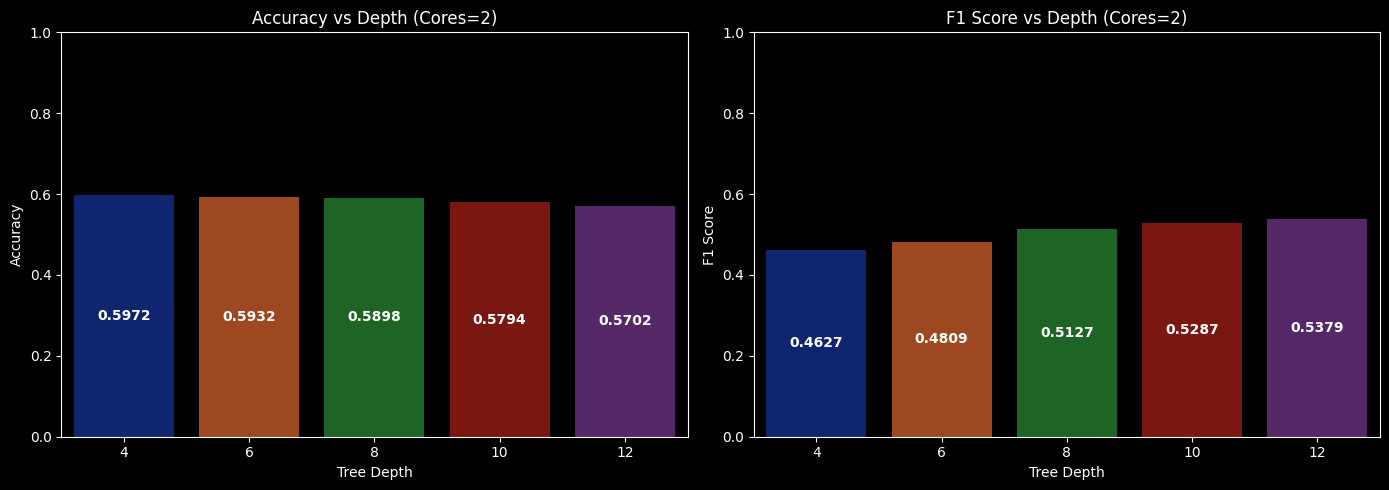

Plot saved as catboost_results_plot_core_4.png


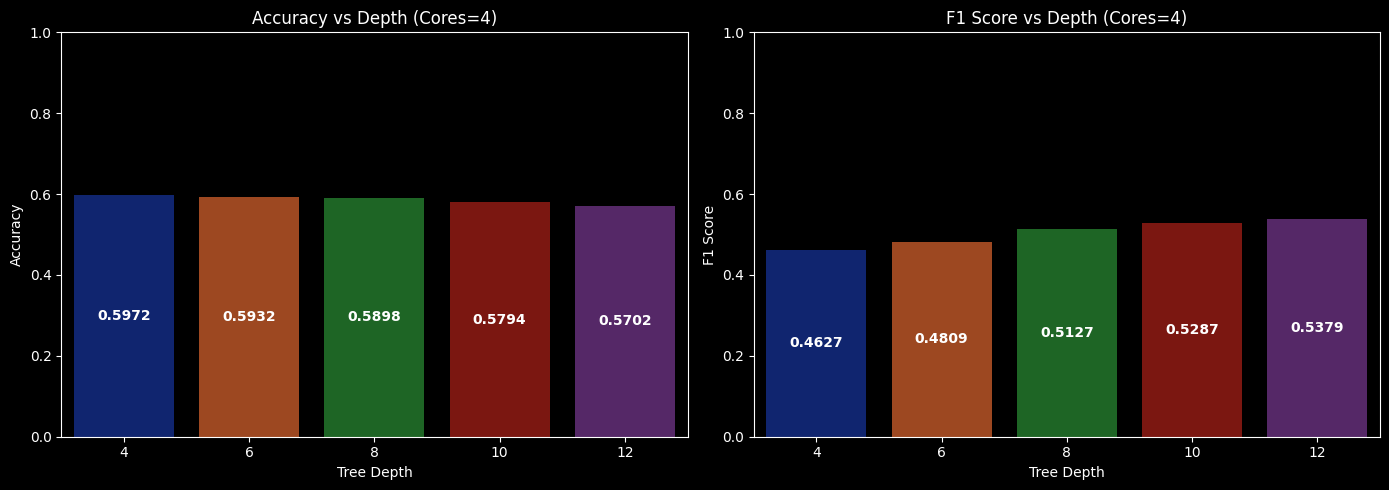

Plot saved as catboost_results_plot_core_6.png


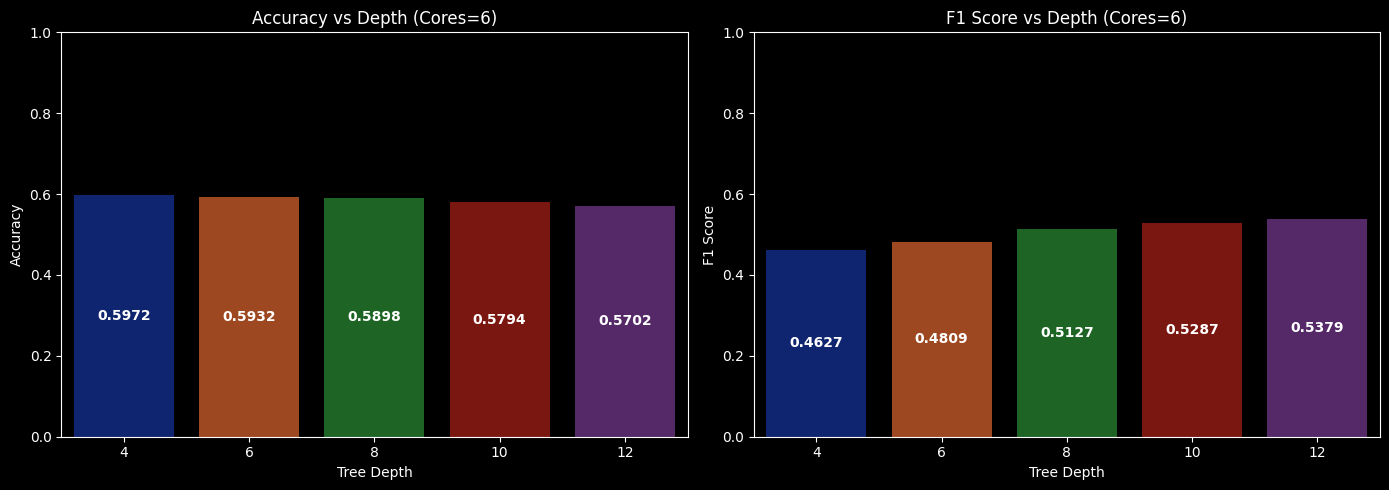

Plot saved as catboost_results_plot_core_8.png


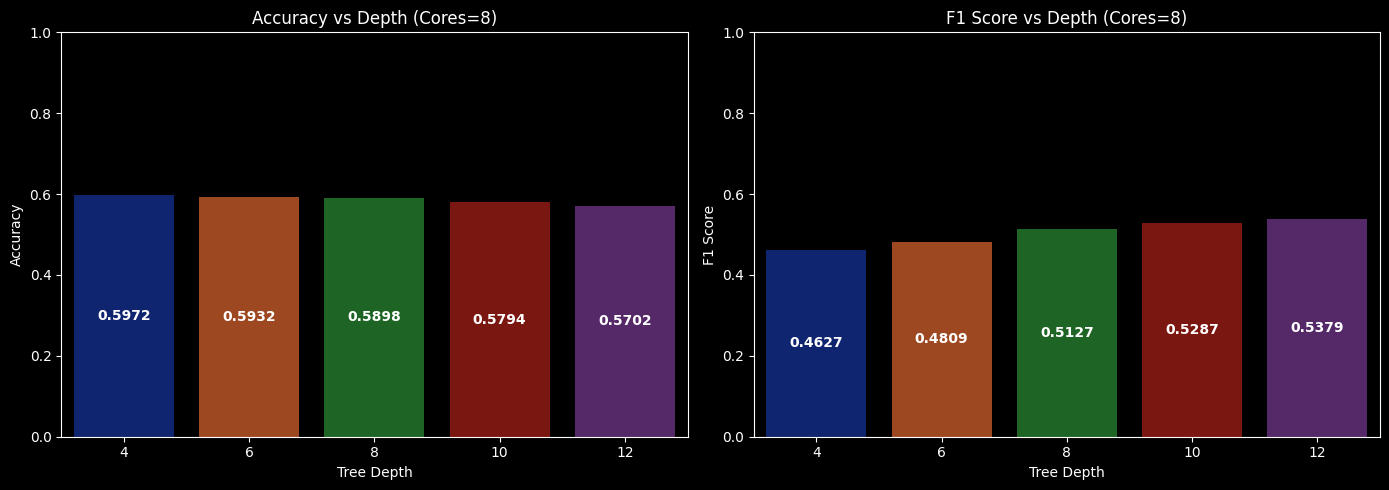

Plot saved as catboost_training_time_vs_cores.png


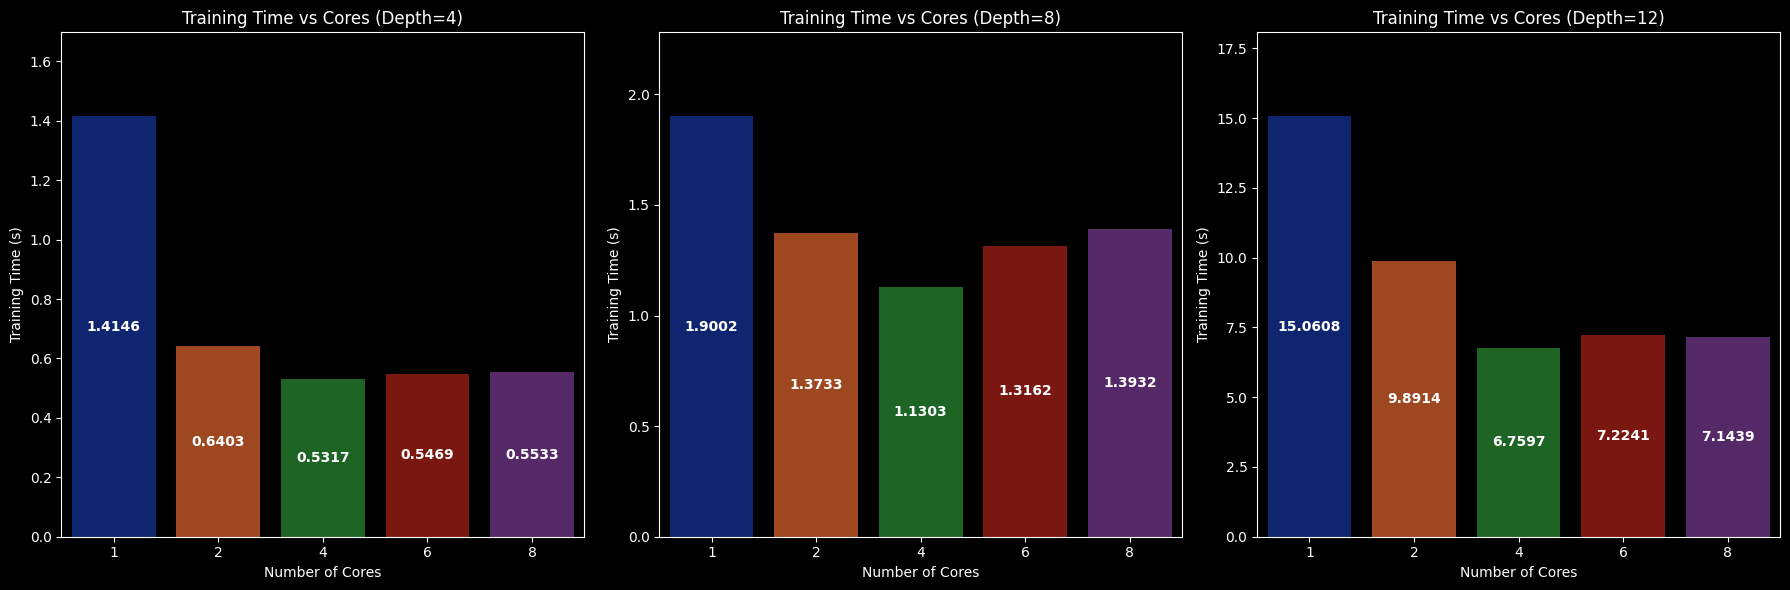

In [67]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

def plot_catboost_results_by_core(results_catboost):
    depth_values = sorted(results_catboost.keys())
    core_numbers = sorted(next(iter(results_catboost.values())).keys())

    # Set dark style for the plots
    plt.style.use('dark_background')

    # Plot Accuracy and F1 Score vs depth for each core
    for core in core_numbers:
        accuracy = [results_catboost[depth][core]['accuracy'] for depth in depth_values]
        f1 = [results_catboost[depth][core]['f1'] for depth in depth_values]

        fig, axs = plt.subplots(1, 2, figsize=(14, 5))

        # Accuracy Plot
        sns.barplot(x=depth_values, y=accuracy, ax=axs[0], palette='dark')
        axs[0].set_title(f"Accuracy vs Depth (Cores={core})")
        axs[0].set_xlabel("Tree Depth")
        axs[0].set_ylabel("Accuracy")
        axs[0].set_ylim(0, 1)
        for i, v in enumerate(accuracy):
            axs[0].text(i, v / 2, f"{v:.4f}", color='white', ha='center', va='center', fontweight='bold')

        # F1 Score Plot
        sns.barplot(x=depth_values, y=f1, ax=axs[1], palette='dark')
        axs[1].set_title(f"F1 Score vs Depth (Cores={core})")
        axs[1].set_xlabel("Tree Depth")
        axs[1].set_ylabel("F1 Score")
        axs[1].set_ylim(0, 1)
        for i, v in enumerate(f1):
            axs[1].text(i, v / 2, f"{v:.4f}", color='white', ha='center', va='center', fontweight='bold')

        plt.tight_layout()
        save_path = f"catboost_results_plot_core_{core}.png"
        plt.savefig(save_path)
        print(f"Plot saved as {save_path}")
        plt.show()
        plt.close(fig)

    # Plot Training Time vs Cores for selected depth values
    selected_depths = [depth_values[0], depth_values[len(depth_values)//2], depth_values[-1]]

    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    for i, depth in enumerate(selected_depths):
        training_times = [results_catboost[depth][core]['training_time'] for core in core_numbers]

        sns.barplot(x=core_numbers, y=training_times, ax=axs[i], palette='dark')
        axs[i].set_title(f"Training Time vs Cores (Depth={depth})")
        axs[i].set_xlabel("Number of Cores")
        axs[i].set_ylabel("Training Time (s)")
        axs[i].set_ylim(0, max(training_times) * 1.2)

        for j, v in enumerate(training_times):
            axs[i].text(j, v / 2, f"{v:.4f}", color='white', ha='center', va='center', fontweight='bold')

    plt.tight_layout()
    save_path = "catboost_training_time_vs_cores.png"
    plt.savefig(save_path)
    print(f"Plot saved as {save_path}")
    plt.show()
    plt.close()

# Call the function with your CatBoost results
plot_catboost_results_by_core(results_catboost)


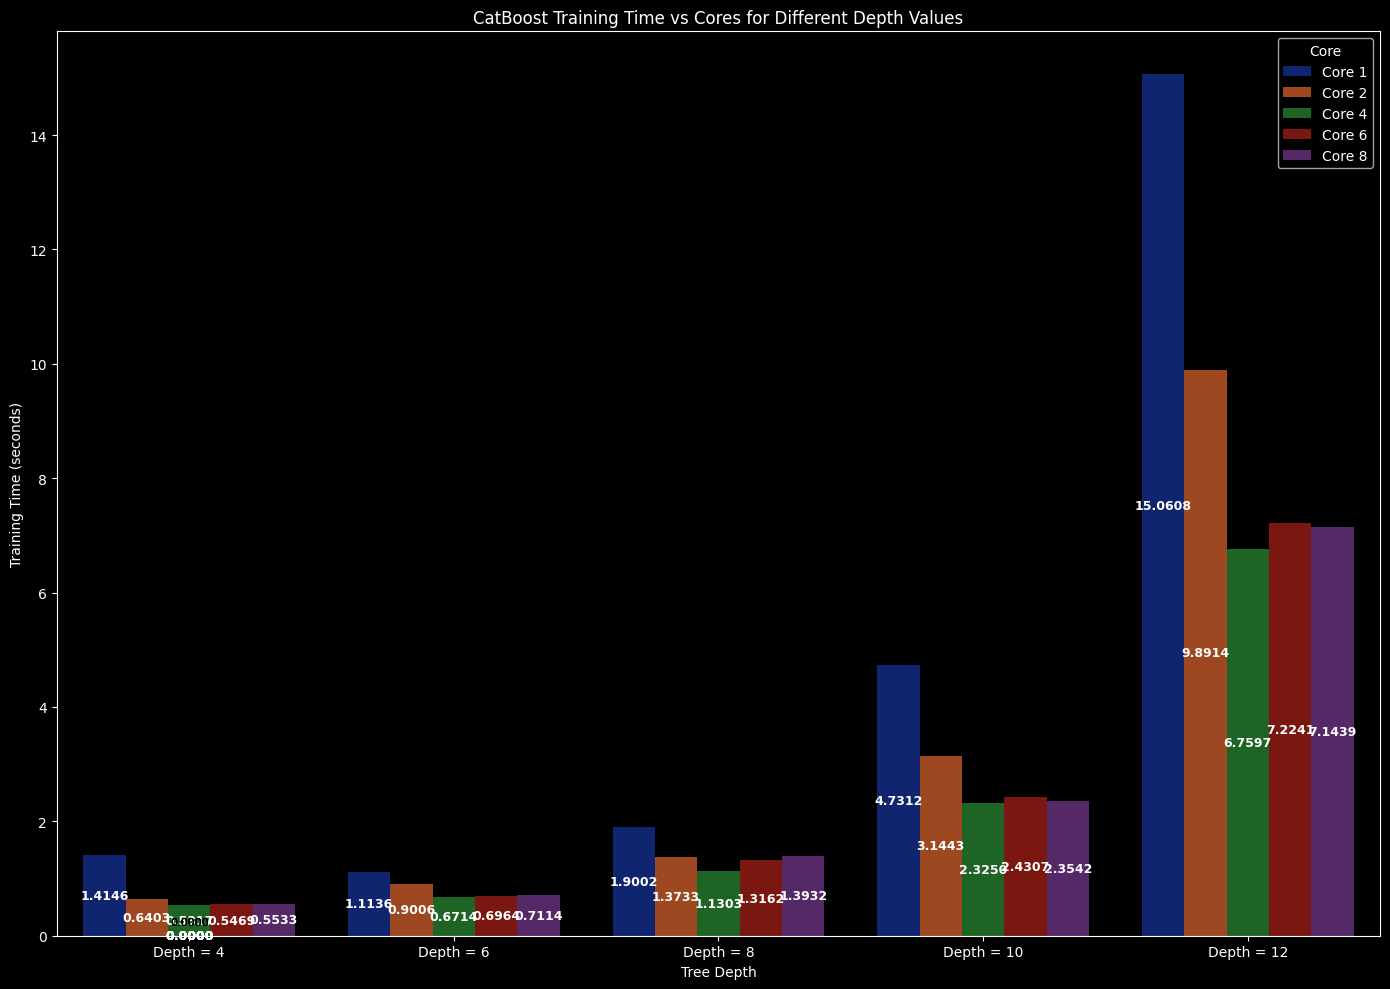

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_grouped_training_time_catboost(results_catboost):
    records = []
    for depth in sorted(results_catboost.keys()):
        for core in sorted(results_catboost[depth].keys()):
            records.append({
                'depth': f"Depth = {depth}",
                'core': f"Core {core}",
                'training_time': results_catboost[depth][core]['training_time'],
                'core_id': core  # used for hue ordering
            })

    df = pd.DataFrame(records)

    plt.figure(figsize=(14, 10))
    ax = sns.barplot(
        data=df,
        x='depth',
        y='training_time',
        hue='core',
        palette=sns.color_palette("dark", len(df['core'].unique()))
    )

    # Annotate each bar inside and above with exact 4 decimal value
    for bar in ax.patches:
        height = bar.get_height()
        xpos = bar.get_x() + bar.get_width() / 2
        value_text = f"{height:.4f}"
        ax.text(xpos, height / 2, value_text, ha='center', va='center', color='white', fontsize=9, weight='bold')
        ax.text(xpos, height + (max(df['training_time']) * 0.01), value_text, ha='center', va='bottom', color='black', fontsize=8)

    plt.title("CatBoost Training Time vs Cores for Different Depth Values")
    plt.xlabel("Tree Depth")
    plt.ylabel("Training Time (seconds)")
    plt.legend(title='Core')
    plt.tight_layout()
    plt.savefig("grouped_training_time_catboost.png")
    plt.show()

# Call the function assuming `results_catboost` holds the training times for CatBoost
plot_grouped_training_time_catboost(results_catboost)


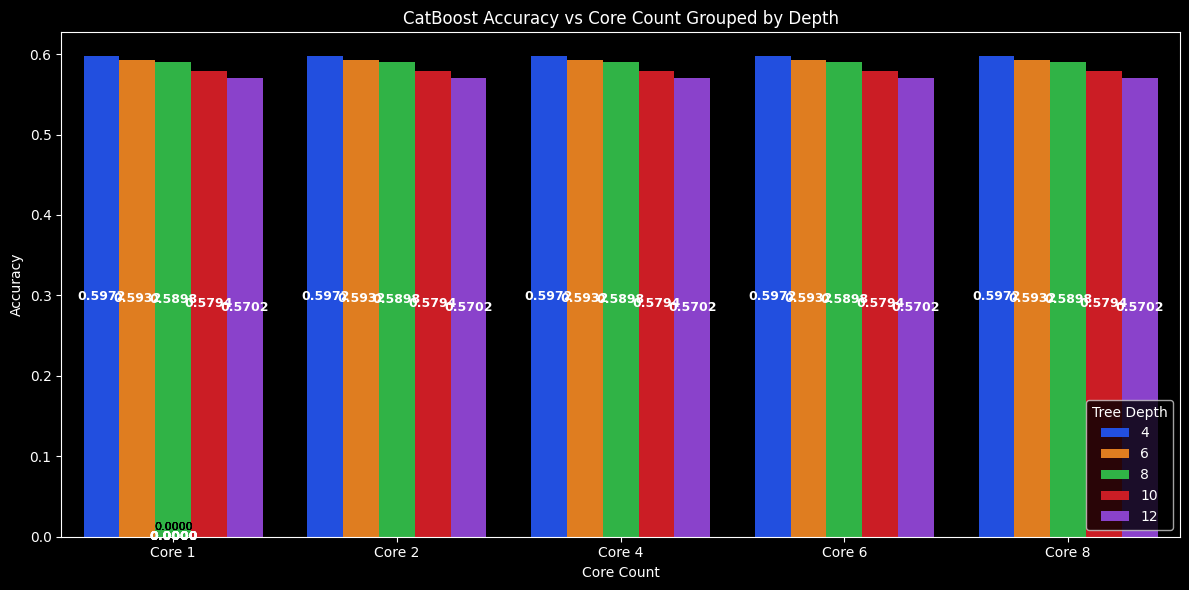

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_catboost_accuracy_grouped(results_catboost):
    records = []

    for depth in sorted(results_catboost.keys()):
        for core in sorted(results_catboost[depth].keys()):
            records.append({
                'core': f"Core {core}",
                'depth': f"{depth}",
                'accuracy': results_catboost[depth][core]['accuracy'],
                'core_id': core
            })

    df = pd.DataFrame(records)

    plt.figure(figsize=(12, 6))
    ax = sns.barplot(
        data=df,
        x='core',
        y='accuracy',
        hue='depth',
        palette=sns.color_palette("bright", len(df['depth'].unique()))
    )

    # Annotate bars with accuracy values
    for bar in ax.patches:
        height = bar.get_height()
        xpos = bar.get_x() + bar.get_width() / 2
        value_text = f"{height:.4f}"
        ax.text(xpos, height / 2, value_text, ha='center', va='center', color='white', fontsize=9, weight='bold')
        ax.text(xpos, height + (max(df['accuracy']) * 0.01), value_text, ha='center', va='bottom', color='black', fontsize=8)

    plt.title("CatBoost Accuracy vs Core Count Grouped by Depth")
    plt.xlabel("Core Count")
    plt.ylabel("Accuracy")
    plt.legend(title='Tree Depth')
    plt.tight_layout()
    plt.savefig("catboost_accuracy_by_cores_grouped.png")
    plt.show()

# Call the function with your CatBoost results
plot_catboost_accuracy_grouped(results_catboost)


# All result

In [70]:
import pandas as pd

# Set display option to prevent scientific notation
pd.set_option('display.float_format', '{:.6f}'.format)

# Assuming all result dicts are already defined: results_rf, results_tree, etc.

all_results = {
    'RandomForest': results,
    'DecisionTree': results_tree,
    'LogisticRegression': results_logreg,
    'XGBoost': results_xgboost,
    'NaiveBayes': results_nb,
    'KNN': results_knn,
    'CatBoost': results_catboost
}

selected_models = []

for model_name, config_dict in all_results.items():
    best_time = float('inf')
    best_config = None
    best_core = None

    # Step 1: Find the config and core with least training time
    for config_val, cores in config_dict.items():
        for core_val, metrics in cores.items():
            if metrics['training_time'] < best_time:
                best_time = metrics['training_time']
                best_config = config_val
                best_core = core_val

    # Step 2: Add the best (fastest) version
    fastest = config_dict[best_config][best_core]
    selected_models.append({
        'Model': model_name,
        'Config': best_config,
        'Cores': best_core,
        'Accuracy': fastest['accuracy'],
        'F1': fastest['f1'],
        'TrainingTime': fastest['training_time']
    })

    # Step 3: Add the same config but with 1 core
    seq = config_dict[best_config][1]  # Sequential version (core=1)
    selected_models.append({
        'Model': model_name,
        'Config': best_config,
        'Cores': 1,
        'Accuracy': seq['accuracy'],
        'F1': seq['f1'],
        'TrainingTime': seq['training_time']
    })

# Step 4: Convert to DataFrame
df_selected_models = pd.DataFrame(selected_models)

# Print the final DataFrame
print(df_selected_models)


                 Model     Config  Cores  Accuracy       F1  TrainingTime
0         RandomForest 100.000000      8  0.591463 0.536962      1.671673
1         RandomForest 100.000000      1  0.591463 0.536962      7.350478
2         DecisionTree   5.000000      4  0.598659 0.455406      0.074954
3         DecisionTree   5.000000      1  0.598659 0.455406      0.096940
4   LogisticRegression  10.000000      1  0.600854 0.451041      0.016960
5   LogisticRegression  10.000000      1  0.600854 0.451041      0.016960
6              XGBoost   3.000000      6  0.595610 0.465646      0.157902
7              XGBoost   3.000000      1  0.595610 0.465646      0.674632
8           NaiveBayes   0.000000      1  0.600244 0.456177      0.016989
9           NaiveBayes   0.000000      1  0.600244 0.456177      0.016989
10                 KNN   5.000000      6  0.551463 0.539392      0.908192
11                 KNN   5.000000      1  0.551463 0.539392      1.293069
12            CatBoost   4.000000     

In [71]:
import pandas as pd

# Set display option to prevent scientific notation
pd.set_option('display.float_format', '{:.6f}'.format)

# Assuming all result dicts are already defined: results_rf, results_tree, etc.

all_results = {
    'RandomForest': results,
    'DecisionTree': results_tree,
    'LogisticRegression': results_logreg,
    'XGBoost': results_xgboost,
    'NaiveBayes': results_nb,
    'KNN': results_knn,
    'CatBoost': results_catboost
}

selected_models = []

for model_name, config_dict in all_results.items():
    best_time = float('inf')
    best_config = None
    best_core = None
    hyperparameter_value = None
    hyperparameter_name = None

    # Step 1: Find the config and core with least training time
    for config_val, cores in config_dict.items():
        for core_val, metrics in cores.items():
            if metrics['training_time'] < best_time:
                best_time = metrics['training_time']
                best_config = config_val
                best_core = core_val

    # Step 2: Extract the hyperparameter (config_value) and its name based on the model
    if model_name == 'RandomForest':
        hyperparameter_value = best_config  # n_estimators for RandomForest
        hyperparameter_name = 'n_estimators'
    elif model_name == 'KNN':
        hyperparameter_value = best_config  # k for KNN
        hyperparameter_name = 'k'
    elif model_name == 'DecisionTree':
        hyperparameter_value = best_config  # max_depth for DecisionTree
        hyperparameter_name = 'max_depth'
    elif model_name == 'LogisticRegression':
        hyperparameter_value = best_config  # C for LogisticRegression
        hyperparameter_name = 'C'
    elif model_name == 'XGBoost':
        hyperparameter_value = best_config  # n_estimators for XGBoost
        hyperparameter_name = 'n_estimators'
    elif model_name == 'NaiveBayes':
        hyperparameter_value = best_config  # alpha for NaiveBayes
        hyperparameter_name = 'alpha'
    elif model_name == 'CatBoost':
        hyperparameter_value = best_config  # iterations for CatBoost
        hyperparameter_name = 'iterations'

    # Step 3: Add the best (fastest) version
    fastest = config_dict[best_config][best_core]
    selected_models.append({
        'Model': model_name,
        'Hyperparameter': hyperparameter_value,
        'HyperparameterName': hyperparameter_name,
        'Cores': best_core,
        'Accuracy': fastest['accuracy'],
        'F1': fastest['f1'],
        'TrainingTime': fastest['training_time']
    })

    # Step 4: Add the same config but with 1 core
    seq = config_dict[best_config][1]  # Sequential version (core=1)
    selected_models.append({
        'Model': model_name,
        'Hyperparameter': hyperparameter_value,
        'HyperparameterName': hyperparameter_name,
        'Cores': 1,
        'Accuracy': seq['accuracy'],
        'F1': seq['f1'],
        'TrainingTime': seq['training_time']
    })

# Step 5: Convert to DataFrame
df_selected_models = pd.DataFrame(selected_models)

# Print the final DataFrame
df_selected_models


Model  Hyperparameter HyperparameterName  Cores  Accuracy  \
0         RandomForest      100.000000       n_estimators      8  0.591463   
1         RandomForest      100.000000       n_estimators      1  0.591463   
2         DecisionTree        5.000000          max_depth      4  0.598659   
3         DecisionTree        5.000000          max_depth      1  0.598659   
4   LogisticRegression       10.000000                  C      1  0.600854   
5   LogisticRegression       10.000000                  C      1  0.600854   
6              XGBoost        3.000000       n_estimators      6  0.595610   
7              XGBoost        3.000000       n_estimators      1  0.595610   
8           NaiveBayes        0.000000              alpha      1  0.600244   
9           NaiveBayes        0.000000              alpha      1  0.600244   
10                 KNN        5.000000                  k      6  0.551463   
11                 KNN        5.000000                  k      1  0.551463   
12            CatBoost        4.000000         iterations      4  0.597195   
13            CatBoost        4.000000         iterations      1  0.597195   

         F1  TrainingTime  
0  0.536962      1.671673  
1  0.536962      7.350478  
2  0.455406      0.074954  
3  0.455406      0.096940  
4  0.451041      0.016960  
5  0.451041      0.016960  
6  0.465646      0.157902  
7  0.465646      0.674632  
8  0.456177      0.016989  
9  0.456177      0.016989  
10 0.539392      0.908192  
11 0.539392      1.293069  
12 0.462717      0.531698  
13 0.462717      1.414641

In [72]:
df_selected_models.to_csv("models_trains_result.csv",index=False)

In [73]:
model_shortnames = {
    'RandomForest': 'RF',
    'DecisionTree': 'DT',
    'LogisticRegression': 'LogReg',
    'XGBoost': 'XGB',
    'NaiveBayes': 'NB',
    'KNN': 'KNN',
    'CatBoost': 'CB'
}

hyperparameter_shortnames = {
    'n_estimators': 'n_est',
    'max_depth': 'max_dep',
    'C': 'C',
    'alpha': 'alpha',
    'k': 'k',
    'iterations': 'iter'
}

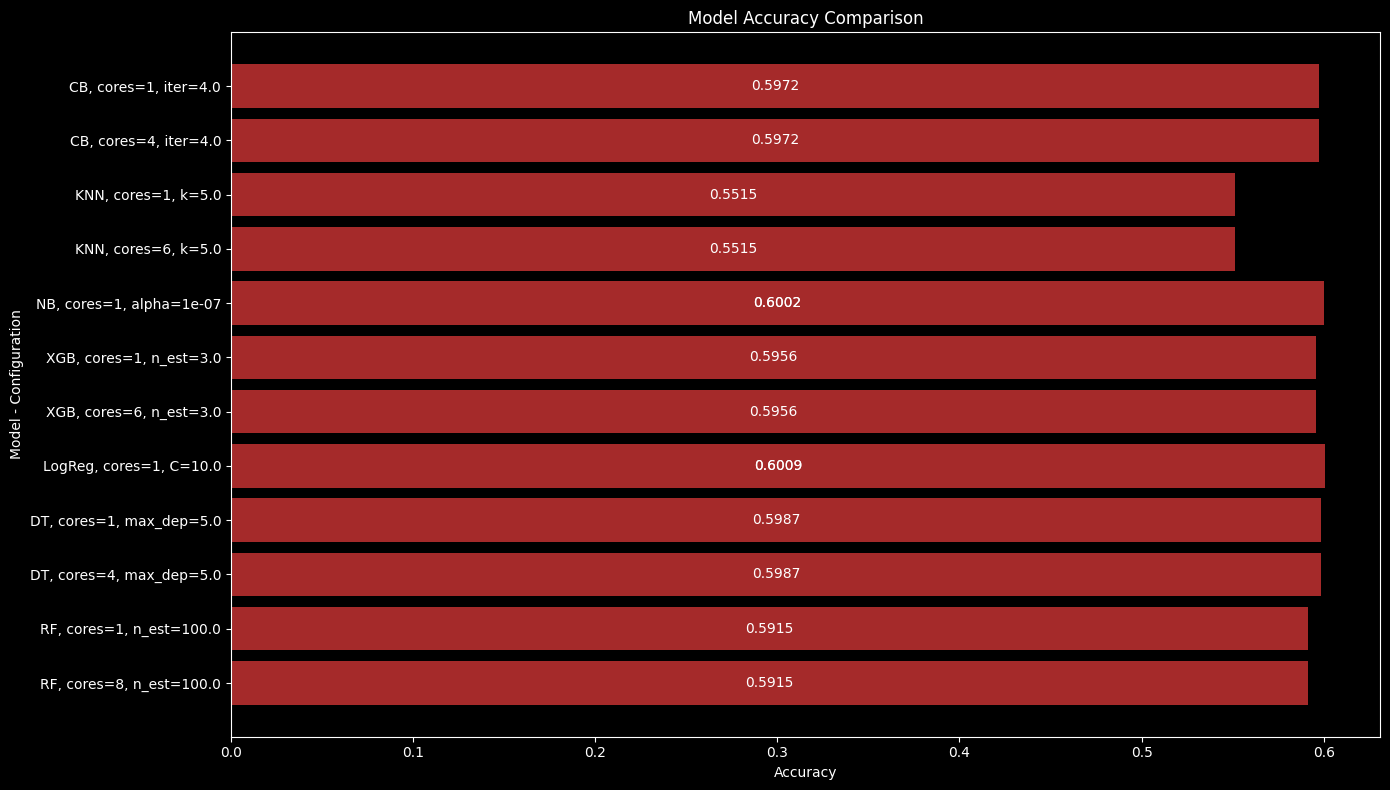

In [74]:
plt.figure(figsize=(14, 8))

# Plot the horizontal bar chart
bars = plt.barh(df_selected_models['Model'].map(model_shortnames) + ', cores=' + df_selected_models['Cores'].astype(str) + 
                ', ' + df_selected_models['HyperparameterName'].map(hyperparameter_shortnames) + '=' + df_selected_models['Hyperparameter'].astype(str),
                df_selected_models['Accuracy'], color='brown')

# Step 3: Add values to the bars with white text
for index, bar in enumerate(bars):
    plt.text(bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{df_selected_models["Accuracy"][index]:.4f}', 
             va='center', ha='center', fontsize=10, color='white')

# Customize the chart
plt.xlabel('Accuracy')
plt.ylabel('Model - Configuration')
plt.title('Model Accuracy Comparison')

# Step 4: Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

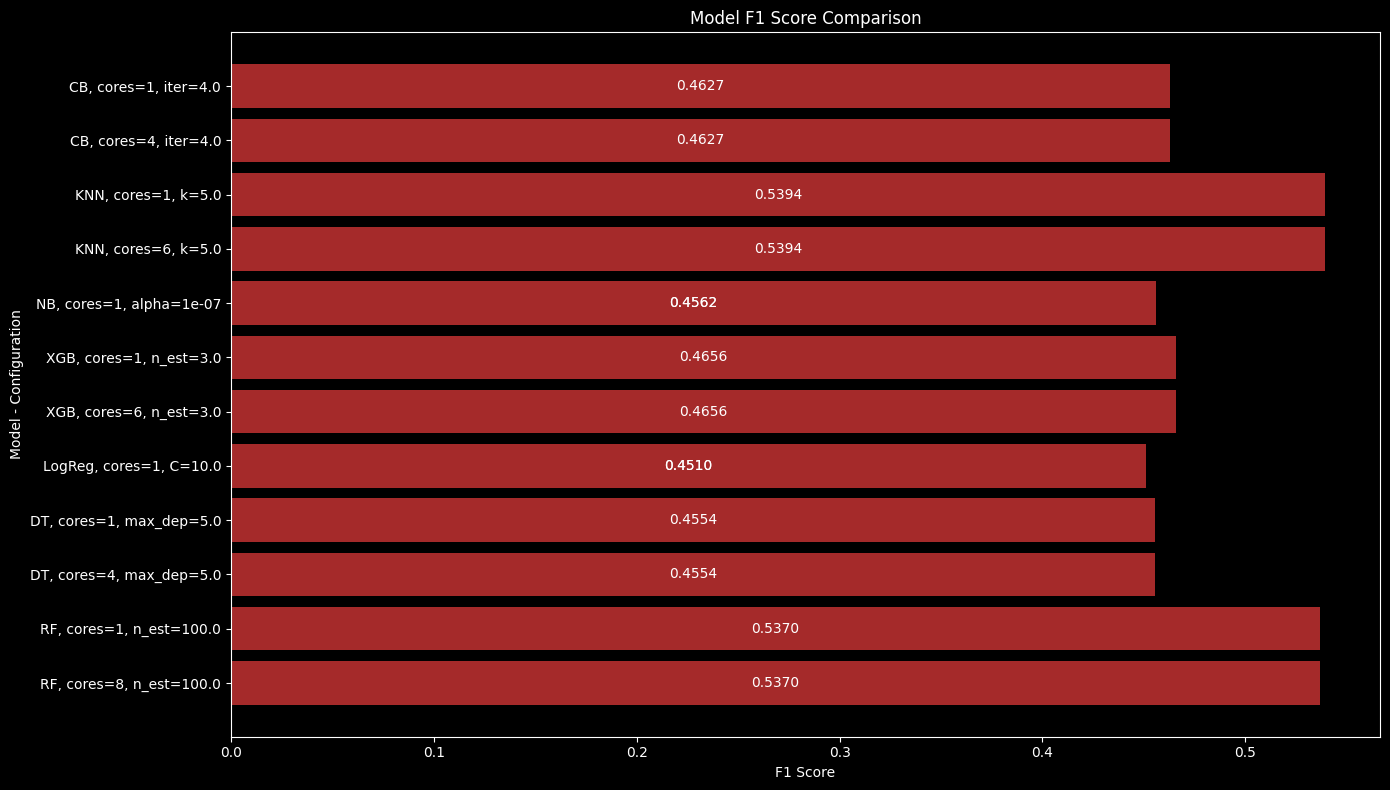

In [75]:
plt.figure(figsize=(14, 8))

# Plot the horizontal bar chart for F1 score
bars = plt.barh(df_selected_models['Model'].map(model_shortnames) + ', cores=' + df_selected_models['Cores'].astype(str) + 
                ', ' + df_selected_models['HyperparameterName'].map(hyperparameter_shortnames) + '=' + df_selected_models['Hyperparameter'].astype(str),
                df_selected_models['F1'], color='brown')

# Step 3: Add values to the bars with white text (representing F1 Score)
for index, bar in enumerate(bars):
    plt.text(bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{df_selected_models["F1"][index]:.4f}', 
             va='center', ha='center', fontsize=10, color='white')

# Customize the chart
plt.xlabel('F1 Score')
plt.ylabel('Model - Configuration')
plt.title('Model F1 Score Comparison')

# Step 4: Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()


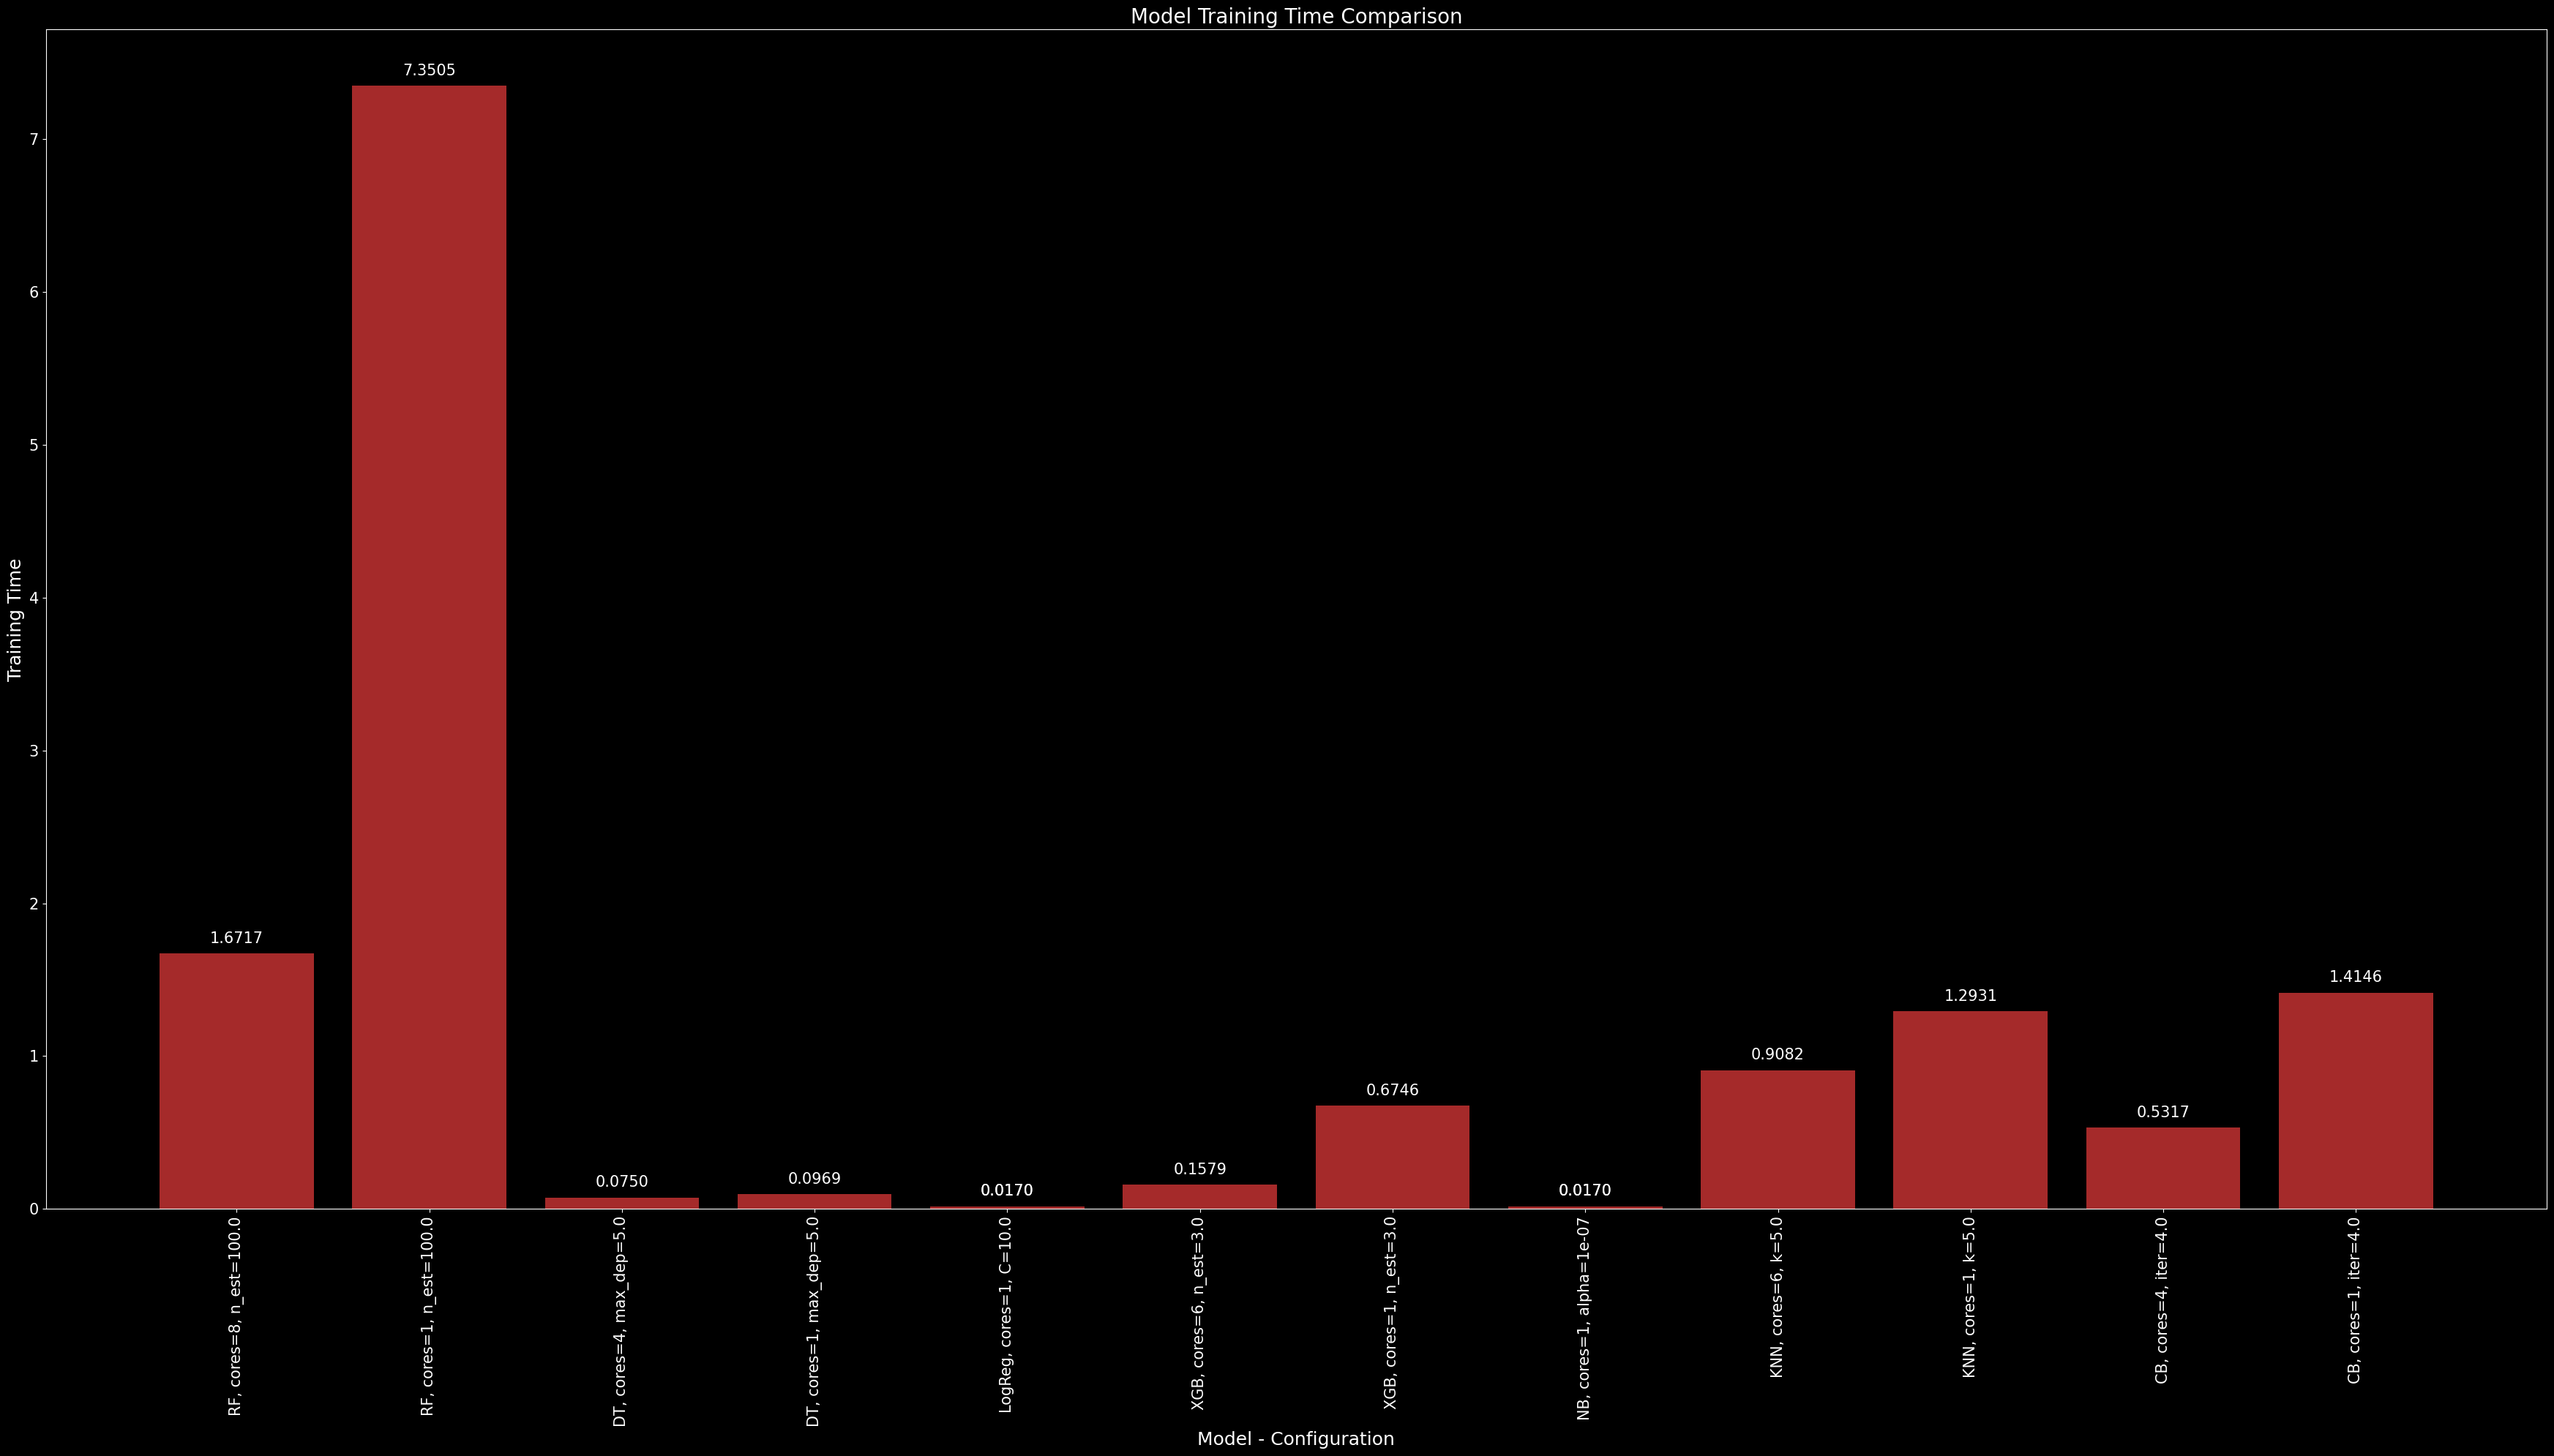

In [76]:
plt.figure(figsize=(35, 20))  # Increased figure size for better visibility

# Plot the vertical bar chart with brown color for training time
bars = plt.bar(df_selected_models['Model'].map(model_shortnames) + ', cores=' + df_selected_models['Cores'].astype(str) + 
               ', ' + df_selected_models['HyperparameterName'].map(hyperparameter_shortnames) + '=' + df_selected_models['Hyperparameter'].astype(str),
               df_selected_models['TrainingTime'], color='brown')

# Step 3: Add values to the bars with white text (representing TrainingTime)
for index, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, f'{df_selected_models["TrainingTime"][index]:.4f}', 
             va='bottom', ha='center', fontsize=15, color='white')  # Increased font size for better readability

# Customize the chart
plt.xticks(rotation=90, fontsize=15)  # Rotate x-axis labels for readability
plt.yticks(fontsize=15)  # Increase font size for y-axis labels
plt.xlabel('Model - Configuration', fontsize=18)
plt.ylabel('Training Time', fontsize=18)
plt.title('Model Training Time Comparison', fontsize=20)

# Step 4: Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

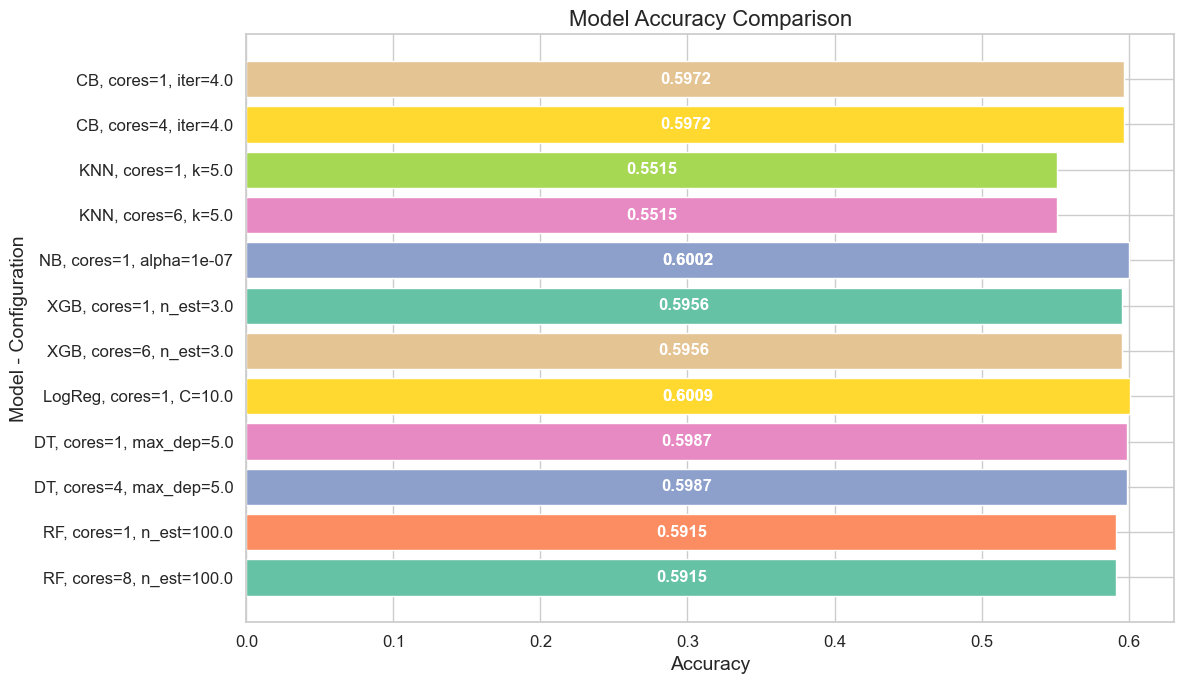

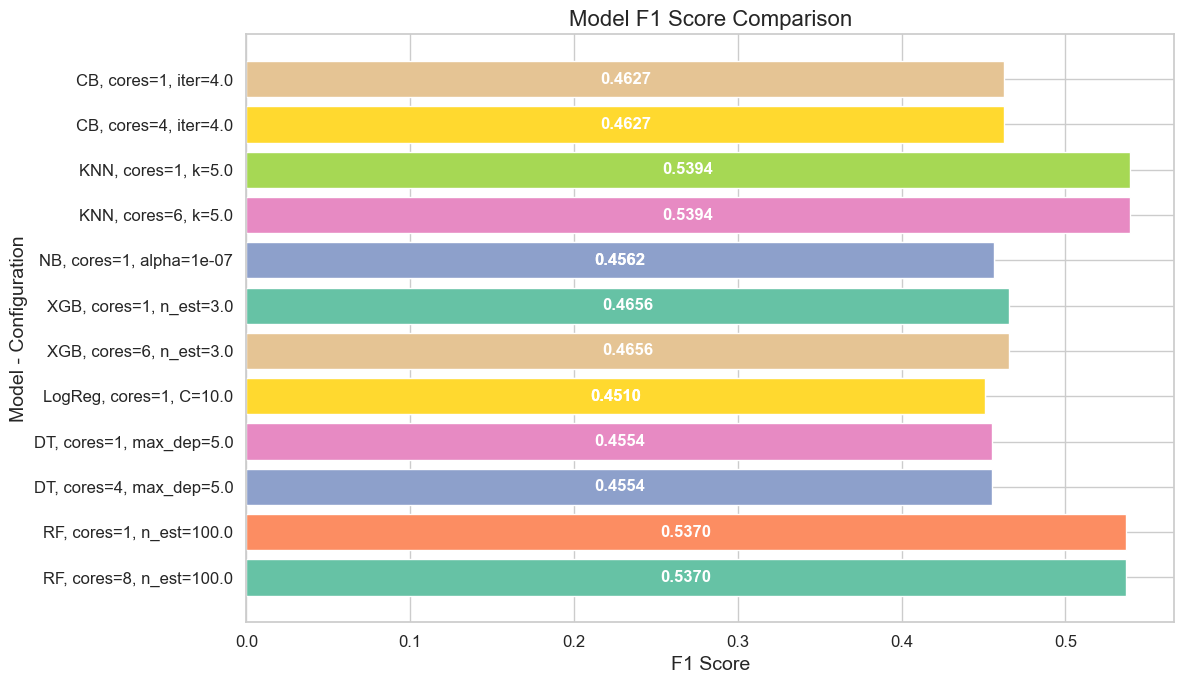

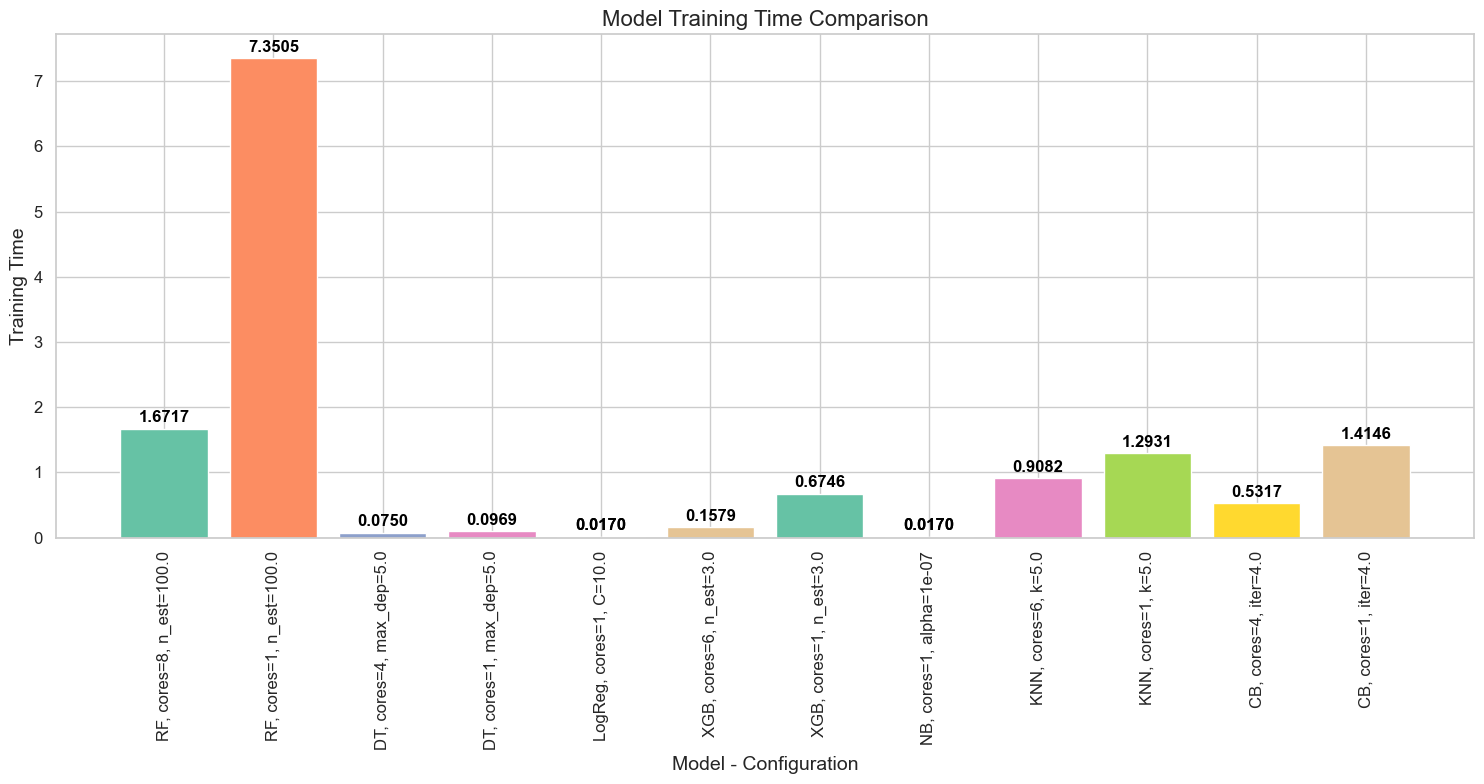

In [77]:
import matplotlib.pyplot as plt

import seaborn as sns



# Set the style for more visually appealing plots

sns.set(style="whitegrid")



# Bar Chart for Accuracy

plt.figure(figsize=(12, 7))



# Choose colors from a seaborn palette for a consistent color scheme

colors = sns.color_palette("Set2", len(df_selected_models['Model'].unique()))



bars = plt.barh(

    df_selected_models['Model'].map(model_shortnames) + ', cores=' + df_selected_models['Cores'].astype(str) + 

    ', ' + df_selected_models['HyperparameterName'].map(hyperparameter_shortnames) + '=' + df_selected_models['Hyperparameter'].astype(str),

    df_selected_models['Accuracy'],

    color=colors

)



# Add text inside the bars with better positioning

for index, bar in enumerate(bars):

    plt.text(

        bar.get_width() / 2, 

        bar.get_y() + bar.get_height() / 2, 

        f'{df_selected_models["Accuracy"][index]:.4f}', 

        va='center', ha='center', fontsize=12, color='white', fontweight='bold'

    )



# Customize chart appearance

plt.xlabel('Accuracy', fontsize=14)

plt.ylabel('Model - Configuration', fontsize=14)

plt.title('Model Accuracy Comparison', fontsize=16)

plt.xticks(fontsize=12)

plt.yticks(fontsize=12)

plt.tight_layout()



# Show the plot

plt.show()



# Bar Chart for F1 Score

plt.figure(figsize=(12, 7))



bars = plt.barh(

    df_selected_models['Model'].map(model_shortnames) + ', cores=' + df_selected_models['Cores'].astype(str) + 

    ', ' + df_selected_models['HyperparameterName'].map(hyperparameter_shortnames) + '=' + df_selected_models['Hyperparameter'].astype(str),

    df_selected_models['F1'],

    color=colors

)



# Add text inside the bars

for index, bar in enumerate(bars):

    plt.text(

        bar.get_width() / 2, 

        bar.get_y() + bar.get_height() / 2, 

        f'{df_selected_models["F1"][index]:.4f}', 

        va='center', ha='center', fontsize=12, color='white', fontweight='bold'

    )



# Customize chart appearance

plt.xlabel('F1 Score', fontsize=14)

plt.ylabel('Model - Configuration', fontsize=14)

plt.title('Model F1 Score Comparison', fontsize=16)

plt.xticks(fontsize=12)

plt.yticks(fontsize=12)

plt.tight_layout()



# Show the plot

plt.show()



# Bar Chart for Training Time (Vertical)

plt.figure(figsize=(15, 8))  # Increased size for better readability



bars = plt.bar(

    df_selected_models['Model'].map(model_shortnames) + ', cores=' + df_selected_models['Cores'].astype(str) + 

    ', ' + df_selected_models['HyperparameterName'].map(hyperparameter_shortnames) + '=' + df_selected_models['Hyperparameter'].astype(str),

    df_selected_models['TrainingTime'],

    color=colors

)



# Add text on top of the bars

for index, bar in enumerate(bars):

    plt.text(

        bar.get_x() + bar.get_width() / 2, 

        bar.get_height() + 0.05, 

        f'{df_selected_models["TrainingTime"][index]:.4f}', 

        va='bottom', ha='center', fontsize=12, color='black', fontweight='bold'

    )



# Customize chart appearance

plt.xticks(rotation=90, fontsize=12)

plt.yticks(fontsize=12)

plt.xlabel('Model - Configuration', fontsize=14)

plt.ylabel('Training Time', fontsize=14)

plt.title('Model Training Time Comparison', fontsize=16)

plt.tight_layout()



# Show the plot

plt.show()

    Cores  Training Time (s)  Accuracy  F1 Score             Confusion Matrix
0       1           2.718287  0.597195  0.462717     [[4833, 94], [3209, 64]]
1       1           3.254251  0.593171  0.480926   [[4690, 237], [3099, 174]]
2       1           4.628048  0.589756  0.512731   [[4433, 494], [2870, 403]]
3       1          11.177094  0.579390  0.528687   [[4139, 788], [2661, 612]]
4       1          32.123055  0.570244  0.537931  [[3873, 1054], [2470, 803]]
5       2           2.643719  0.597195  0.462717     [[4833, 94], [3209, 64]]
6       2           2.636245  0.593171  0.480926   [[4690, 237], [3099, 174]]
7       2           3.922307  0.589756  0.512731   [[4433, 494], [2870, 403]]
8       2          10.645588  0.579390  0.528687   [[4139, 788], [2661, 612]]
9       2          27.323032  0.570244  0.537931  [[3873, 1054], [2470, 803]]
10      4           2.671438  0.597195  0.462717     [[4833, 94], [3209, 64]]
11      4           3.159155  0.593171  0.480926   [[4690, 237],

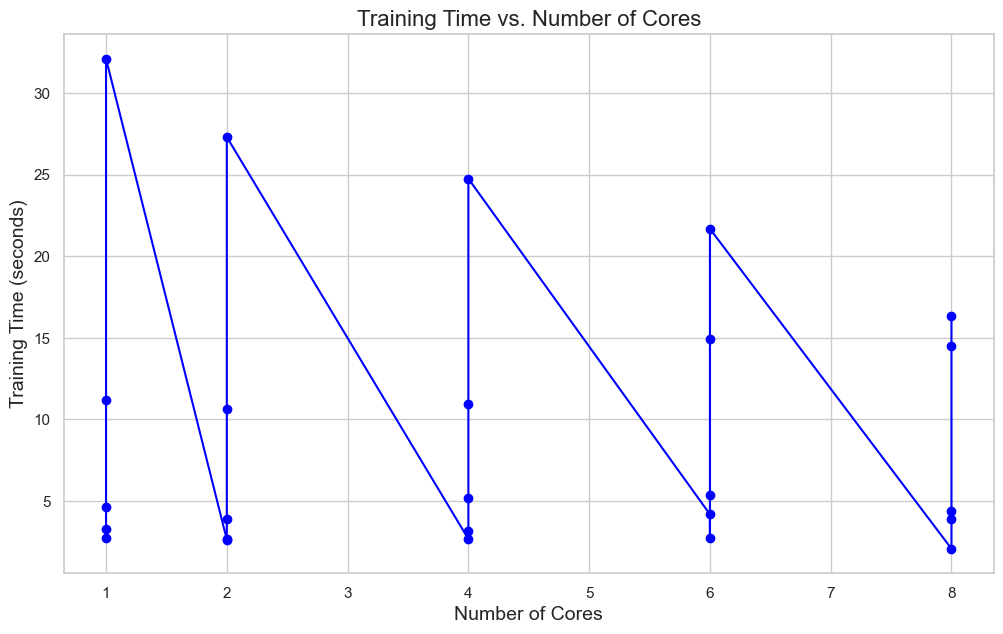

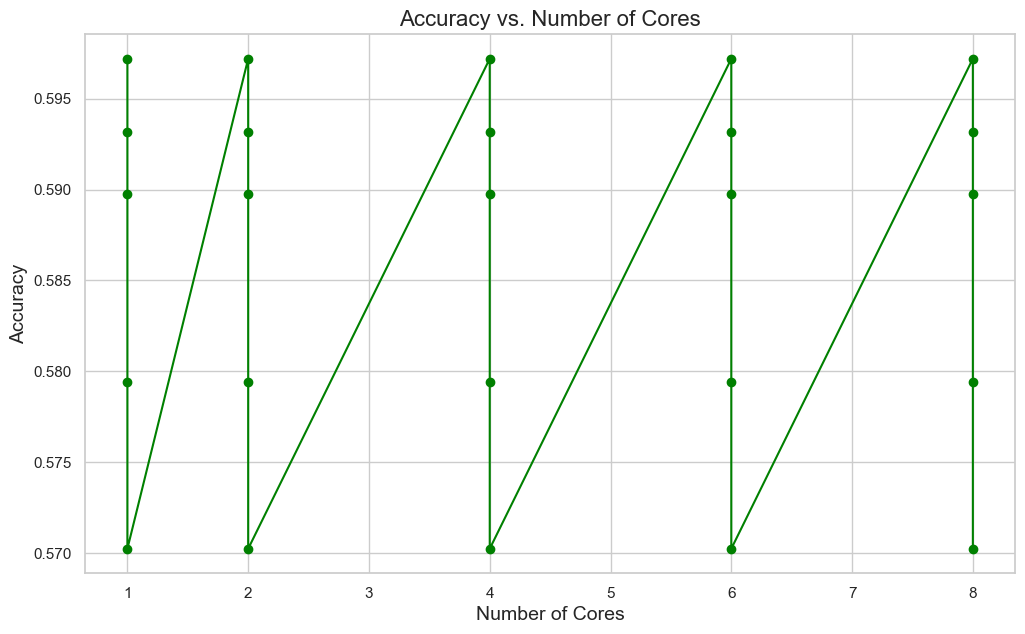

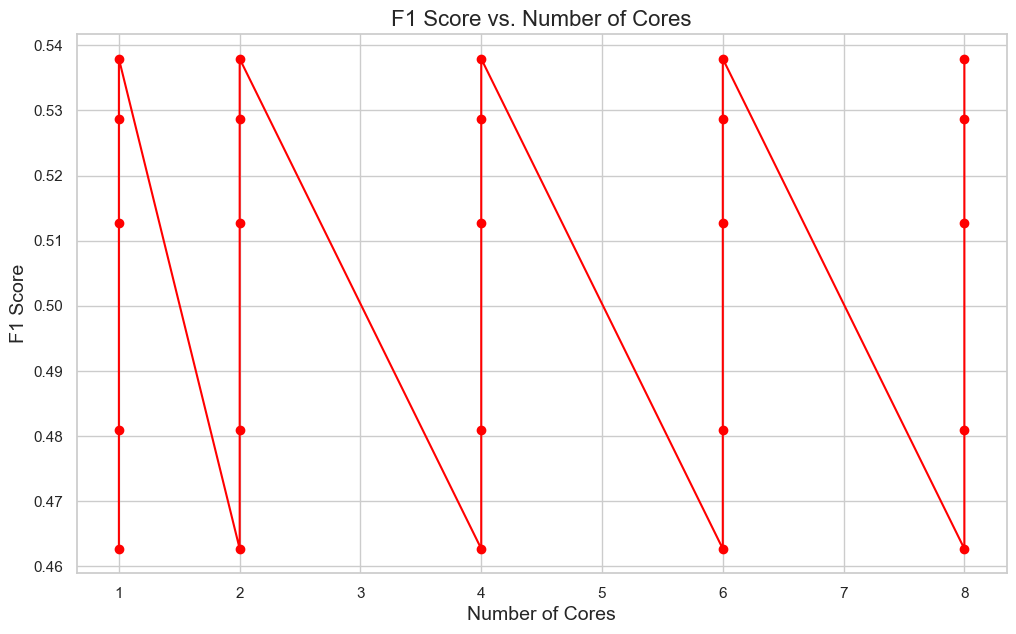

In [78]:
import time
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
import pandas as pd

# Training function for CatBoost, encapsulating the logic for parallelization
def train_catboost(cores, X_train, y_train, X_test, y_test, depth):
    start_time = time.time()

    # Define and train the CatBoost model
    model = CatBoostClassifier(
        depth=depth,
        thread_count=cores,
        iterations=100,
        verbose=0,
        task_type='CPU'  # Ensure we are using CPU for training
    )
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    training_time = time.time() - start_time

    return cores, training_time, accuracy, f1, conf_matrix

# Parallelized training across multiple thread counts
def parallel_train(X_train, y_train, X_test, y_test, depth_list, core_numbers):
    # Use Joblib to parallelize the training process
    results_parallel = Parallel(n_jobs=-1)(delayed(train_catboost)(cores, X_train, y_train, X_test, y_test, depth) 
                                            for cores in core_numbers for depth in depth_list)

    # Create a DataFrame from the results
    results_df = pd.DataFrame(results_parallel, columns=["Cores", "Training Time (s)", "Accuracy", "F1 Score", "Confusion Matrix"])
    
    return results_df

# Example usage (splitting is assumed to be done already)
depth_list = [4, 6, 8, 10, 12]
core_numbers = [1, 2, 4, 6, 8]

results_df = parallel_train(X_train, y_train, X_test, y_test, depth_list, core_numbers)

# Print the results DataFrame
print(results_df)

# Plotting Training Time vs. Cores
plt.figure(figsize=(12, 7))
plt.plot(results_df['Cores'], results_df['Training Time (s)'], marker='o', linestyle='-', color='blue')
plt.title('Training Time vs. Number of Cores', fontsize=16)
plt.xlabel('Number of Cores', fontsize=14)
plt.ylabel('Training Time (seconds)', fontsize=14)
plt.grid(True)
plt.show()

# Plotting Accuracy vs. Cores
plt.figure(figsize=(12, 7))
plt.plot(results_df['Cores'], results_df['Accuracy'], marker='o', linestyle='-', color='green')
plt.title('Accuracy vs. Number of Cores', fontsize=16)
plt.xlabel('Number of Cores', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()

# Plotting F1 Score vs. Cores
plt.figure(figsize=(12, 7))
plt.plot(results_df['Cores'], results_df['F1 Score'], marker='o', linestyle='-', color='red')
plt.title('F1 Score vs. Number of Cores', fontsize=16)
plt.xlabel('Number of Cores', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
plt.grid(True)
plt.show()

In [79]:
results_df

Cores  Training Time (s)  Accuracy  F1 Score             Confusion Matrix
0       1           2.718287  0.597195  0.462717     [[4833, 94], [3209, 64]]
1       1           3.254251  0.593171  0.480926   [[4690, 237], [3099, 174]]
2       1           4.628048  0.589756  0.512731   [[4433, 494], [2870, 403]]
3       1          11.177094  0.579390  0.528687   [[4139, 788], [2661, 612]]
4       1          32.123055  0.570244  0.537931  [[3873, 1054], [2470, 803]]
5       2           2.643719  0.597195  0.462717     [[4833, 94], [3209, 64]]
6       2           2.636245  0.593171  0.480926   [[4690, 237], [3099, 174]]
7       2           3.922307  0.589756  0.512731   [[4433, 494], [2870, 403]]
8       2          10.645588  0.579390  0.528687   [[4139, 788], [2661, 612]]
9       2          27.323032  0.570244  0.537931  [[3873, 1054], [2470, 803]]
10      4           2.671438  0.597195  0.462717     [[4833, 94], [3209, 64]]
11      4           3.159155  0.593171  0.480926   [[4690, 237], [3099, 174]]
12      4           5.170745  0.589756  0.512731   [[4433, 494], [2870, 403]]
13      4          10.933951  0.579390  0.528687   [[4139, 788], [2661, 612]]
14      4          24.769006  0.570244  0.537931  [[3873, 1054], [2470, 803]]
15      6           4.186879  0.597195  0.462717     [[4833, 94], [3209, 64]]
16      6           2.744785  0.593171  0.480926   [[4690, 237], [3099, 174]]
17      6           5.399031  0.589756  0.512731   [[4433, 494], [2870, 403]]
18      6          14.917143  0.579390  0.528687   [[4139, 788], [2661, 612]]
19      6          21.695438  0.570244  0.537931  [[3873, 1054], [2470, 803]]
20      8           2.073663  0.597195  0.462717     [[4833, 94], [3209, 64]]
21      8           3.905447  0.593171  0.480926   [[4690, 237], [3099, 174]]
22      8           4.375768  0.589756  0.512731   [[4433, 494], [2870, 403]]
23      8          14.502410  0.579390  0.528687   [[4139, 788], [2661, 612]]
24      8          16.375940  0.570244  0.537931  [[3873, 1054], [2470, 803]]